# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression


%config IPCompleter.greedy=True

pd.options.display.float_format = '{:15.2f}'.format

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('/Users/pablopavon/Documents/JOB_2023/ZeroG/final_df_Zero_G.csv')
df

Airline        Date  Quarter  overall_expenses  \
0    Alaska Airlines Inc.  2000-01-01        1         391467.00   
1    Alaska Airlines Inc.  2000-04-01        2         418519.00   
2    Alaska Airlines Inc.  2000-07-01        3         431111.00   
3    Alaska Airlines Inc.  2000-10-01        4         447285.00   
4    Alaska Airlines Inc.  2001-01-01        1         429268.00   
..                    ...         ...      ...               ...   
603       JetBlue Airways  2017-10-01        4        1447850.28   
604       JetBlue Airways  2018-01-01        1        1507469.65   
605       JetBlue Airways  2018-04-01        2        1636947.03   
606       JetBlue Airways  2018-07-01        3        1753654.78   
607       JetBlue Airways  2018-10-01        4        1619022.78   

        profit_loss  overall_revenues  r_miscellaneous_operating_rev  \
0          21701.00         413168.00                         356.00   
1          48645.00         467164.00                         704.00   
2          77731.00         508842.00                        1162.00   
3           1898.00         449183.00                        -184.00   
4           7713.00         436981.00                        -346.00   
..              ...               ...                            ...   
603       272351.31        1720201.59                        5290.52   
604       206558.90        1714028.55                        6144.32   
605       251705.25        1888652.28                        6644.30   
606       214353.58        1968008.36                        8754.93   
607       307646.32        1926669.10                        5685.62   

     r_property_baggage  r_property_freight  r_cancelling_fees  ...  \
0                793.00            14069.00            6834.00  ...   
1               1130.00            15763.00            7708.00  ...   
2               1375.00            15362.00            8679.00  ...   
3               1210.00            13841.00            8550.00  ...   
4                909.00            13477.00            7376.00  ...   
..                  ...                 ...                ...  ...   
603            72418.49                0.00                NaN  ...   
604            72466.46                0.00                NaN  ...   
605            77752.21               15.80                NaN  ...   
606            86537.66                8.55                NaN  ...   
607            84432.97               28.01                NaN  ...   

     r_transportation_rev  r_transportation_rev_per_passanger  \
0                16940.00                           351004.00   
1                16047.00                           400062.00   
2                15411.00                           439744.00   
3                15617.00                           386355.00   
4                16994.00                           376011.00   
..                    ...                                 ...   
603              78105.42                          1564387.16   
604              65296.30                          1570121.47   
605              74593.88                          1729646.09   
606              70449.54                          1802257.68   
607              81391.60                          1755130.90   

     exp_aircraft_services  exp_flying_operations  exp_general_admin  \
0                 70016.00              160914.00           24595.00   
1                 72645.00              154894.00           25429.00   
2                 78298.00              168292.00           27103.00   
3                 80849.00              178512.00           27724.00   
4                 82584.00              164764.00           27577.00   
..                     ...                    ...                ...   
603              272951.79              585942.64          163244.26   
604              298798.66              660421.89          106954.03   
605              299555.75              735290.37     

# General Analysis

## General Profit/Loss (all companies)

In [3]:
profit_loss_per_quarter = df.groupby(['Airline', 'Year']).profit_loss.sum()
profit_loss_per_quarter

Airline                Year
Alaska Airlines Inc.   2000         149975.00
                       2001         108849.00
                       2002         100709.00
                       2003         182083.00
                       2004         166451.00
                                    ...      
United Air Lines Inc.  2014        5124186.95
                       2015        8219574.30
                       2016        7712777.81
                       2017        6191413.59
                       2018        5697103.06
Name: profit_loss, Length: 152, dtype: float64

In [4]:
profit_loss_per_quarter_unstacked = profit_loss_per_quarter.unstack(level = 0)
profit_loss_per_quarter_unstacked

Airline  Alaska Airlines Inc.  American Airlines Inc.  Delta Air Lines Inc.  \
Year                                                                          
2000                149975.00              3168043.55            3102878.22   
2001                108849.00              -370050.45             861139.00   
2002                100709.00             -1066113.65             840100.00   
2003                182083.00               766236.54             635050.00   
2004                166451.00              1955113.06             281087.00   
2005                196348.00              1870164.77             719407.00   
2006                128236.00              3685262.00            2367380.00   
2007                379113.00              3521763.00            3719445.00   
2008                278794.00               499556.21            3622838.34   
2009                557313.00              1289083.21            4168834.54   
2010                852519.48              2645238.85            7325329.04   
2011                850579.95              1298411.45            6863758.85   
2012                965965.73              2491172.69            7312601.85   
2013               1304720.28              4146292.93            8695382.22   
2014               1438232.20              5160890.48            7849153.94   
2015               1821822.60              7983087.75           12328209.37   
2016               1974034.87              8296156.43           11805245.40   
2017               1785765.35             12069992.55           11651293.97   
2018               1216834.14             11002879.77            7946319.01   

Airline  Federal Express Corporation  JetBlue Airways  Southwest Airlines Co.  \
Year                                                                            
2000                     10225615.00         33961.53              1534644.74   
2001                     10506085.00         98488.58              1276916.74   
2002                     12079455.00        205271.09              1195533.74   
2003                     13394248.00        348370.60              1358753.74   
2004                     14948914.00        397929.99              1637900.74   
2005                     16369040.00        485986.48              2033830.74   
2006                     14656973.00        520237.86              2199978.74   
2007                     14385395.80        585078.21              2262058.03   
2008                     13515313.49        495824.96              1841467.05   
2009                     12021497.24        716025.23              1861818.22   
2010                     12718275.36        815252.15              2505344.60   
2011                     12884589.25        796298.55              2215897.74   
2012                     12754623.65        824423.21              2348029.89   
2013                     13247978.64        871555.02              3068963.86   
2014                     14899948.93        994568.05              4110277.53   
2015                     17166467.07       1694424.19              6095703.38   
2016                     10268741.71       1545334.01              4946566.23   
2017                      3772548.74       1303082.77              4720934.59   
2018                      3741346.74        980264.05              4421335.17   

Airline  Spirit Air Lines  United Air Lines Inc.  
Year                                              
2000             52999.13             2286653.00  
2001             39368.41             -977461.00  
2002             48853.72            -1271039.00  
2003             56161.61              126134.00  
2004              3053.71              487744.00  
2005             -3371.89             1556346.00  
2006             24194.03             2408414.00  
2007            204478.17             2974589.00  
2008            189529.66              150539.00  
2009            271441.83             2357458.45  
2010            287299.89 

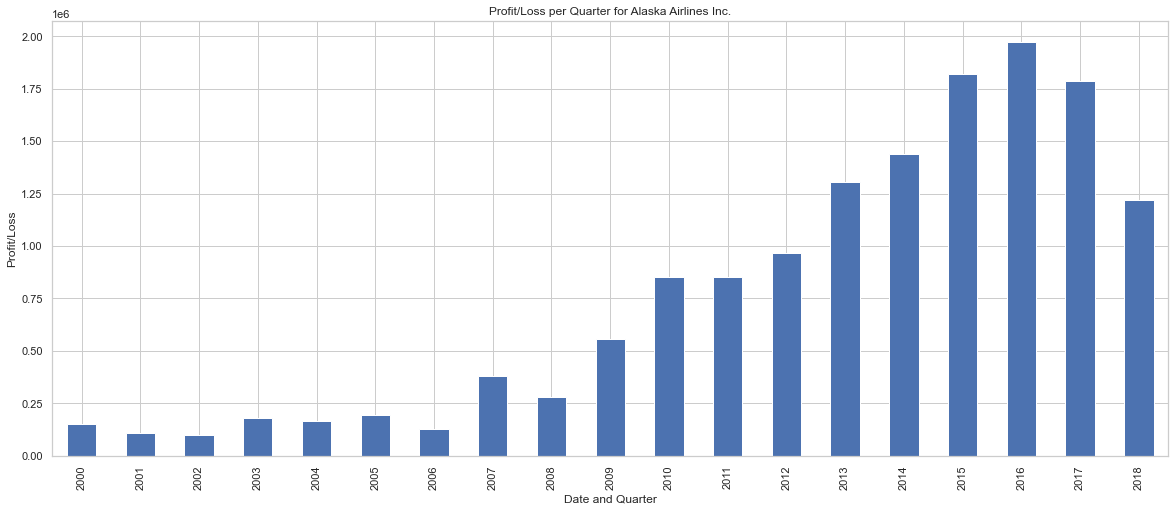

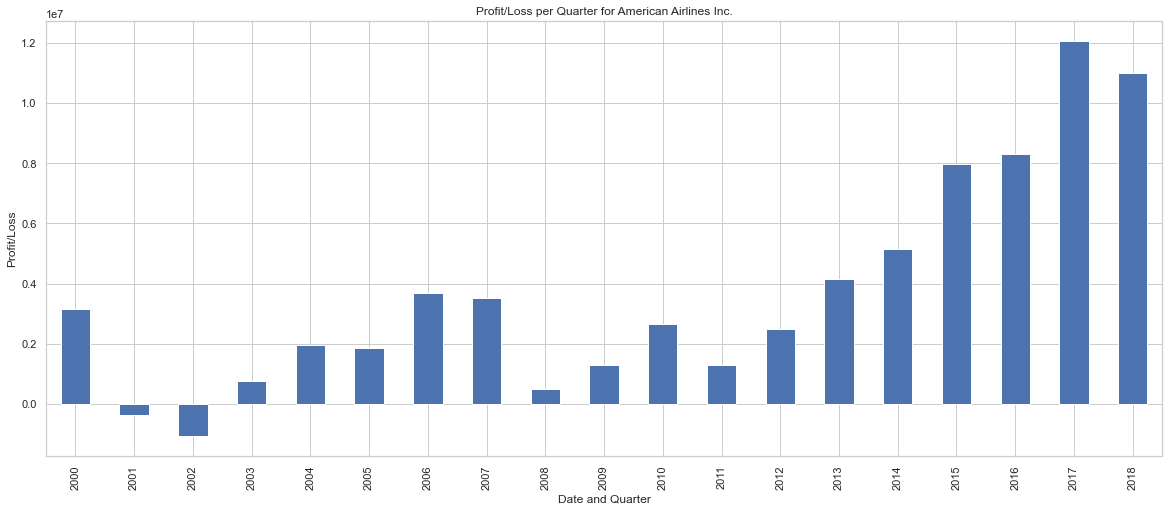

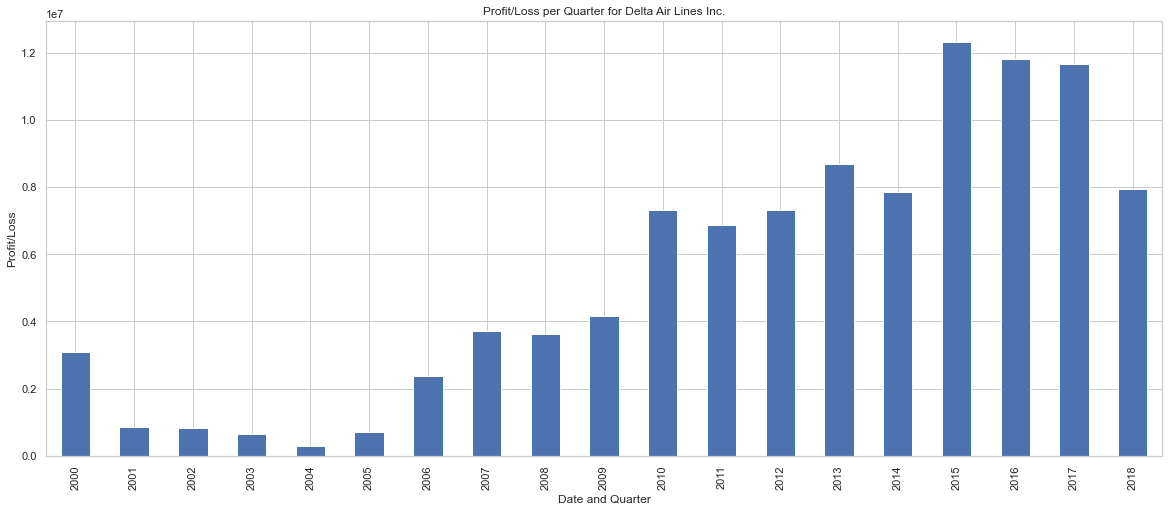

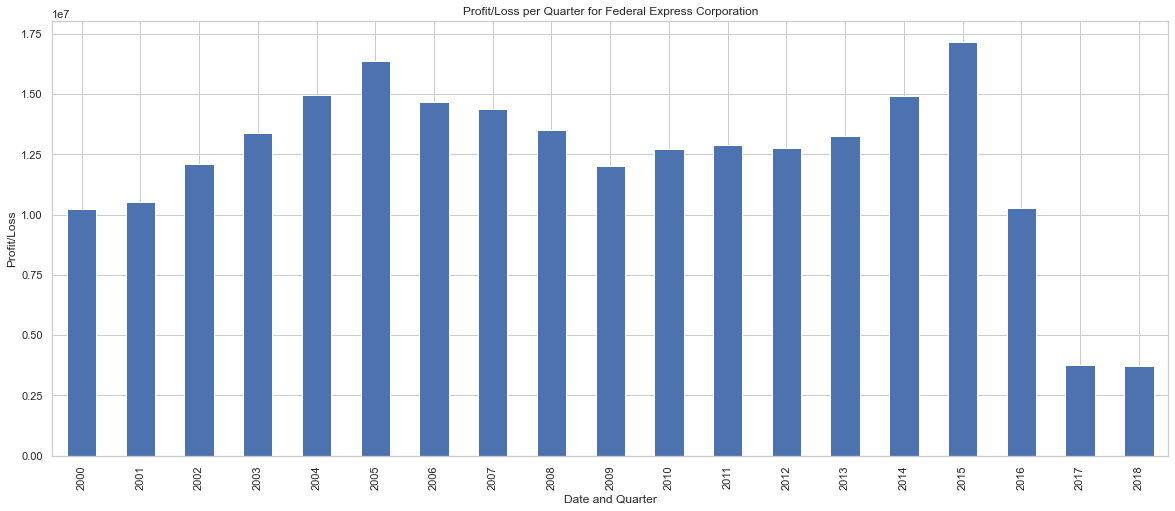

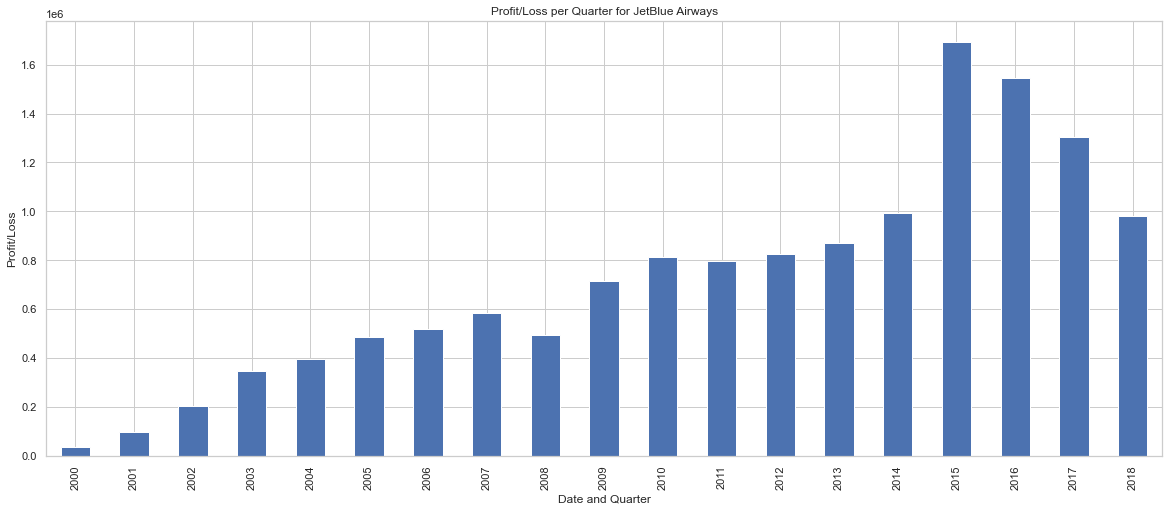

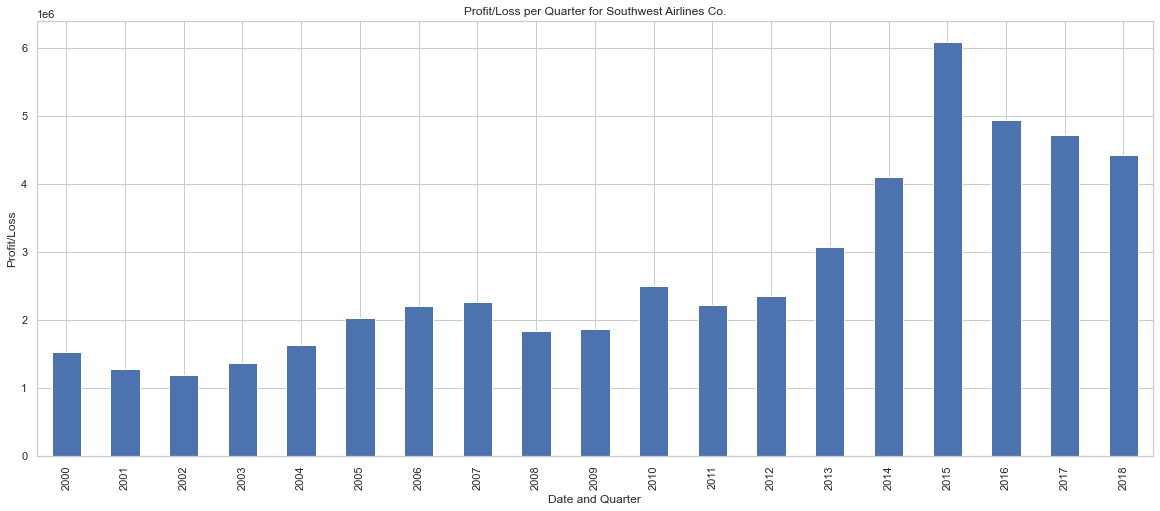

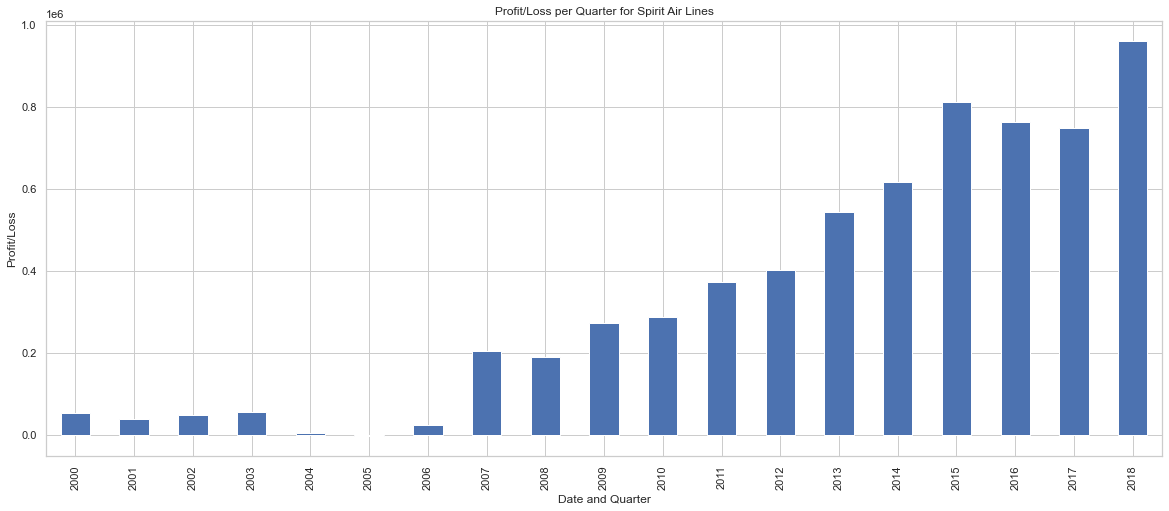

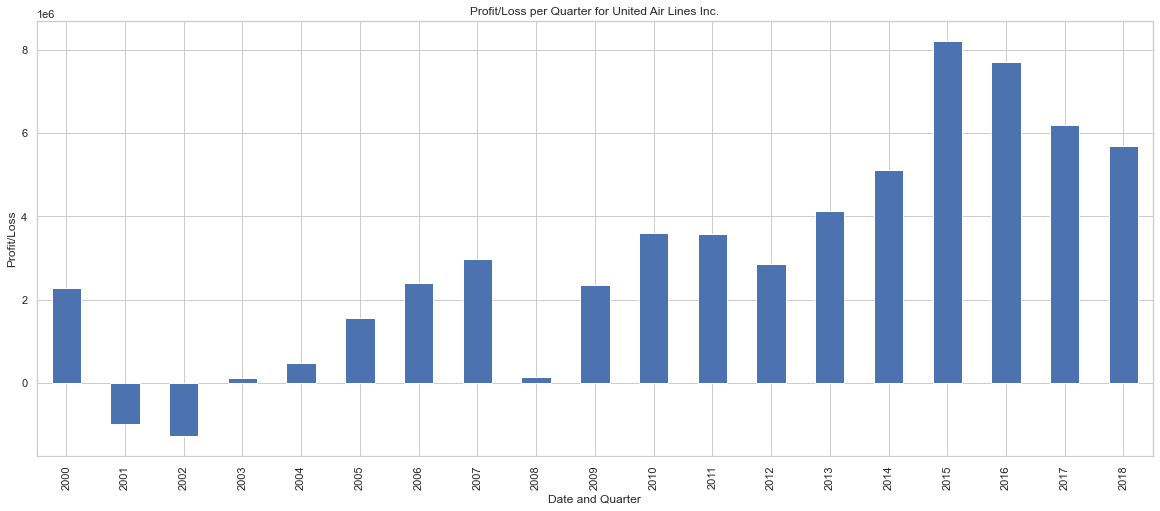

In [5]:
for airline in profit_loss_per_quarter_unstacked.columns:
    plt.figure(figsize=(20, 8))
    profit_loss_per_quarter_unstacked[airline].plot(kind='bar', title=f'Profit/Loss per Quarter for {airline}')
    plt.xlabel('Date and Quarter')
    plt.ylabel('Profit/Loss')
    plt.show();

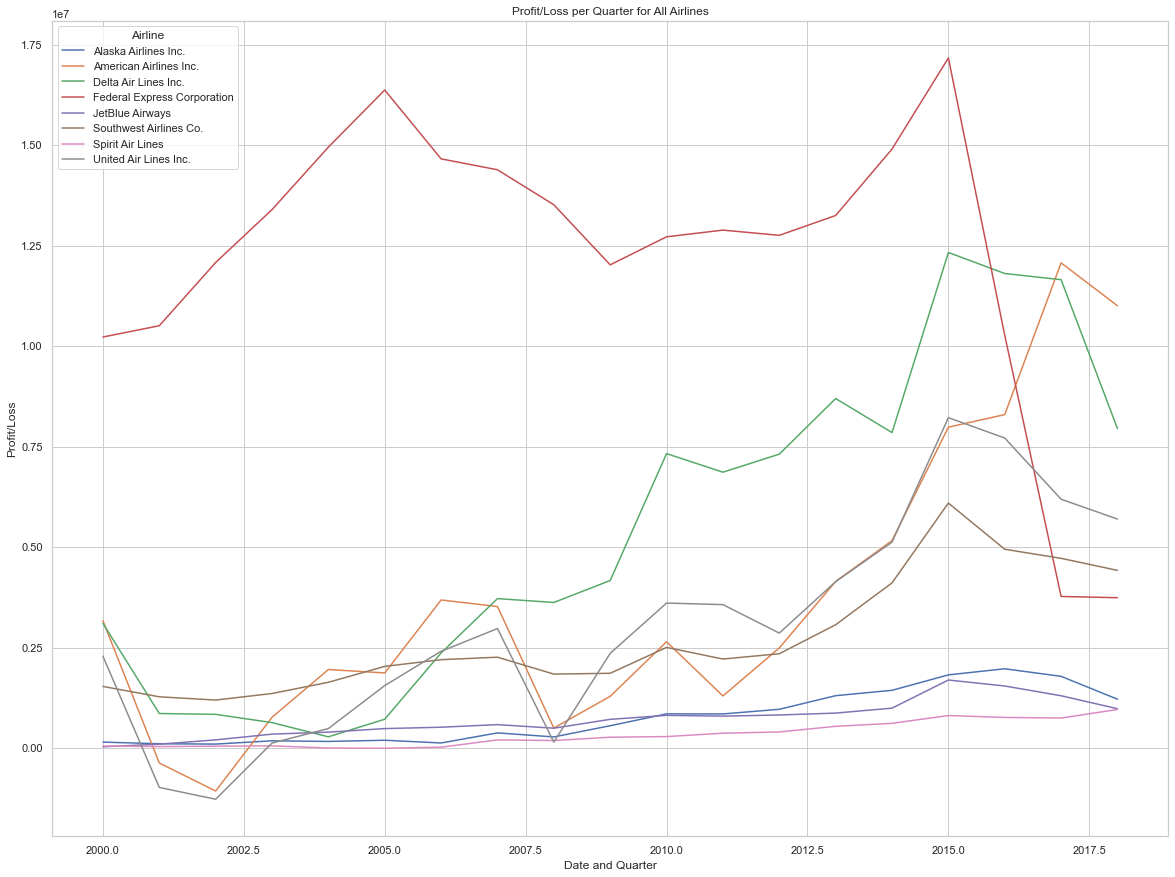

In [6]:
ax = profit_loss_per_quarter_unstacked.plot(kind='line', figsize=(20, 15), title='Profit/Loss per Quarter for All Airlines')

plt.xlabel('Date and Quarter')
plt.ylabel('Profit/Loss')
plt.legend(title='Airline', loc='upper left')

plt.show()

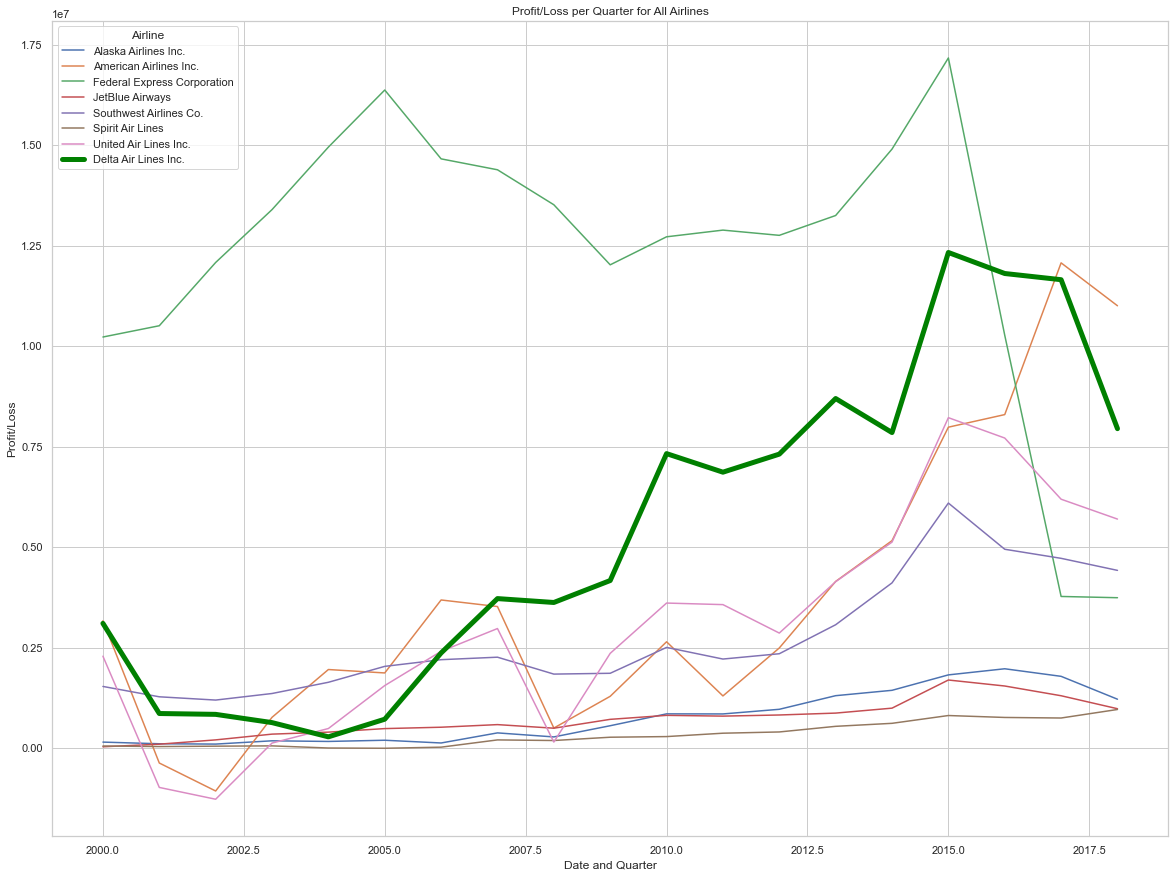

In [7]:
delta_df = profit_loss_per_quarter_unstacked['Delta Air Lines Inc.']

ax = profit_loss_per_quarter_unstacked.drop('Delta Air Lines Inc.', axis=1).plot(kind='line', figsize=(20, 15), title='Profit/Loss per Quarter for All Airlines')
delta_df.plot(ax=ax, kind='line', linewidth=5, label='Delta Air Lines Inc.', color='green')

plt.xlabel('Date and Quarter')
plt.ylabel('Profit/Loss')
plt.legend(title='Airline', loc='upper left')

plt.show()

## overall_expenses

In [8]:
expenses_per_quarter = df.groupby(['Airline','Date', 'Quarter']).overall_expenses.sum()
expenses_per_quarter
overall_expenses_per_quarter_unstacked = expenses_per_quarter.unstack(level = 0)

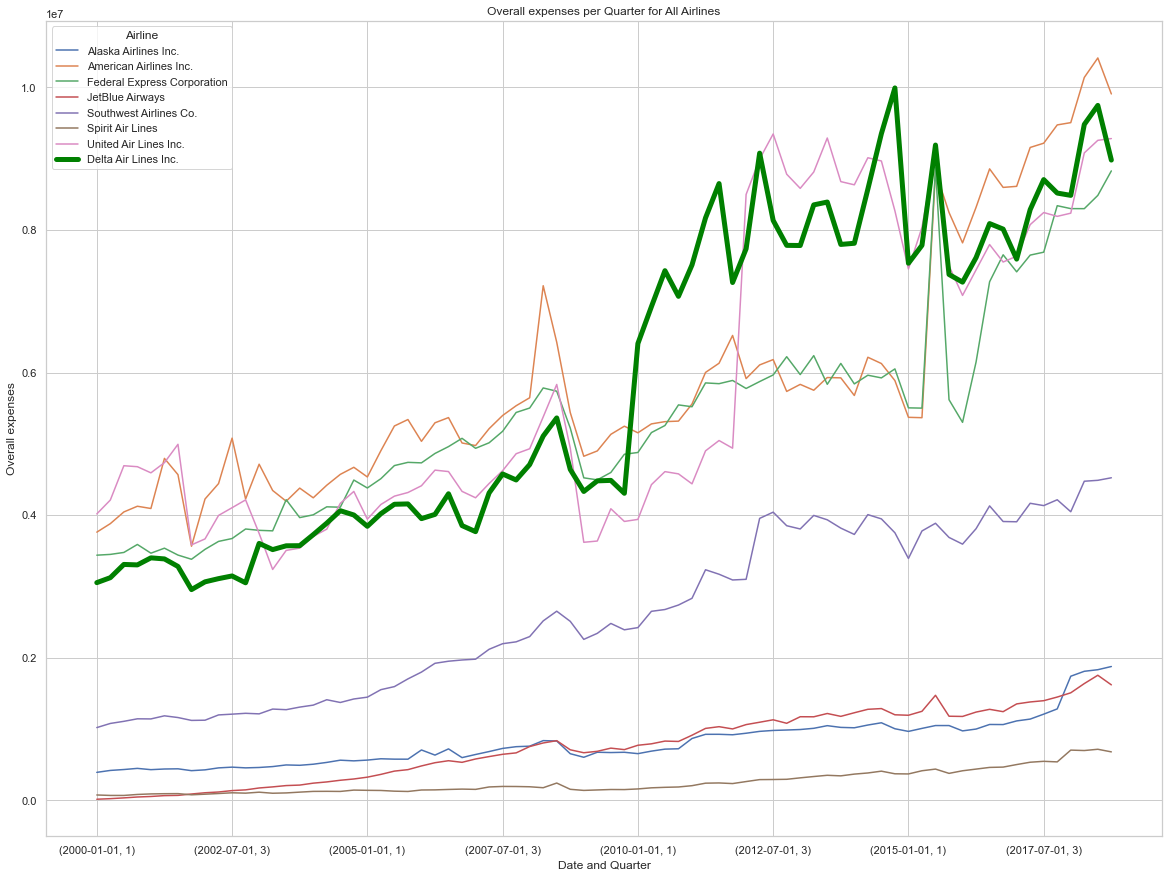

In [9]:
delta_df = overall_expenses_per_quarter_unstacked['Delta Air Lines Inc.']

ax = overall_expenses_per_quarter_unstacked.drop('Delta Air Lines Inc.', axis=1).plot(kind='line', figsize=(20, 15), title='Overall expenses per Quarter for All Airlines')
delta_df.plot(ax=ax, kind='line', linewidth=5, label='Delta Air Lines Inc.', color='green')

plt.xlabel('Date and Quarter')
plt.ylabel('Overall expenses')
plt.legend(title='Airline', loc='upper left')

plt.show()

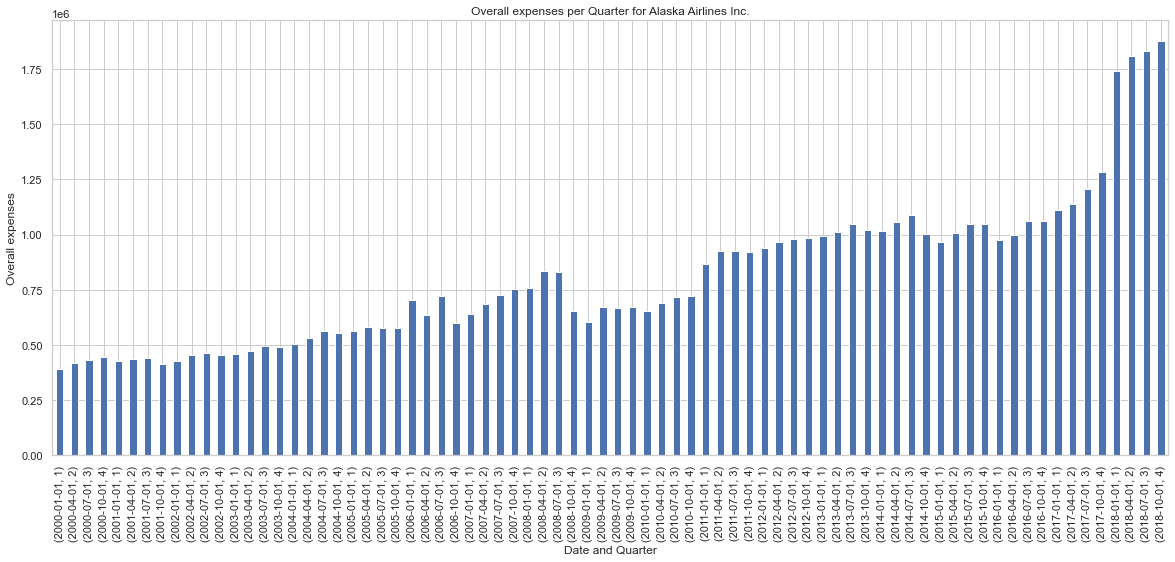

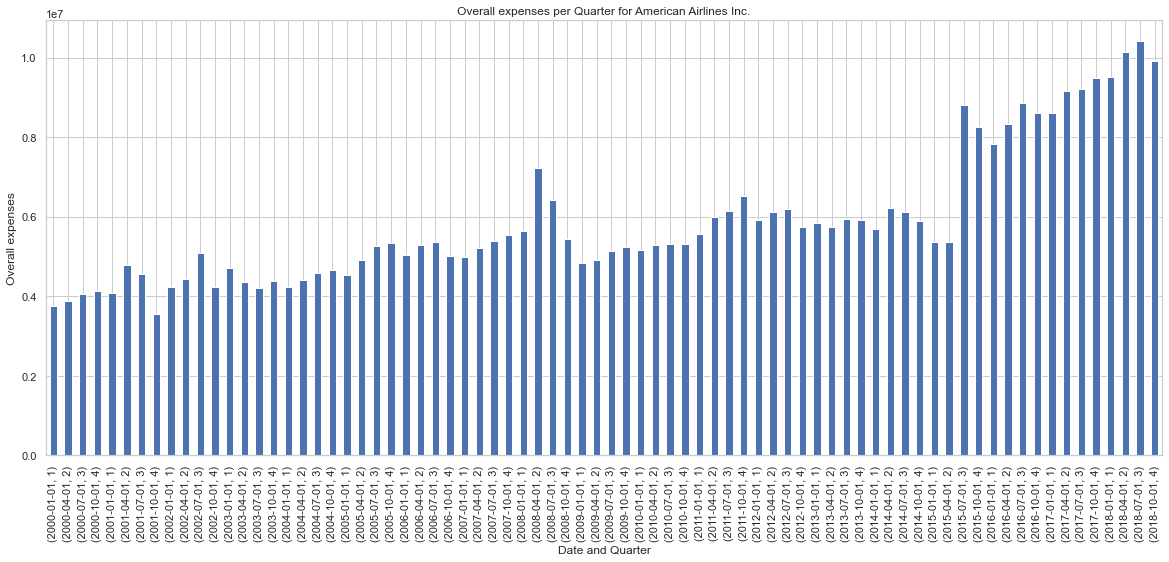

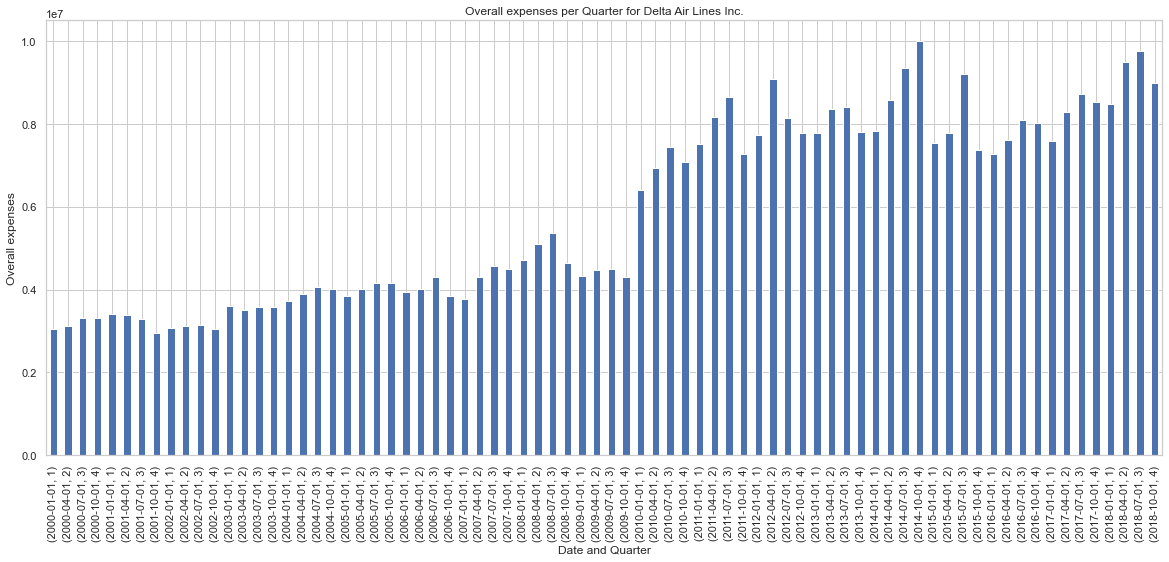

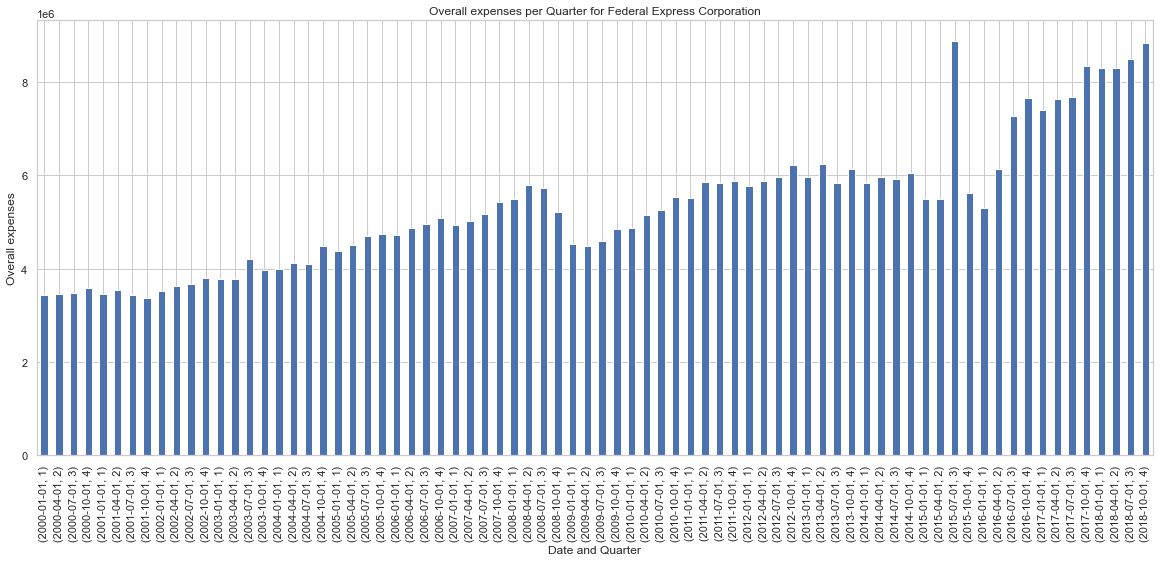

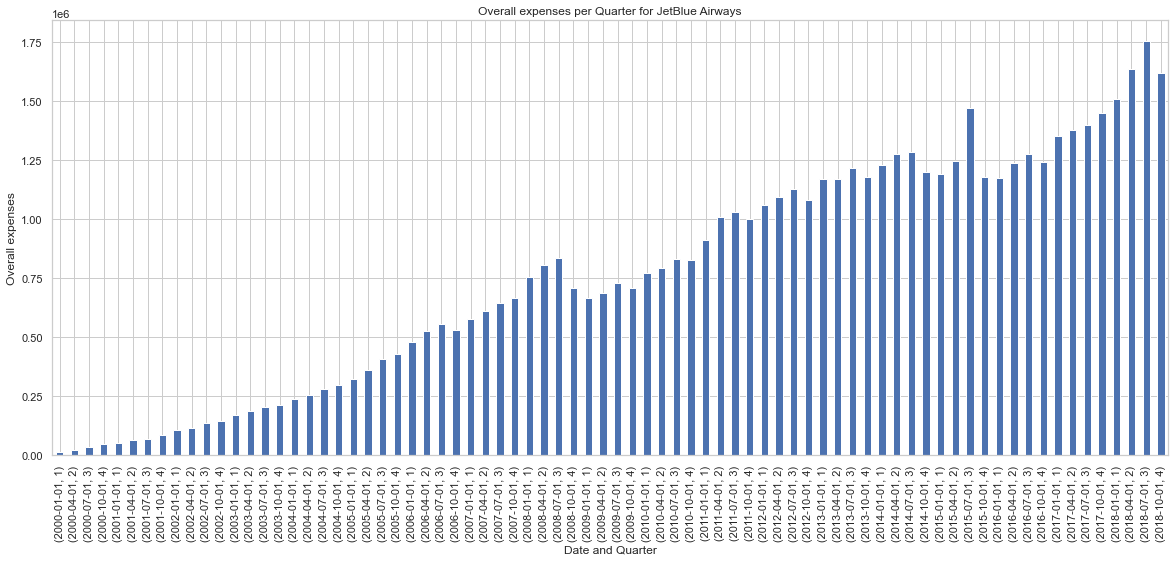

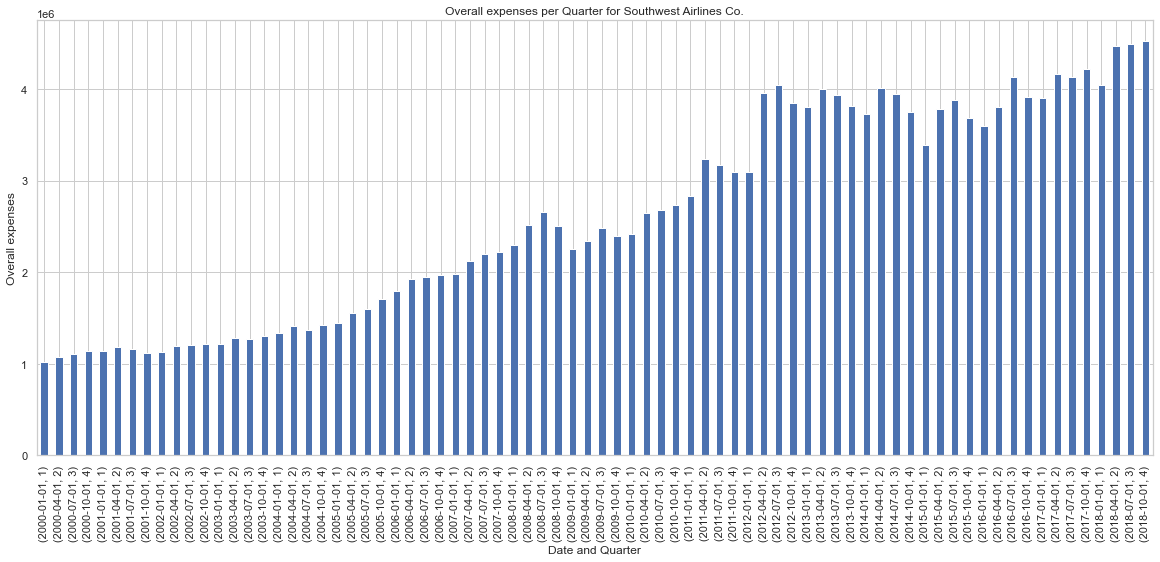

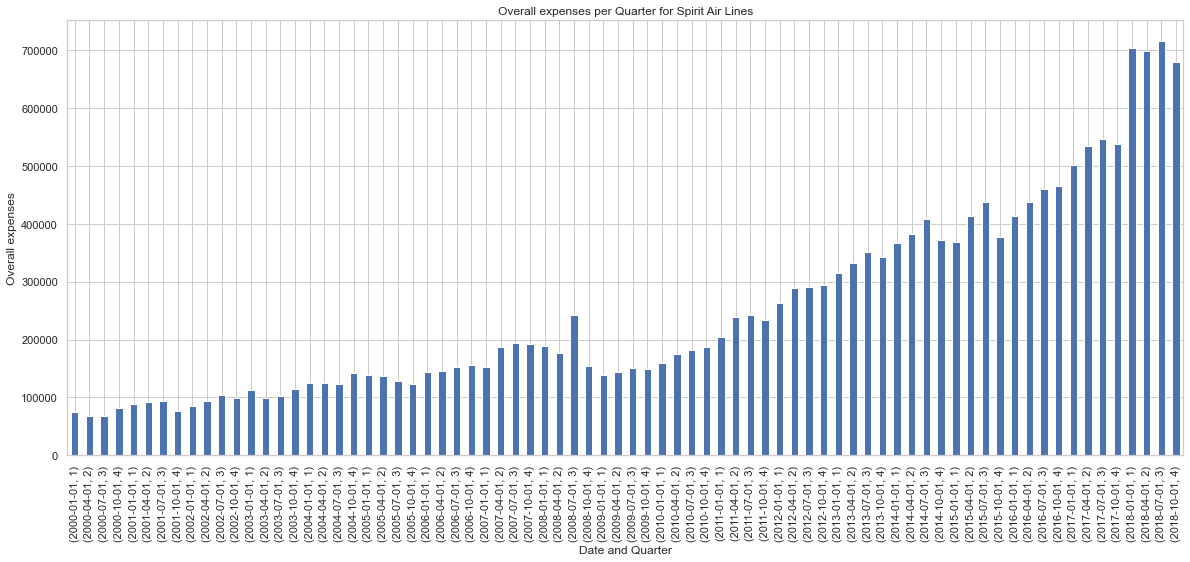

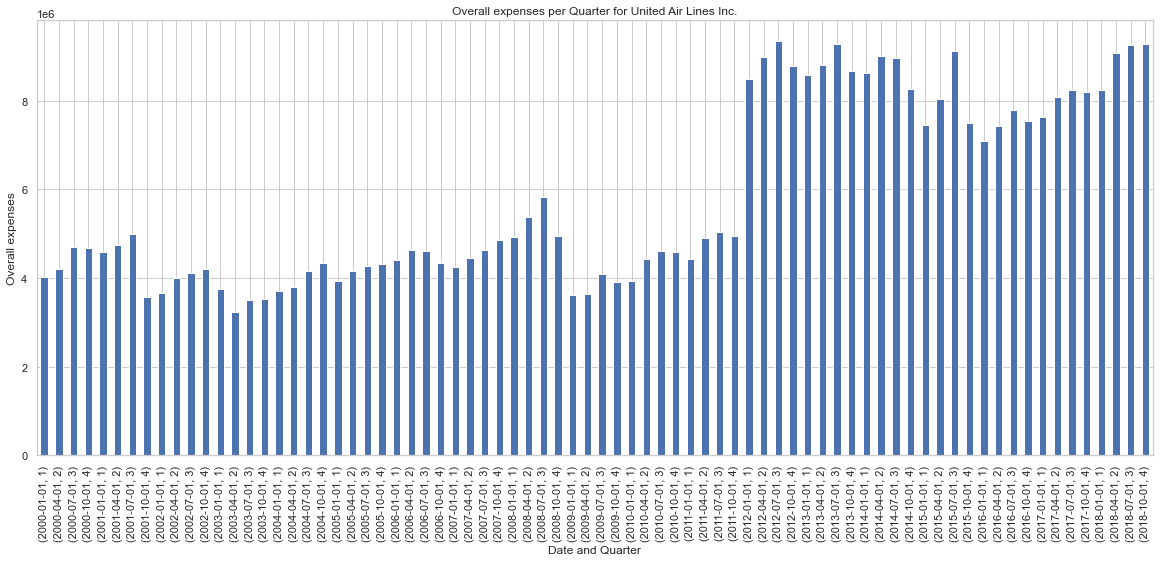

In [10]:
overall_expenses_per_quarter = df.groupby(['Airline','Date', 'Quarter']).overall_expenses.sum()
overall_expenses_per_quarter_unstacked = overall_expenses_per_quarter.unstack(level = 0)

for airline in overall_expenses_per_quarter_unstacked.columns:
    plt.figure(figsize=(20, 8))
    overall_expenses_per_quarter_unstacked[airline].plot(kind='bar', title=f'Overall expenses per Quarter for {airline}')
    plt.xlabel('Date and Quarter')
    plt.ylabel('Overall expenses')
    plt.show();

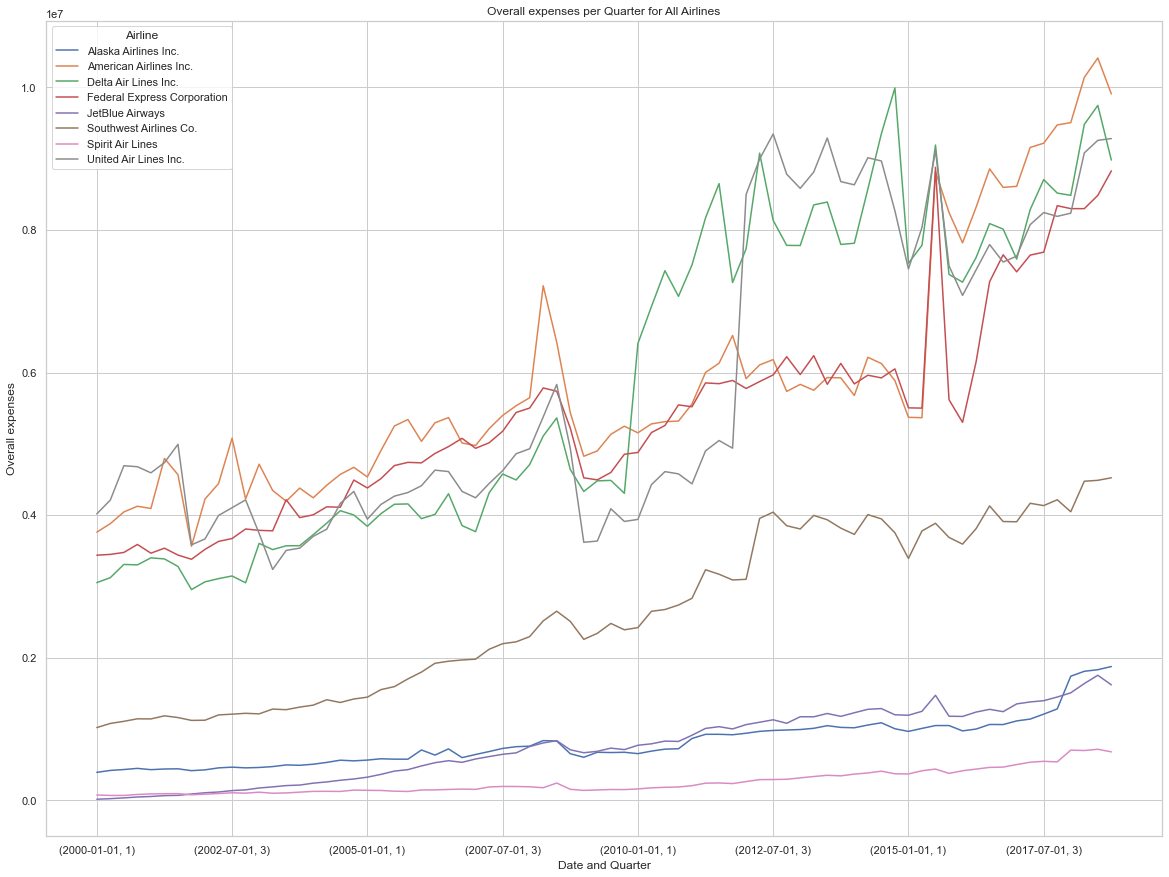

In [11]:
ax = overall_expenses_per_quarter_unstacked.plot(kind='line', figsize=(20, 15), title='Overall expenses per Quarter for All Airlines')

plt.xlabel('Date and Quarter')
plt.ylabel('Overall expenses')
plt.legend(title='Airline', loc='upper left')

plt.show()

## overall_revenues

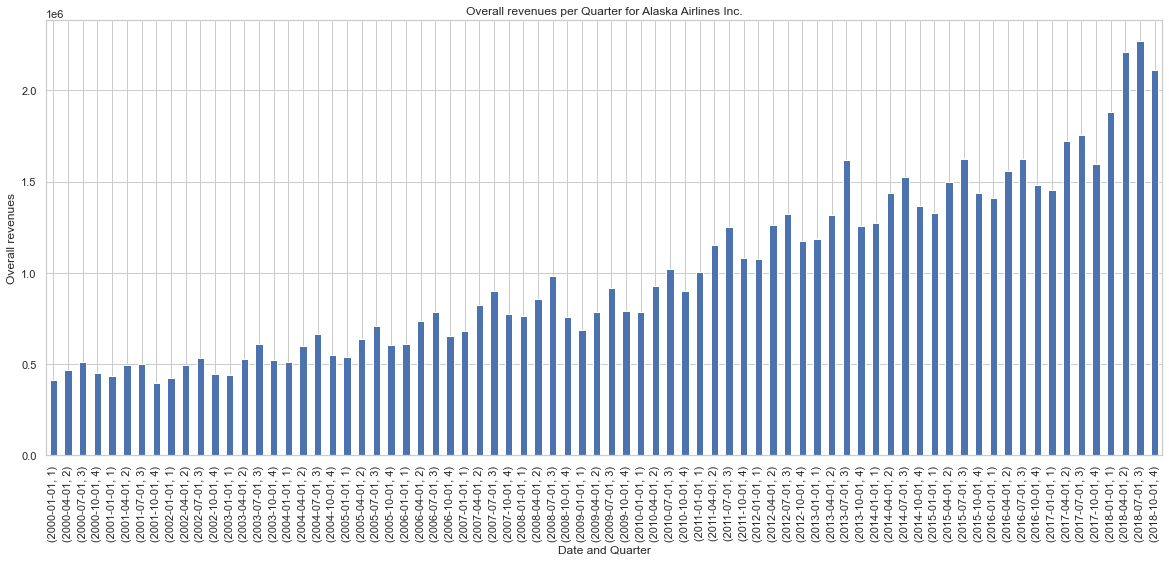

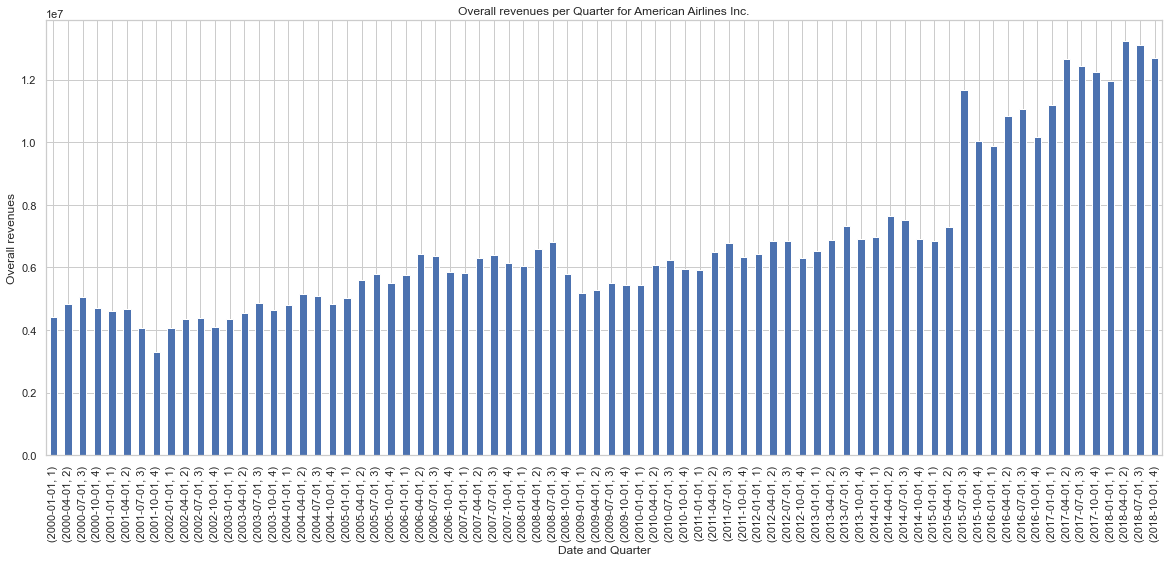

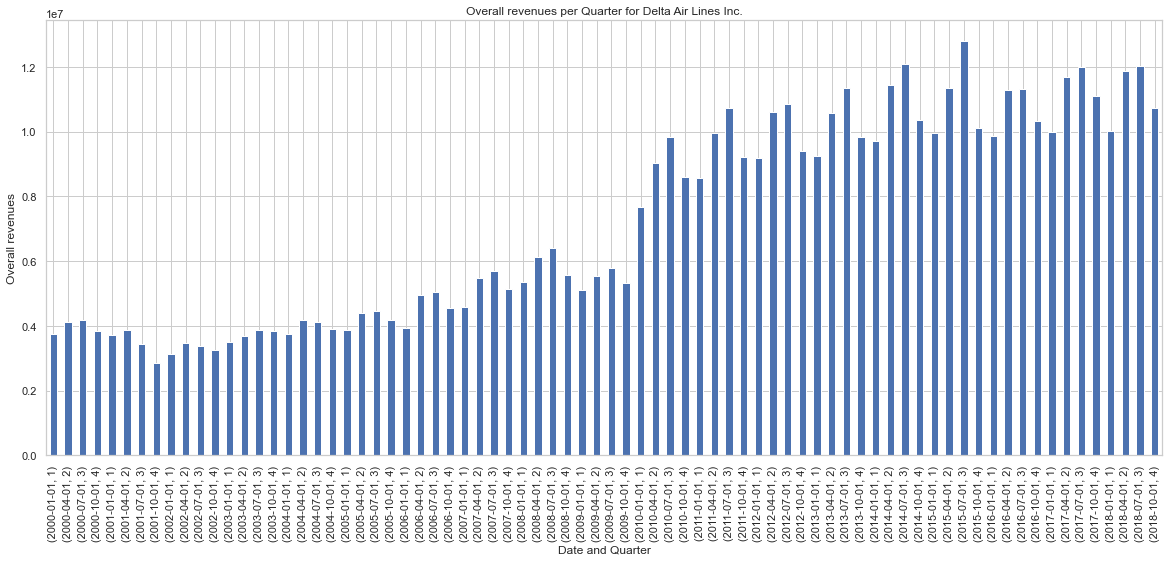

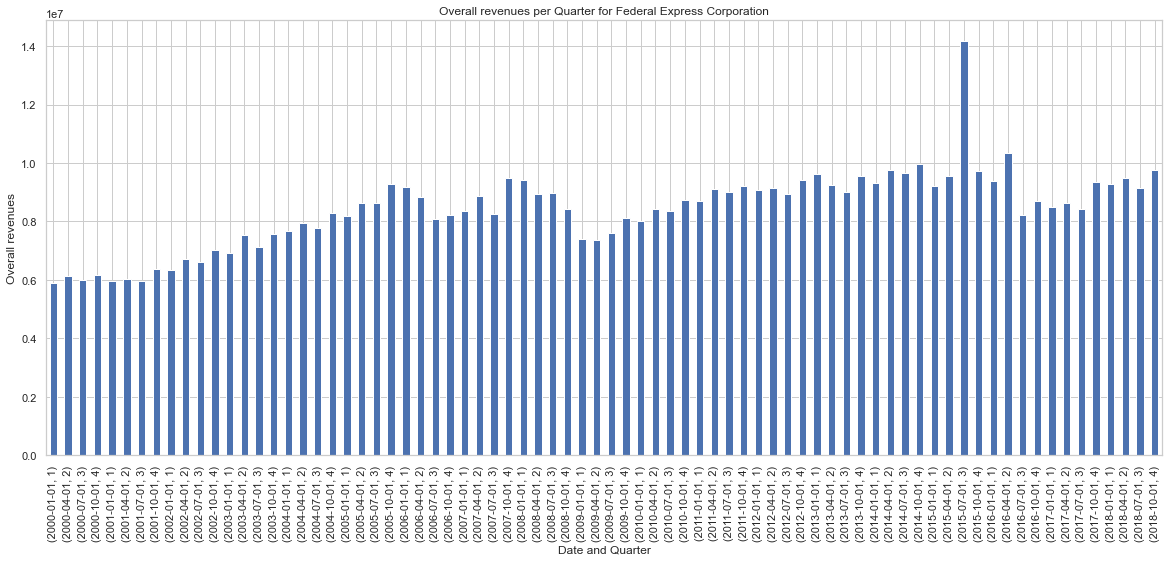

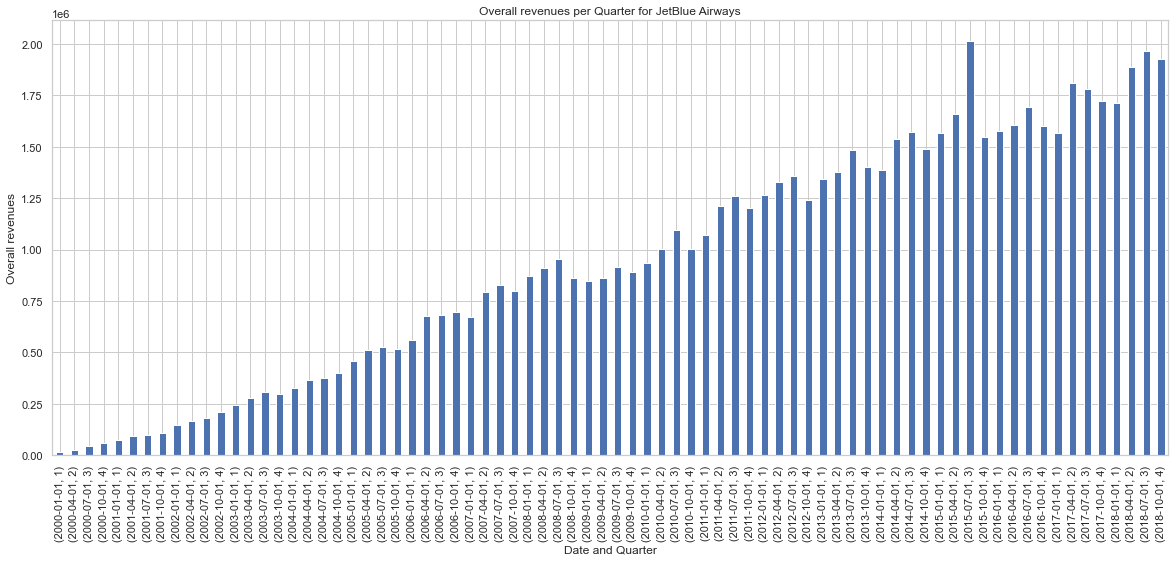

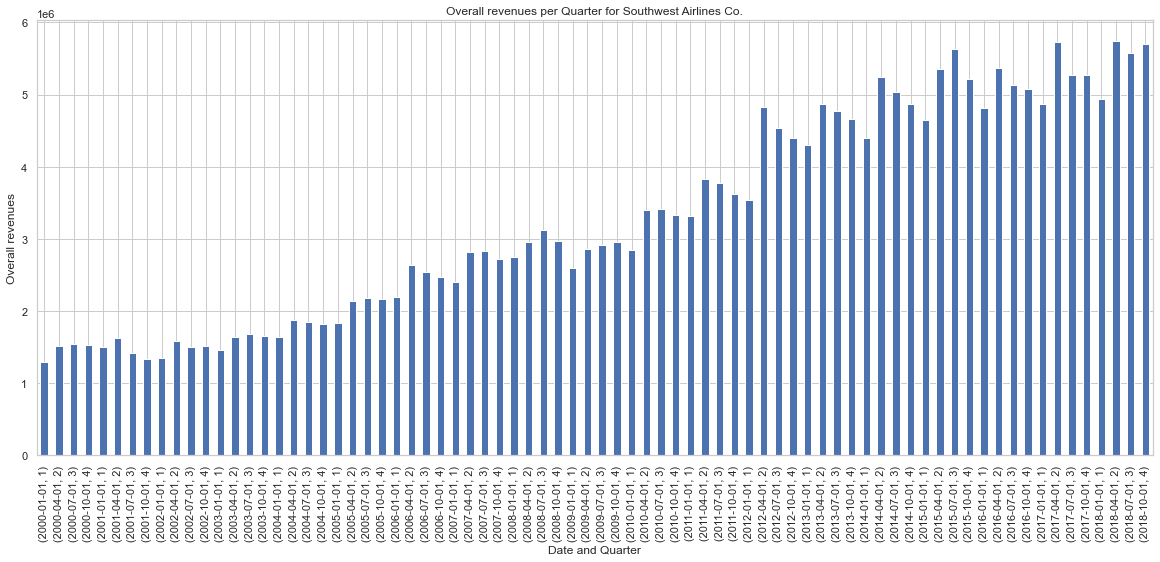

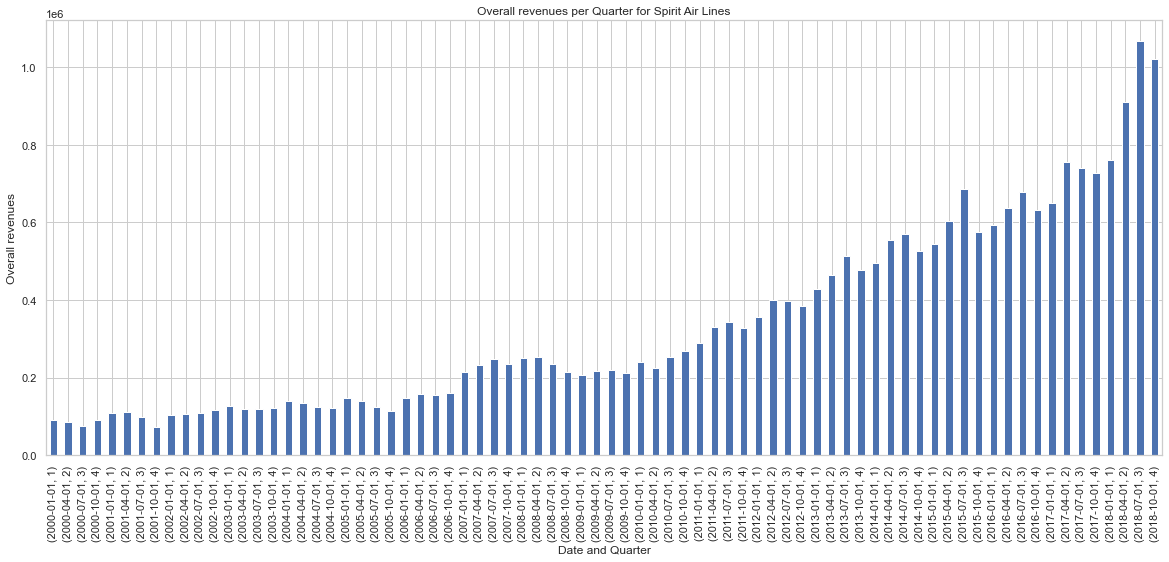

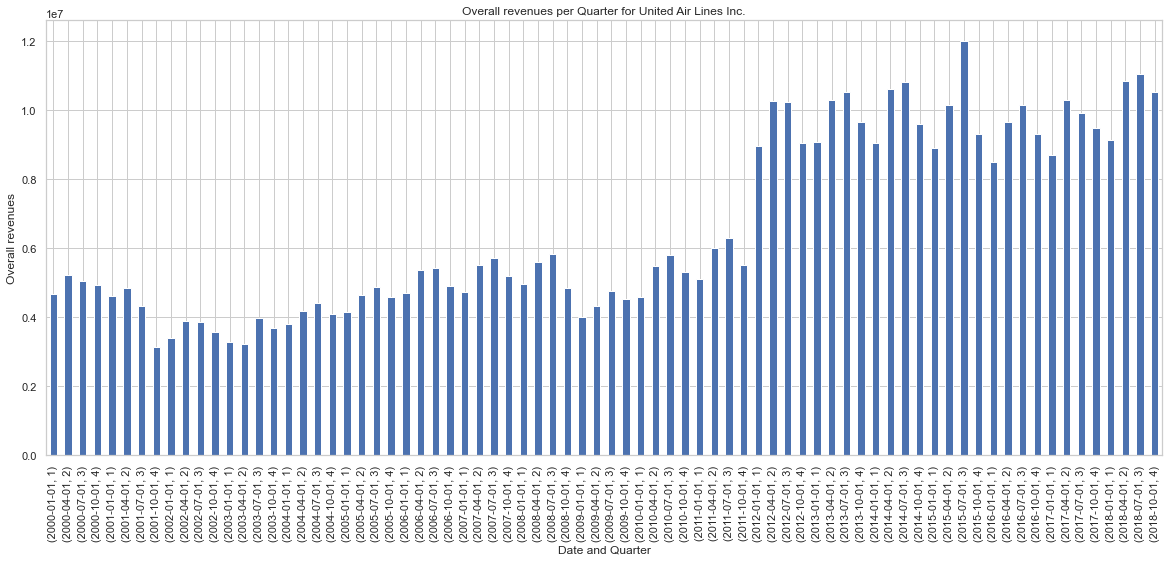

In [12]:
overall_revenues_per_quarter = df.groupby(['Airline','Date', 'Quarter']).overall_revenues.sum()
overall_revenues_per_quarter_unstacked = overall_revenues_per_quarter.unstack(level = 0)

for airline in overall_revenues_per_quarter_unstacked.columns:
    plt.figure(figsize=(20, 8))
    overall_revenues_per_quarter_unstacked[airline].plot(kind='bar', title=f'Overall revenues per Quarter for {airline}')
    plt.xlabel('Date and Quarter')
    plt.ylabel('Overall revenues')
    plt.show();

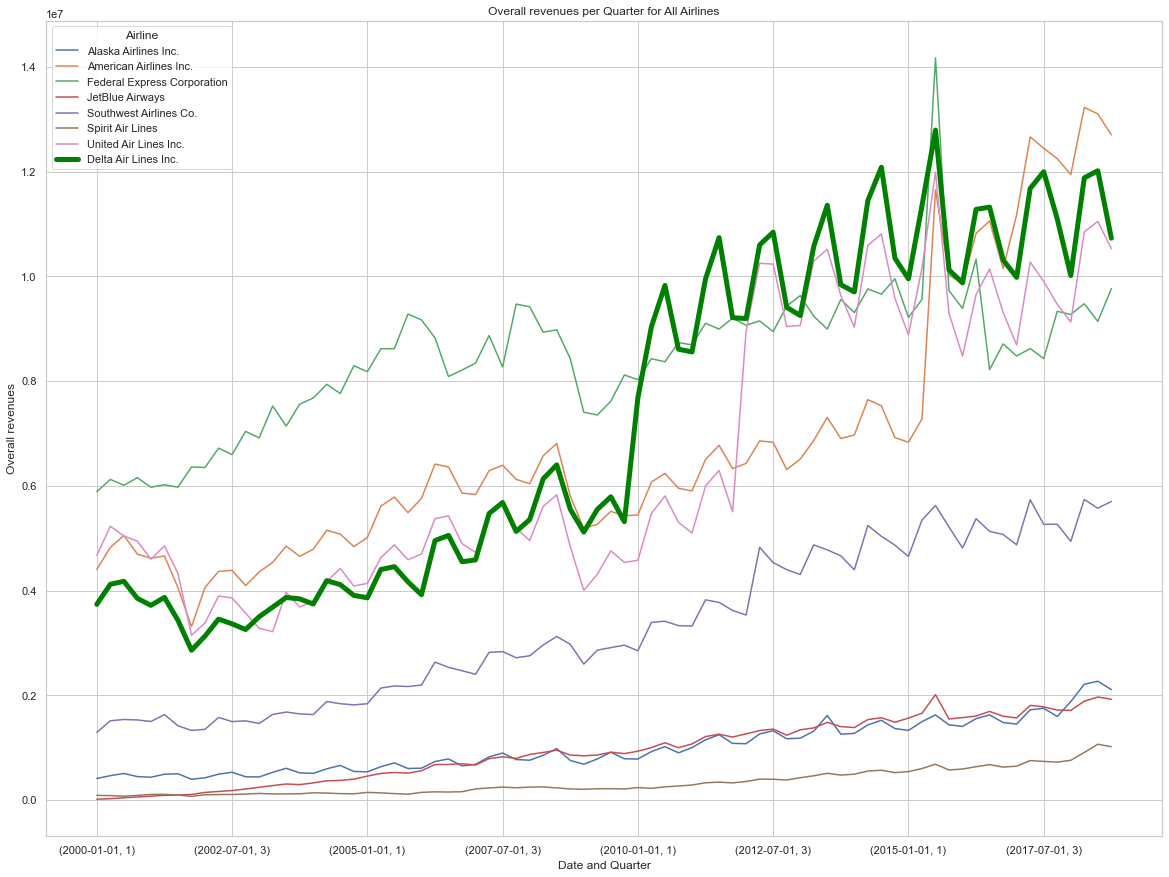

In [13]:
delta_df = overall_revenues_per_quarter_unstacked['Delta Air Lines Inc.']

ax = overall_revenues_per_quarter_unstacked.drop('Delta Air Lines Inc.', axis=1).plot(kind='line', figsize=(20, 15), title='Overall revenues per Quarter for All Airlines')
delta_df.plot(ax=ax, kind='line', linewidth=5, label='Delta Air Lines Inc.', color='green')

plt.xlabel('Date and Quarter')
plt.ylabel('Overall revenues')
plt.legend(title='Airline', loc='upper left')

plt.show()



# Delta Air Lines Inc.

## Delta Air Lines Inc. DF

In [14]:
delta = df[df['Airline'] == 'Delta Air Lines Inc.'].copy()
delta

Airline        Date  Quarter  overall_expenses  \
152  Delta Air Lines Inc.  2000-01-01        1        3052792.00   
153  Delta Air Lines Inc.  2000-04-01        2        3122595.00   
154  Delta Air Lines Inc.  2000-07-01        3        3308190.00   
155  Delta Air Lines Inc.  2000-10-01        4        3301709.00   
156  Delta Air Lines Inc.  2001-01-01        1        3400600.00   
..                    ...         ...      ...               ...   
223  Delta Air Lines Inc.  2017-10-01        4        8517822.00   
224  Delta Air Lines Inc.  2018-01-01        1        8485615.00   
225  Delta Air Lines Inc.  2018-04-01        2        9480407.00   
226  Delta Air Lines Inc.  2018-07-01        3        9747724.00   
227  Delta Air Lines Inc.  2018-10-01        4        8980843.00   

        profit_loss  overall_revenues  r_miscellaneous_operating_rev  \
152       685258.44        3738050.44                       69482.00   
153       998107.53        4120702.53                       60214.00   
154       869242.61        4177432.61                      120401.00   
155       550269.65        3851978.65                       89885.00   
156       317711.00        3718311.00                       67968.00   
..              ...               ...                            ...   
223      2579153.69       11096975.69                      743101.00   
224      1529695.01       10015310.01                      595392.00   
225      2400262.00       11880669.00                      674044.00   
226      2268427.00       12016151.00                      719263.00   
227      1747935.00       10728778.00                      769391.00   

     r_property_baggage  r_property_freight  r_cancelling_fees  ...  \
152             6598.00            96817.00            1244.47  ...   
153             7315.00            99466.00            1244.47  ...   
154             7259.00            99762.00           -1961.76  ...   
155             8769.00           108708.00           -2205.94  ...   
156             6791.00           101415.00           -4031.00  ...   
..                  ...                 ...                ...  ...   
223           219114.00           177093.00          207440.00  ...   
224           212667.00           181102.00           45320.00  ...   
225           202384.00           199630.00           45844.00  ...   
226           260978.00           205096.00           41530.00  ...   
227           244167.00           190613.00           42702.00  ...   

     r_transportation_rev  r_transportation_rev_per_passanger  \
152             136784.00                          3239594.00   
153            -133725.00                          3889760.00   
154             129633.00                          3642243.00   
155              94978.00                          3366420.00   
156             120923.00                          3236189.00   
..                    ...                                 ...   
223            2066993.00                          6788046.00   
224            1908237.02                          6830853.99   
225            2283348.00                          8215464.00   
226            2058037.28                          8470566.72   
227            1862792.02                          7353393.98   

     exp_aircraft_services  exp_flying_operations  exp_general_admin  \
152              617897.00              987695.00          177288.00   
153              632569.00             1029906.00          211774.00   
154              641124.00             1094247.00          205814.00   
155              628848.00             1157834.00          201030.00   
156              680561.00             1153344.00          214952.00   
..                     ...                    ...                ...   
223             1459364.00             2610291.00          587406.00   
224             1211926.00             2697321.00          734935.00   
225             1404545.00             3149422.00     

In [15]:
delta['Date'] = pd.to_datetime(delta['Date'])
delta['Year'] = delta['Date'].dt.year

## Expenses Delta Air Lines Inc.

In [16]:
selected_columns = ['Date', 'Quarter'] + [col for col in delta.columns if col.startswith('exp_')]
delta_exp = delta[selected_columns]
delta_exp

Date  Quarter  exp_aircraft_services  exp_flying_operations  \
152 2000-01-01        1              617897.00              987695.00   
153 2000-04-01        2              632569.00             1029906.00   
154 2000-07-01        3              641124.00             1094247.00   
155 2000-10-01        4              628848.00             1157834.00   
156 2001-01-01        1              680561.00             1153344.00   
..         ...      ...                    ...                    ...   
223 2017-10-01        4             1459364.00             2610291.00   
224 2018-01-01        1             1211926.00             2697321.00   
225 2018-04-01        2             1404545.00             3149422.00   
226 2018-07-01        3             1536581.00             3352547.00   
227 2018-10-01        4             1515434.00             3140045.00   

     exp_general_admin  exp_maintenance  exp_passenger_service  \
152          177288.00        342155.00              396843.00   
153          211774.00        374385.00              425596.00   
154          205814.00        390580.00              437434.00   
155          201030.00        408765.00              422908.00   
156          214952.00        412883.00              440641.00   
..                 ...              ...                    ...   
223          587406.00        746578.00              817081.00   
224          734935.00        814276.00              803671.00   
225          777815.00        655001.00              856054.00   
226          691627.00        579284.00              905478.00   
227          614853.00        563271.00              814047.00   

     exp_promotion_sales  exp_transportation_expenses  
152            461737.00                     69177.00  
153            366667.00                     81698.00  
154            447353.00                     91638.00  
155            384541.00                     97783.00  
156            420580.00                     77639.00  
..                   ...                          ...  
223            673735.00                   1623367.00  
224            676459.00                   1547027.00  
225            746545.00                   1891025.00  
226            765259.00                   1916948.00  
227            699669.00                   1633524.00  

[76 rows x 9 columns]

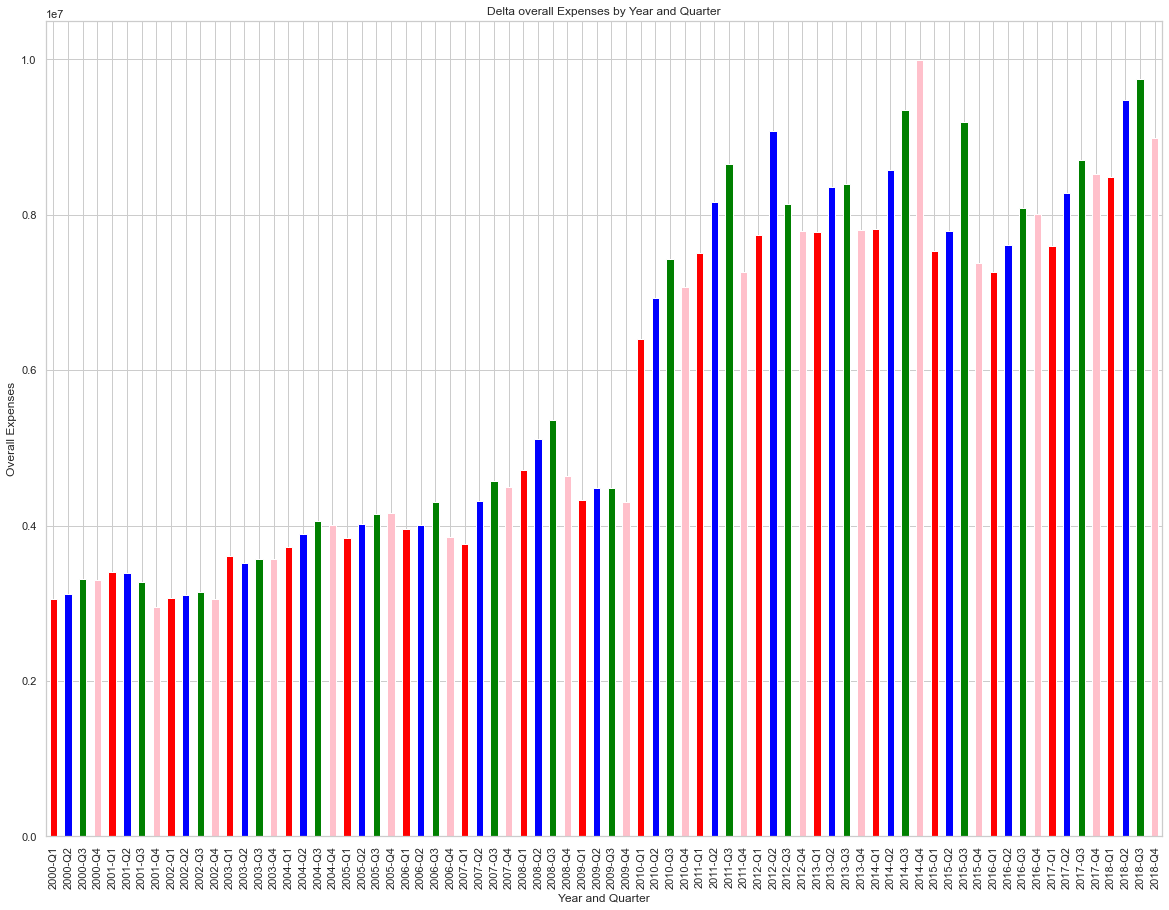

In [17]:
delta['Year'] = delta['Date'].dt.year
delta['YearQuarter'] = delta['Year'].astype(str) + '-Q' + delta['Quarter'].astype(str)

delta.set_index('YearQuarter', inplace=True)

quarter_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'pink'}

bar_colors = [quarter_colors[q] for q in delta['Quarter']]

plt.figure(figsize=(20, 15))
delta['overall_expenses'].plot(kind='bar', title='Delta overall Expenses by Year and Quarter', color=bar_colors)
plt.xlabel('Year and Quarter')
plt.ylabel('Overall Expenses')

plt.xticks(range(len(delta.index)), delta.index, rotation=90)

plt.show()


In [18]:
highest_quarter_counts = {1: 0, 2: 0, 3: 0, 4: 0}

for year in delta['Year'].unique():
    year_data = delta[delta['Year'] == year]
    highest_index = year_data['overall_expenses'].idxmax()
    highest_quarter = year_data.loc[highest_index, 'Quarter']
    highest_quarter_counts[highest_quarter] += 1

for quarter, count in highest_quarter_counts.items():
    print(f"Q{quarter} was the quarter with the highest overall expenses {count} times")


Q1 was the quarter with the highest overall expenses 2 times
Q2 was the quarter with the highest overall expenses 1 times
Q3 was the quarter with the highest overall expenses 14 times
Q4 was the quarter with the highest overall expenses 2 times


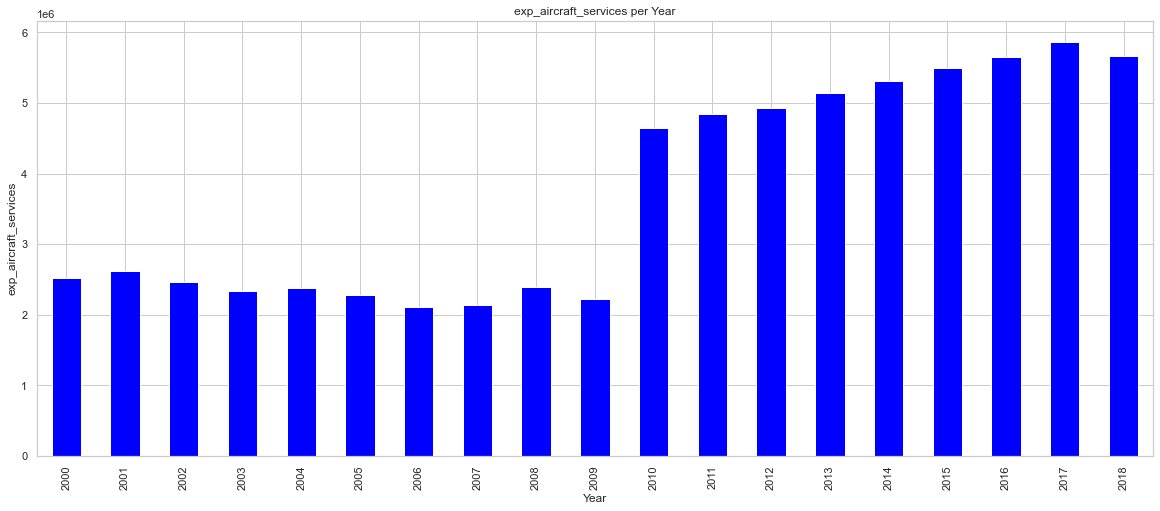

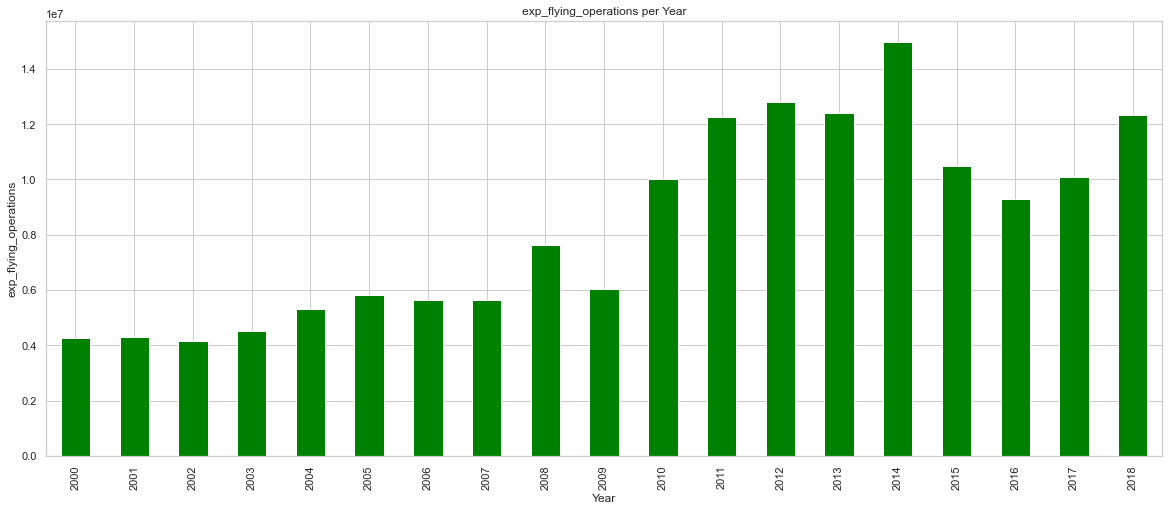

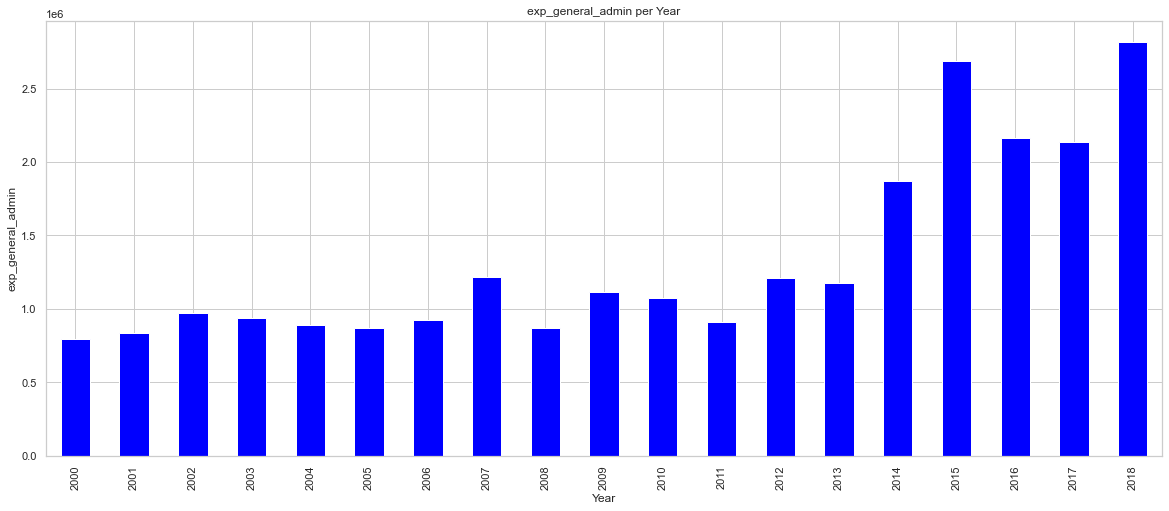

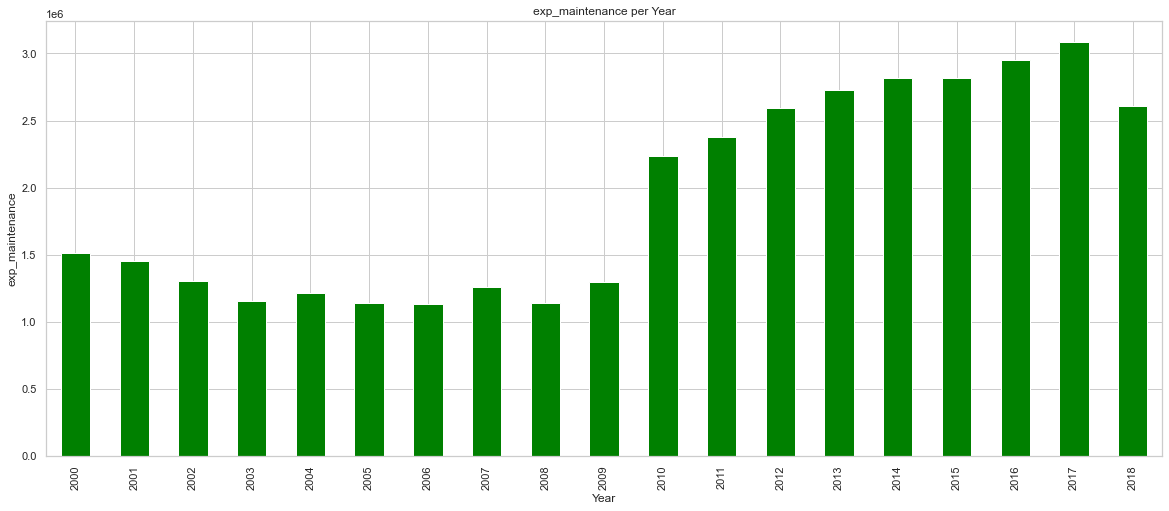

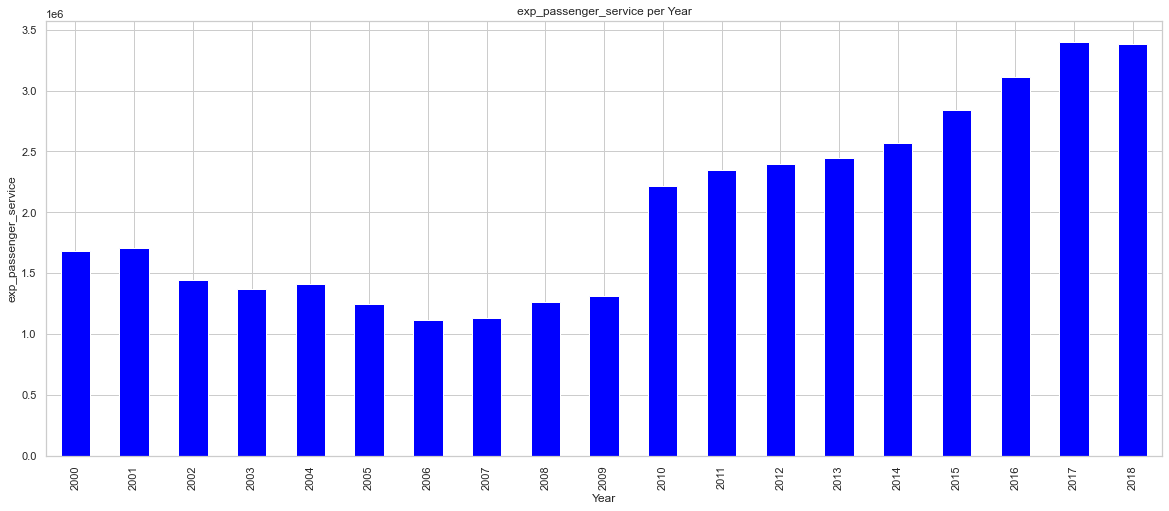

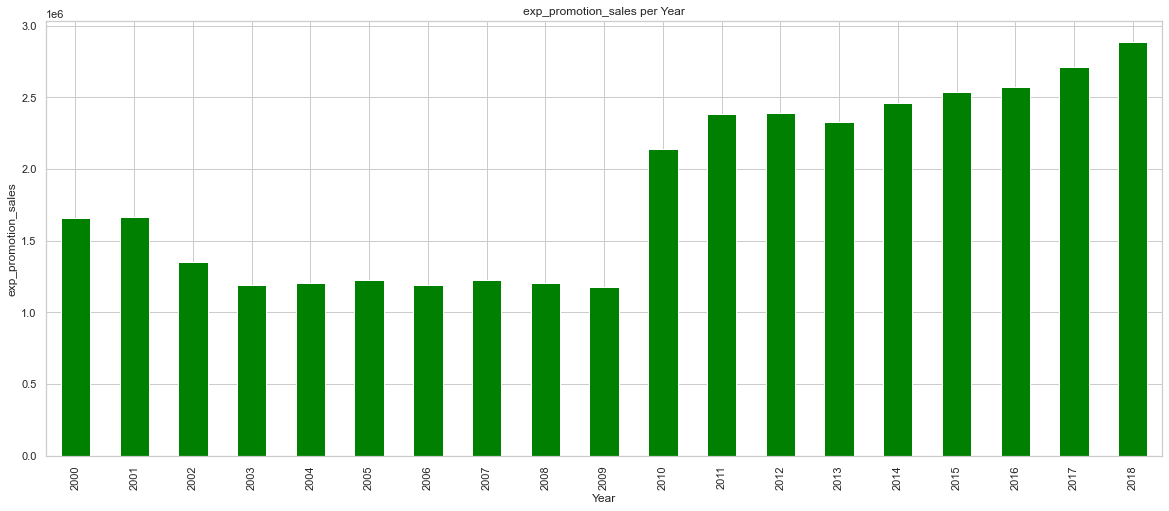

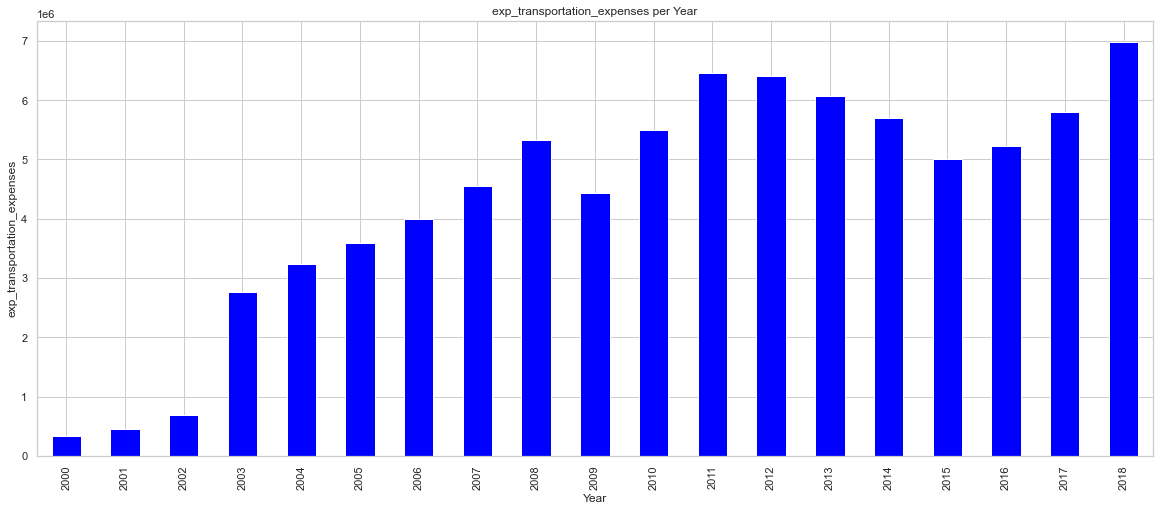

In [19]:
delta_exp_mod = delta_exp.copy()
delta_exp_mod['Date'] = pd.to_datetime(delta_exp_mod['Date'])
delta_exp_mod['Year'] = delta_exp_mod['Date'].dt.year
yearly_exp_data = delta_exp_mod.groupby('Year').sum()
yearly_exp_data.drop(columns=['Quarter'], inplace=True)
colors = ['blue', 'green']
for idx, column in enumerate(yearly_exp_data.columns):
    ax = yearly_exp_data[column].plot(kind='bar', figsize=(20, 8), title=f'{column} per Year', color=colors[idx % 2])
    plt.xlabel('Year')
    plt.ylabel(column)

    plt.show()

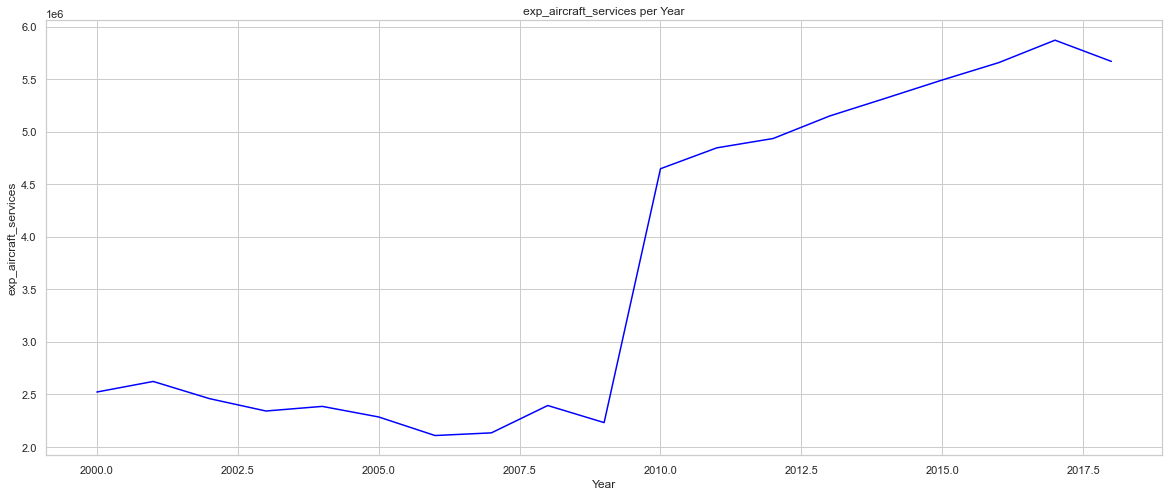

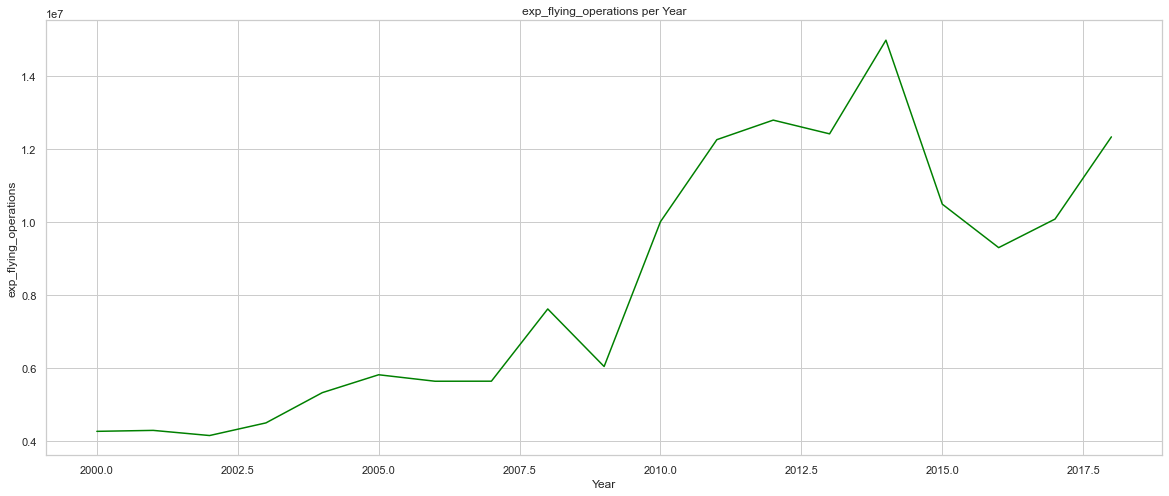

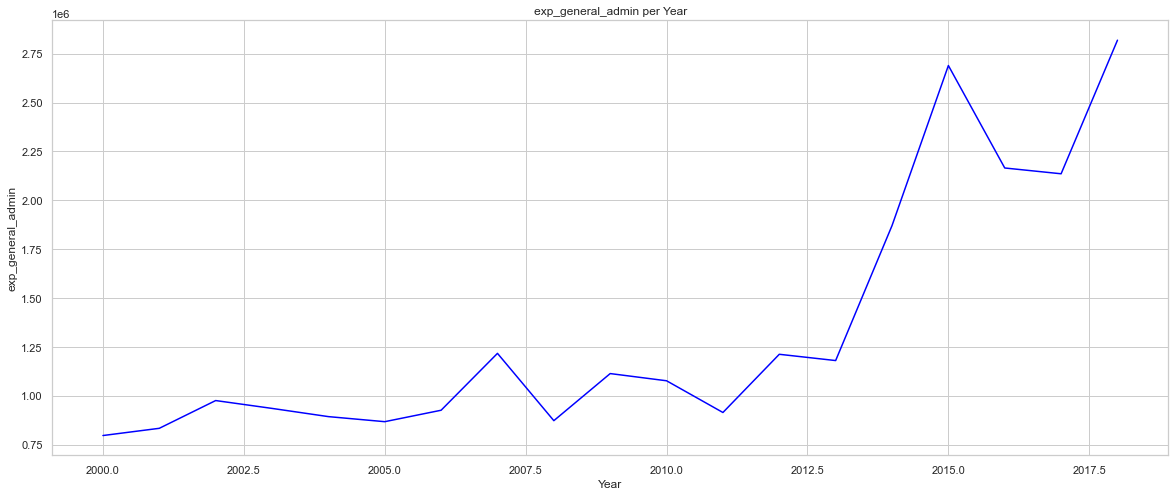

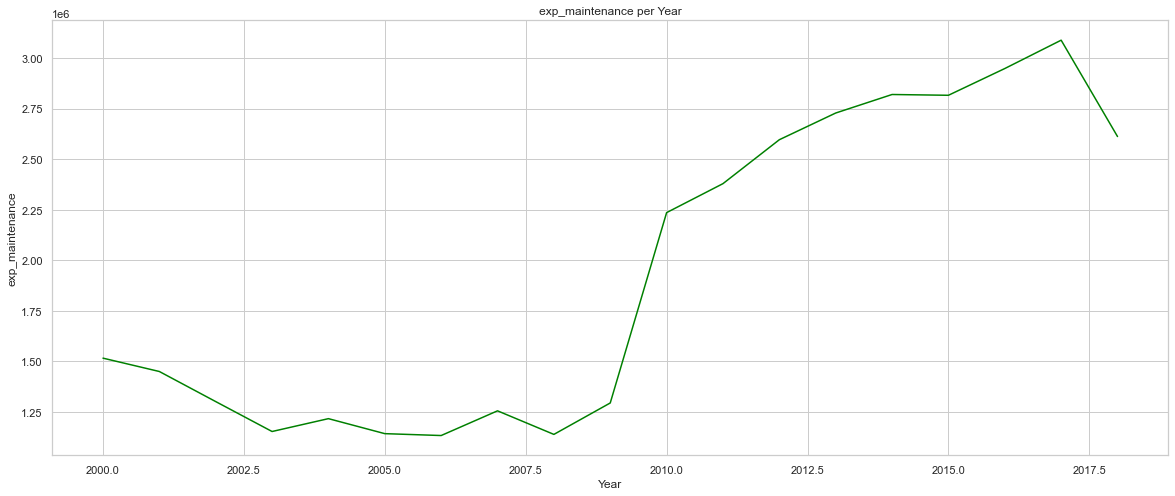

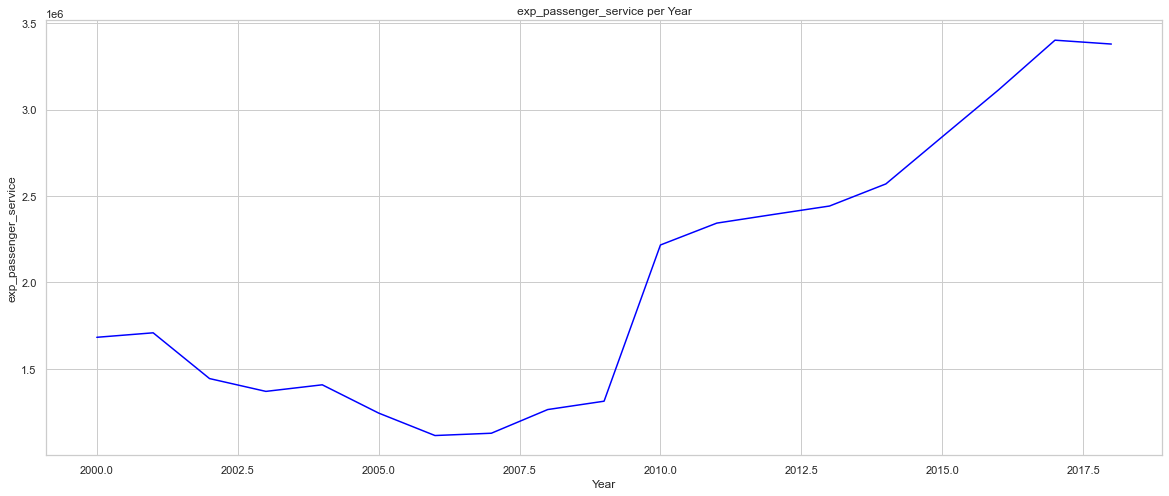

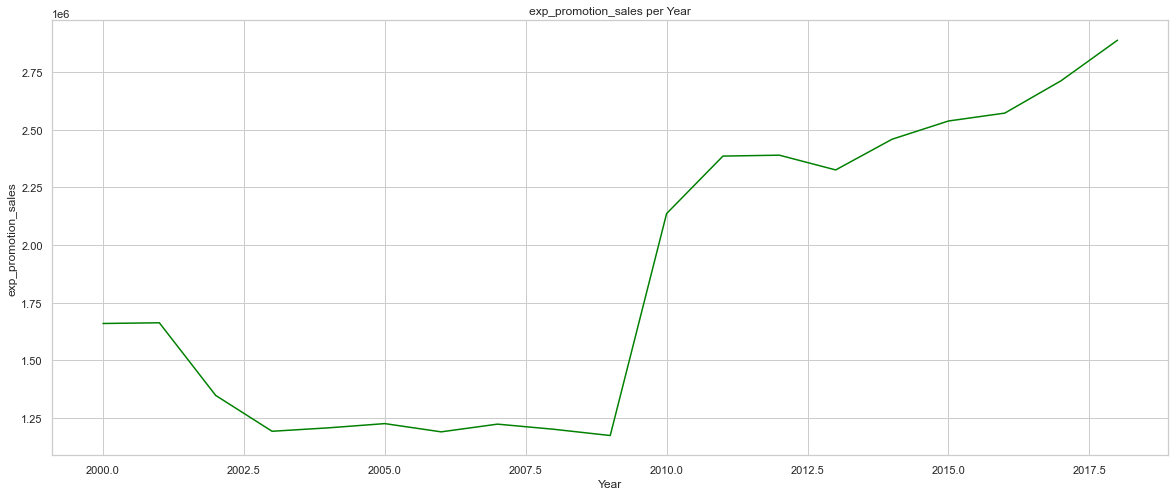

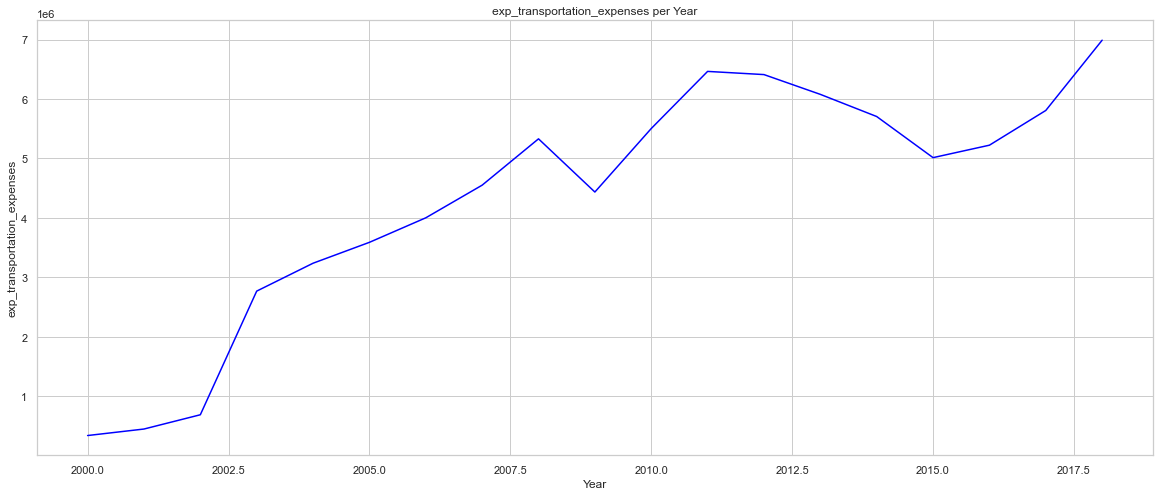

In [20]:
for idx, column in enumerate(yearly_exp_data.columns):
    ax = yearly_exp_data[column].plot(kind='line', figsize=(20, 8), title=f'{column} per Year', color=colors[idx % 2])
    plt.xlabel('Year')
    plt.ylabel(column)

    plt.show()

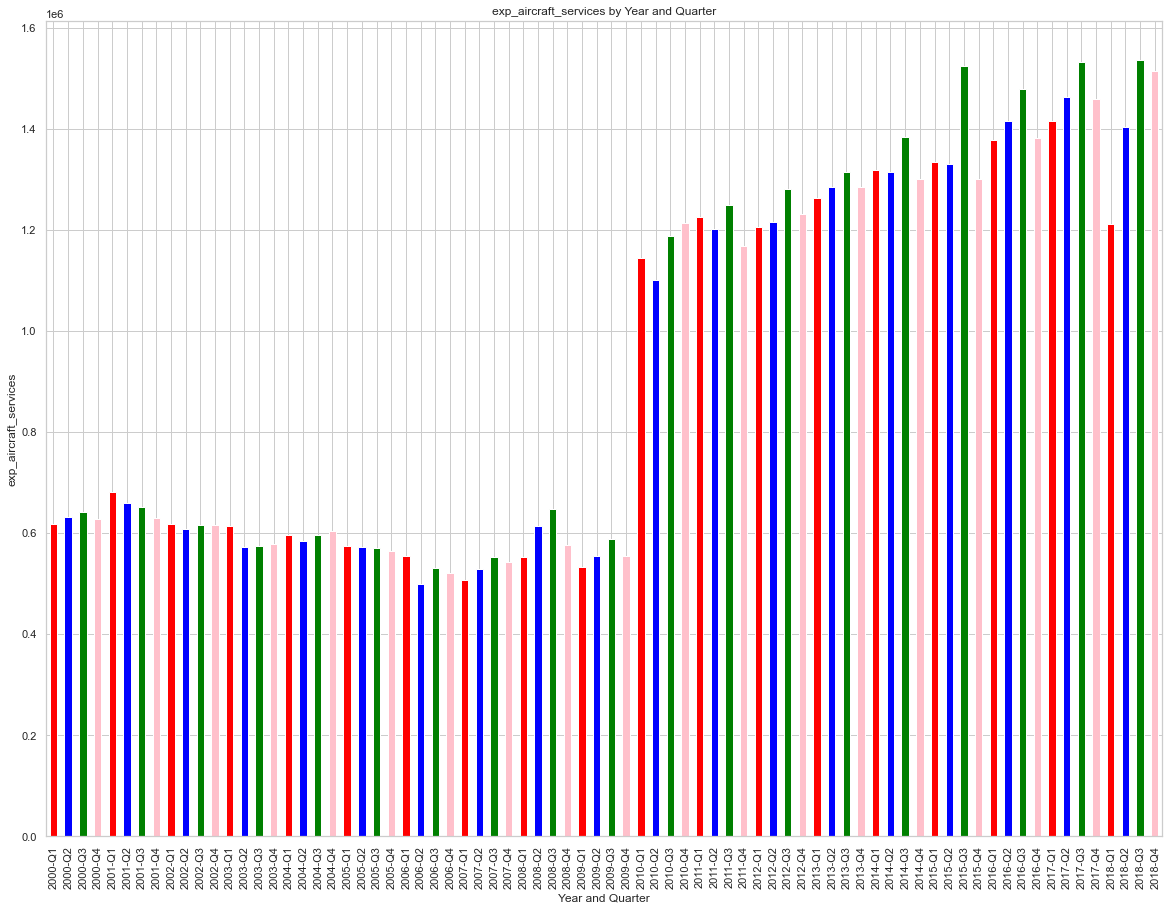

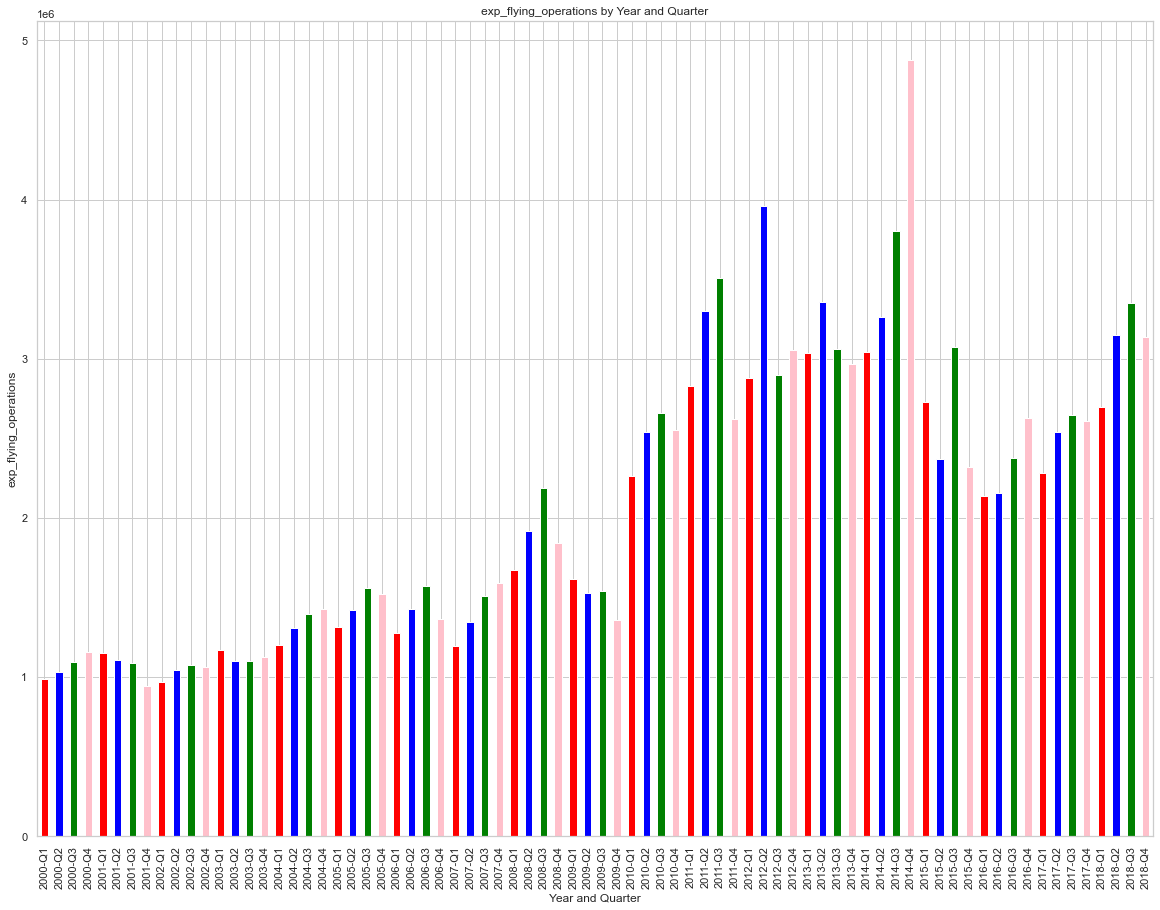

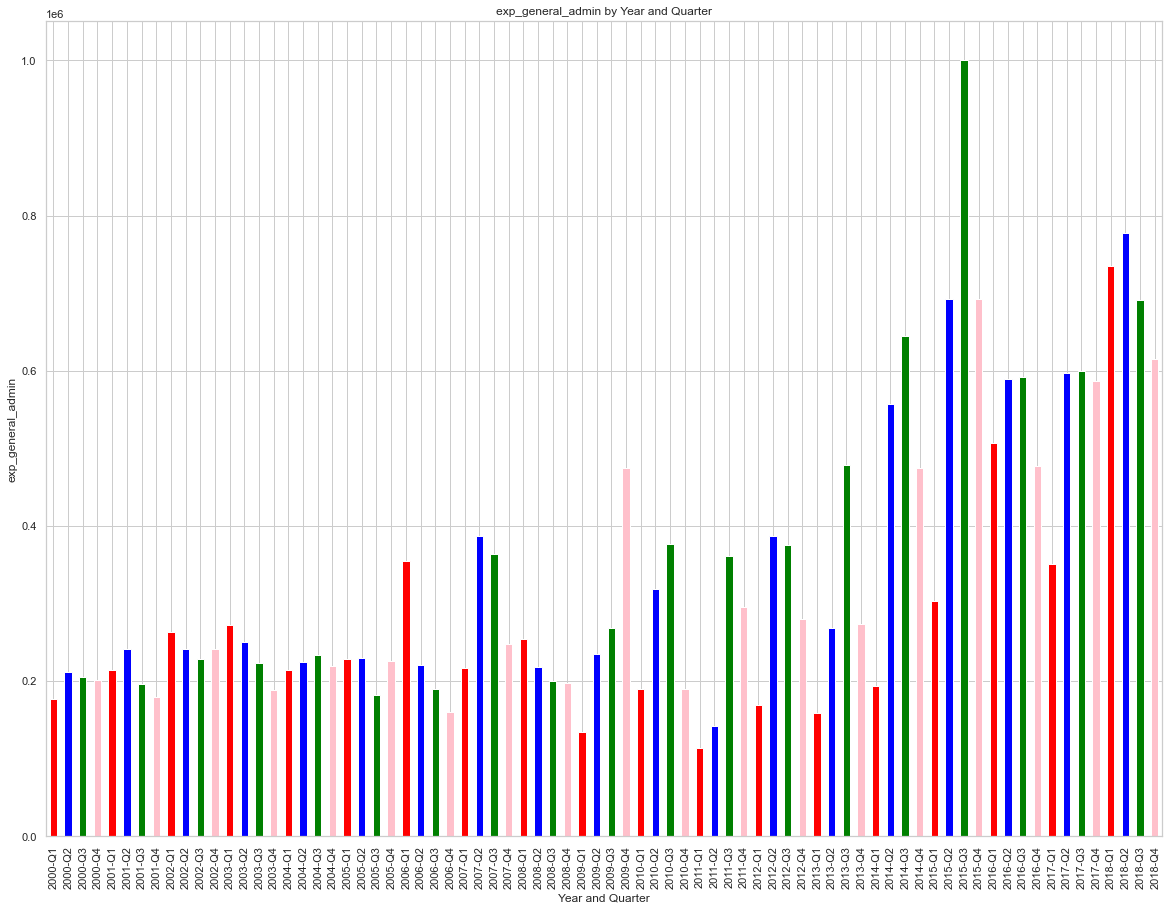

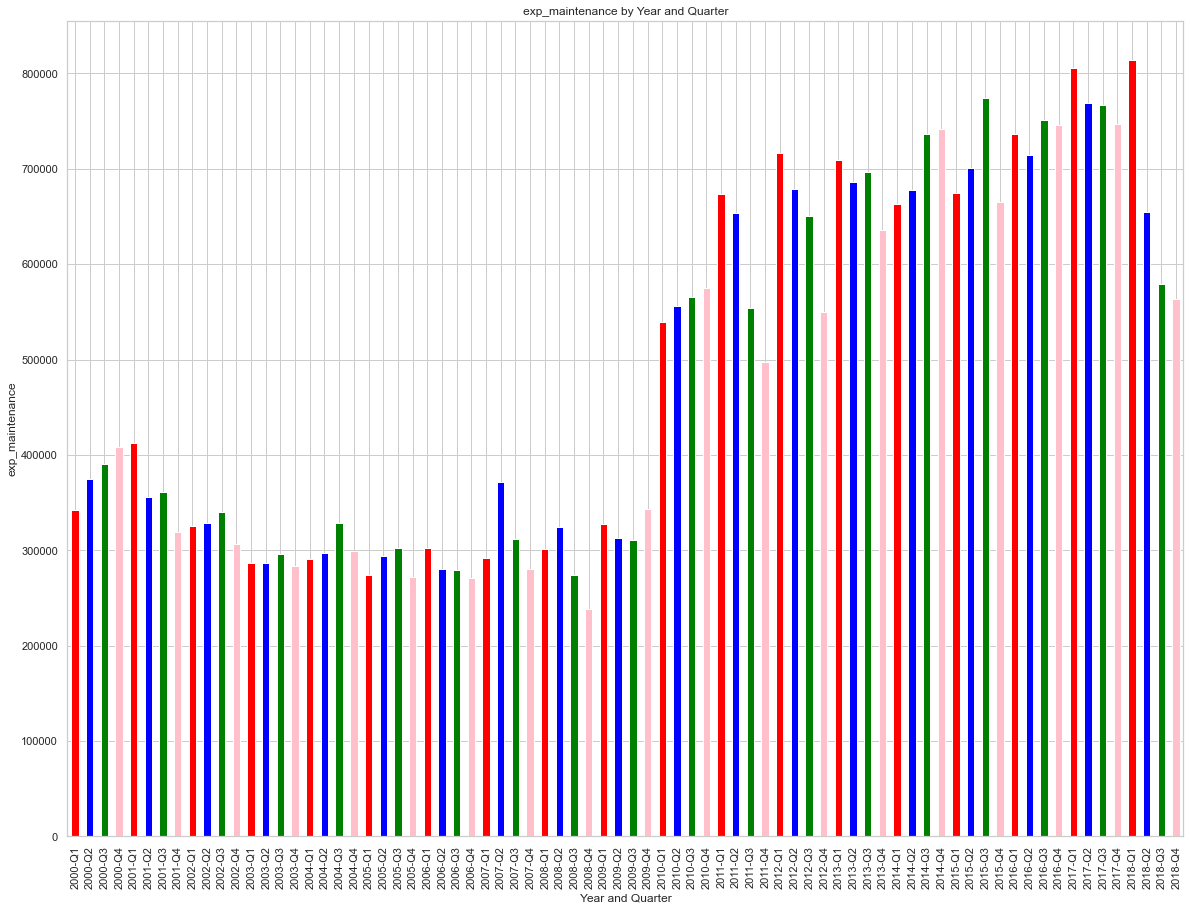

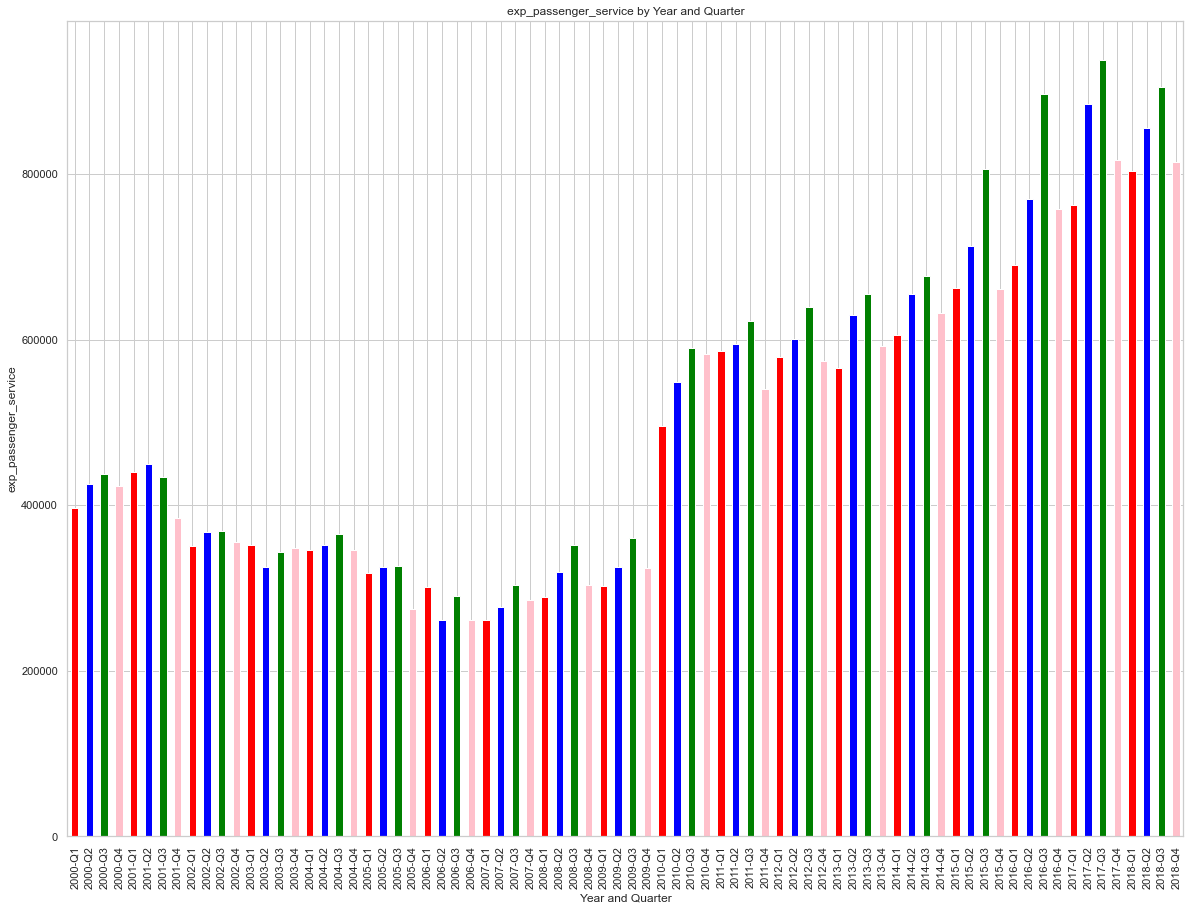

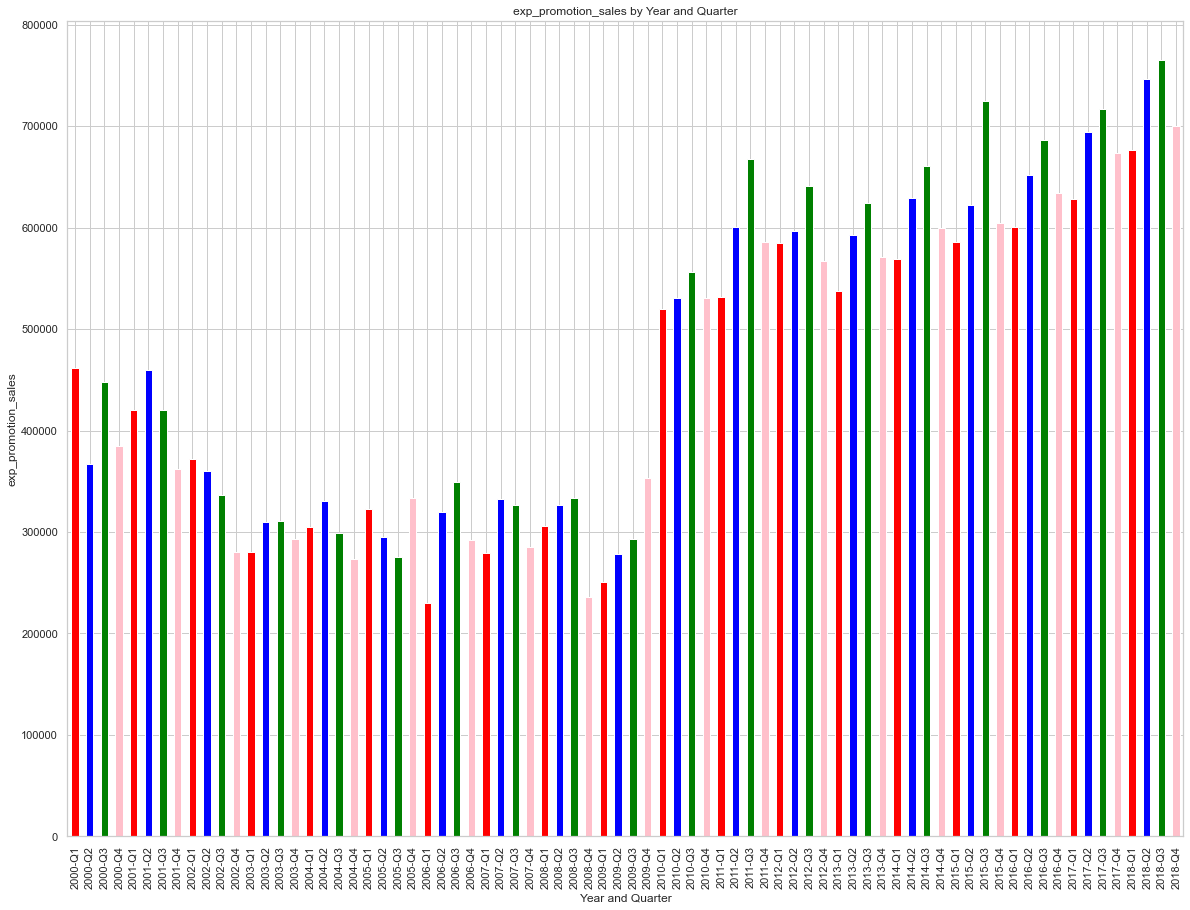

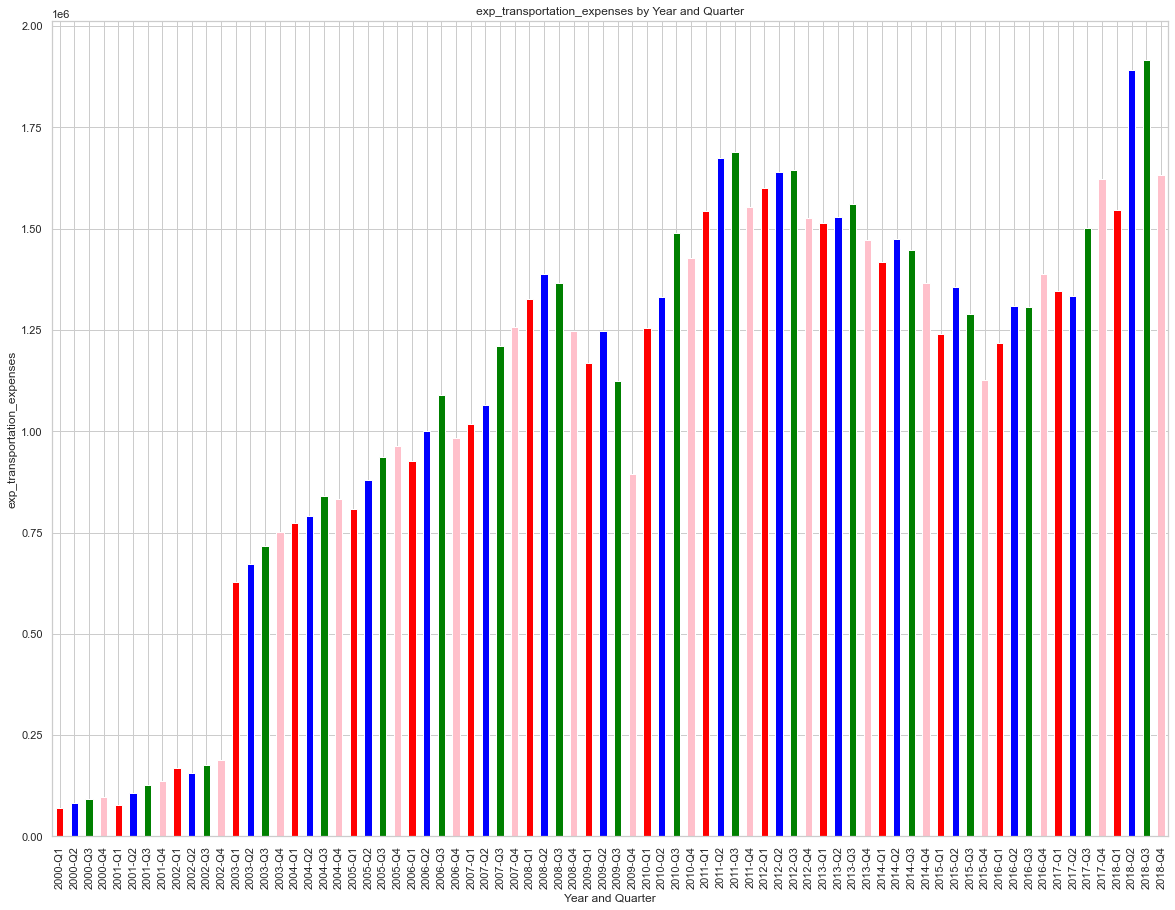

In [21]:
delta['Year'] = delta['Date'].dt.year
delta['YearQuarter'] = delta['Year'].astype(str) + '-Q' + delta['Quarter'].astype(str)

delta.set_index('YearQuarter', inplace=True)

quarter_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'pink'}

columns = ['exp_aircraft_services', 'exp_flying_operations', 'exp_general_admin', 'exp_maintenance', 'exp_passenger_service', 'exp_promotion_sales', 'exp_transportation_expenses']

for column in columns:
    bar_colors = [quarter_colors[q] for q in delta['Quarter']]

    plt.figure(figsize=(20, 15))
    delta[column].plot(kind='bar', title=f'{column} by Year and Quarter', color=bar_colors)
    plt.xlabel('Year and Quarter')
    plt.ylabel(column)

    plt.xticks(range(len(delta.index)), delta.index, rotation=90)

    plt.show()

Based on the available data, it can be observed that the expenses for Q1 and Q4 are generally lower when compared to Q2 and Q3. This trend can be attributed to the impact of seasonal factors on the aviation industry. Q2 and Q3 are typically considered high seasons for air travel, and more people tend to fly during these periods, which results in higher expenses. However, we will need to investigate the revenues during these quarters to validate this assumption. If we observe a corresponding increase in revenues during Q2 and Q3, it would confirm that this is a seasonal pattern in air travel.

## Revenues Delta Air Lines Inc.

In [22]:
selected_columns = ['Date', 'Quarter'] + [col for col in delta.columns if col.startswith('r_')]
delta_rev = delta[selected_columns]

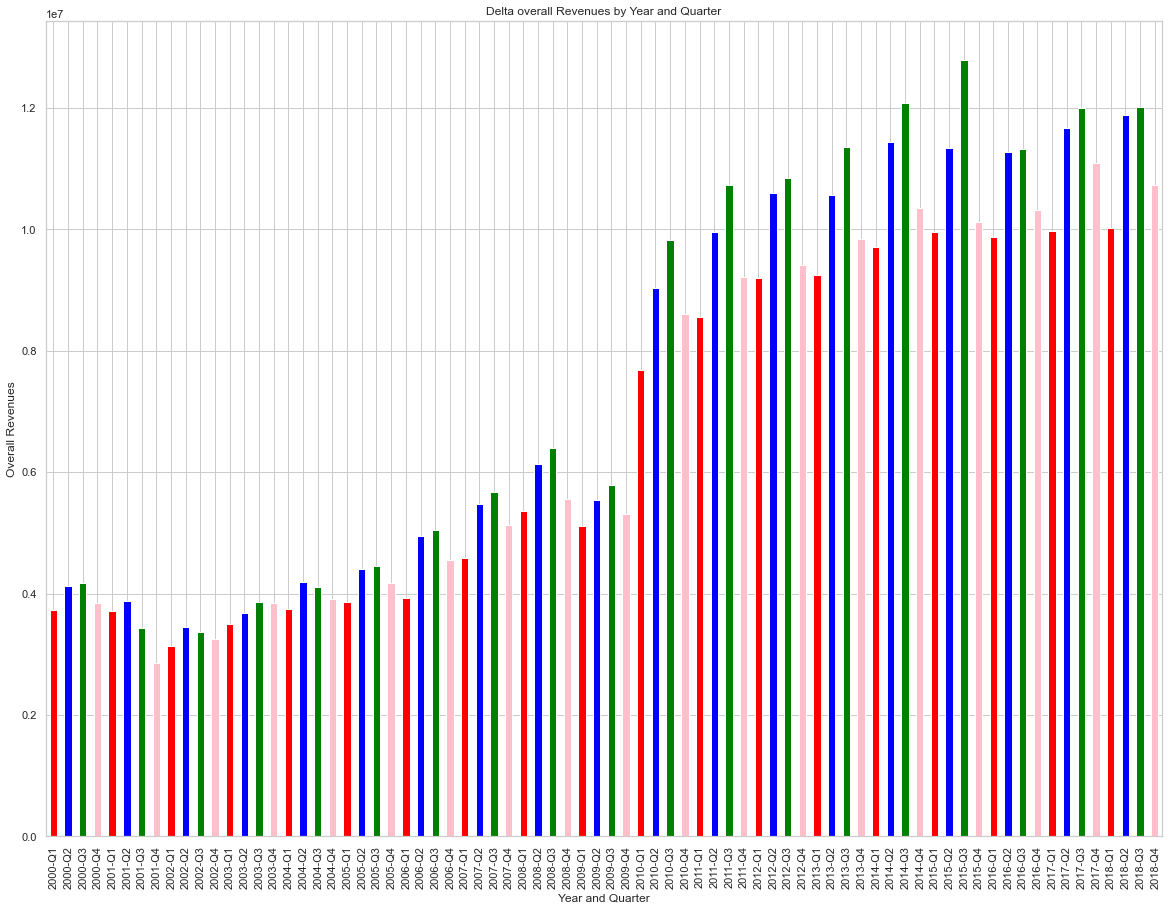

In [23]:
delta['Year'] = delta['Date'].dt.year
delta['YearQuarter'] = delta['Year'].astype(str) + '-Q' + delta['Quarter'].astype(str)

delta.set_index('YearQuarter', inplace=True)

quarter_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'pink'}

bar_colors = [quarter_colors[q] for q in delta['Quarter']]

plt.figure(figsize=(20, 15))
delta['overall_revenues'].plot(kind='bar', title='Delta overall Revenues by Year and Quarter', color=bar_colors)
plt.xlabel('Year and Quarter')
plt.ylabel('Overall Revenues')

plt.xticks(range(len(delta.index)), delta.index, rotation=90)

plt.show()


In [24]:
highest_quarter_counts = {1: 0, 2: 0, 3: 0, 4: 0}

for year in delta['Year'].unique():
    year_data = delta[delta['Year'] == year]
    highest_index = year_data['overall_revenues'].idxmax()
    highest_quarter = year_data.loc[highest_index, 'Quarter']
    highest_quarter_counts[highest_quarter] += 1

for quarter, count in highest_quarter_counts.items():
    print(f"Q{quarter} was the highest quarter {count} times")

Q1 was the highest quarter 0 times
Q2 was the highest quarter 3 times
Q3 was the highest quarter 16 times
Q4 was the highest quarter 0 times


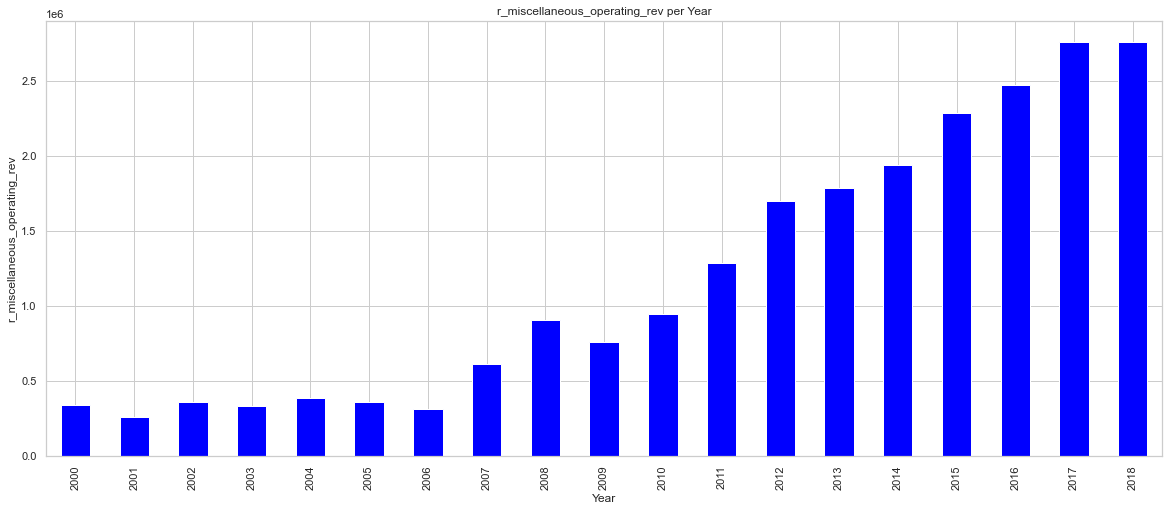

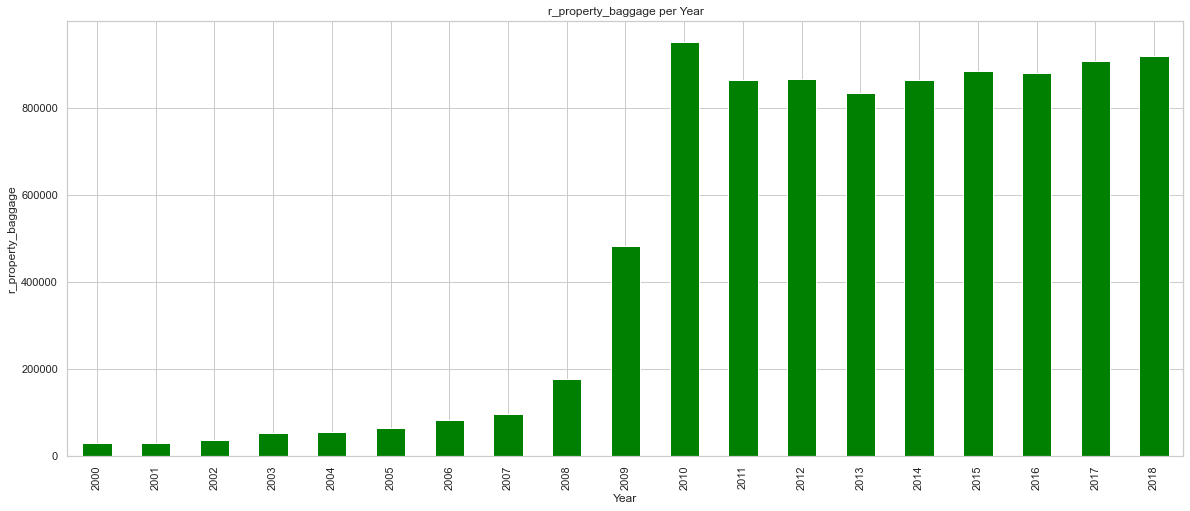

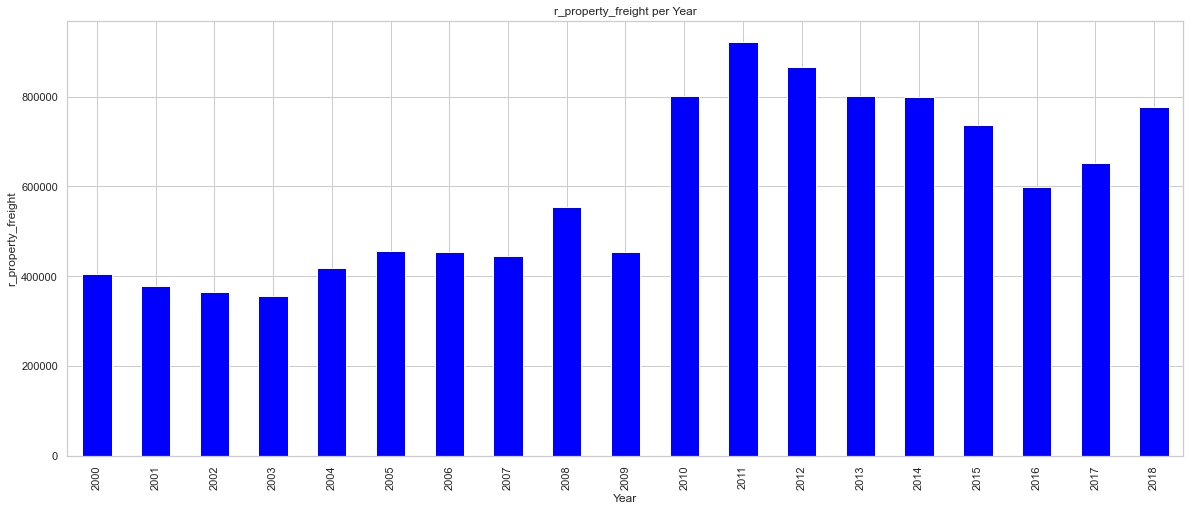

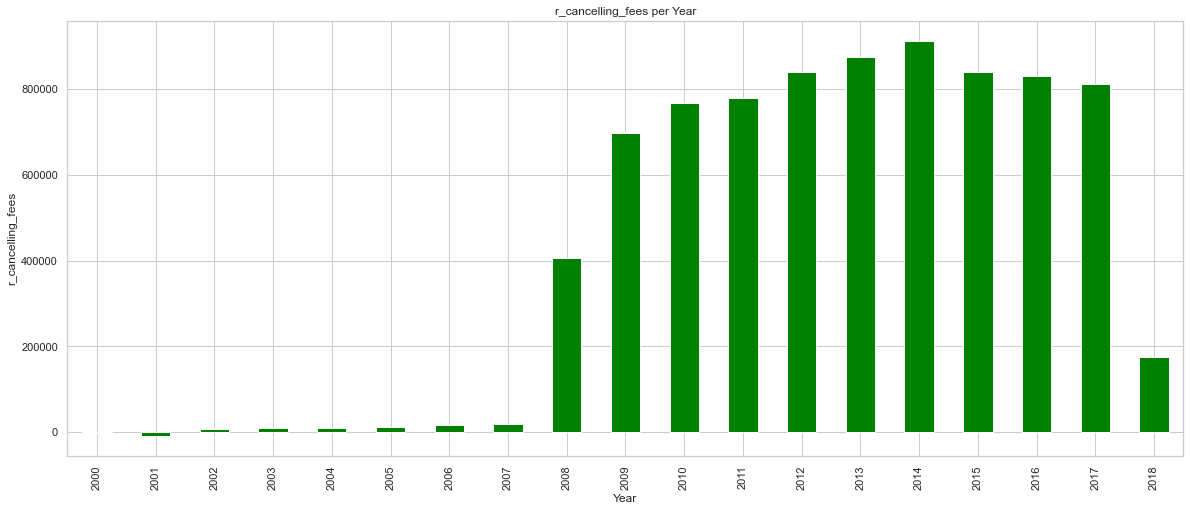

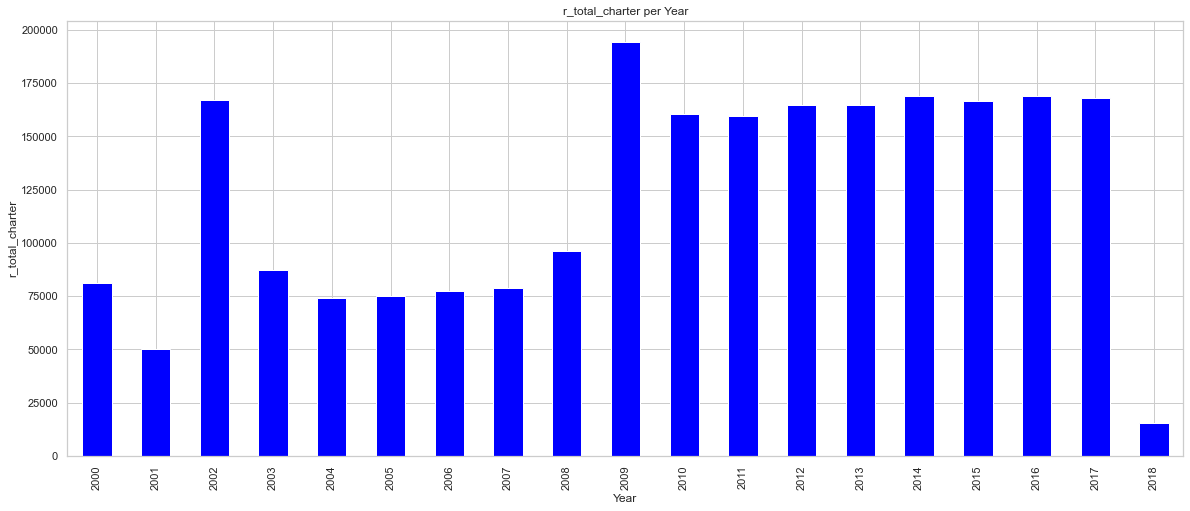

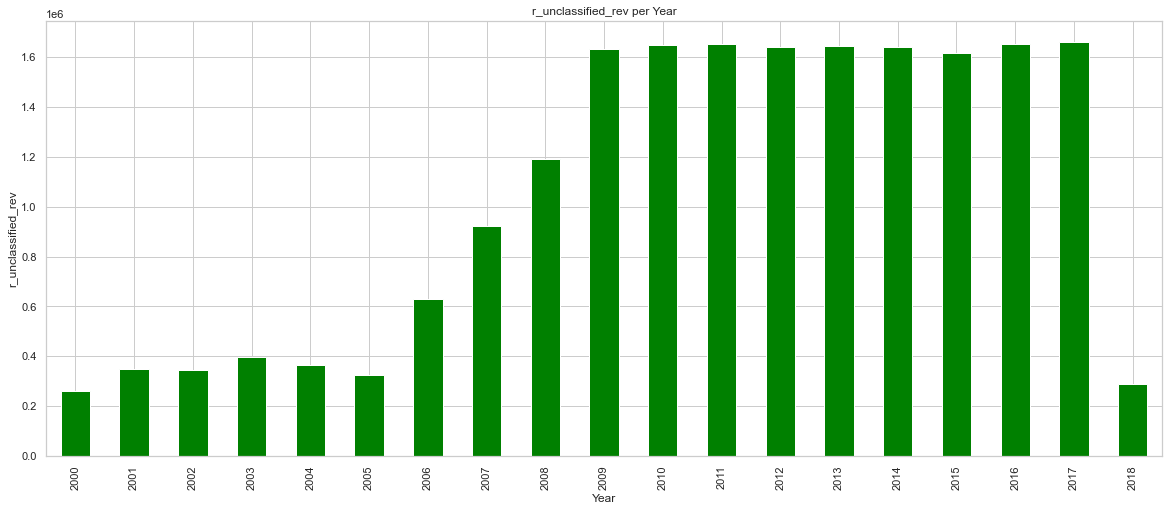

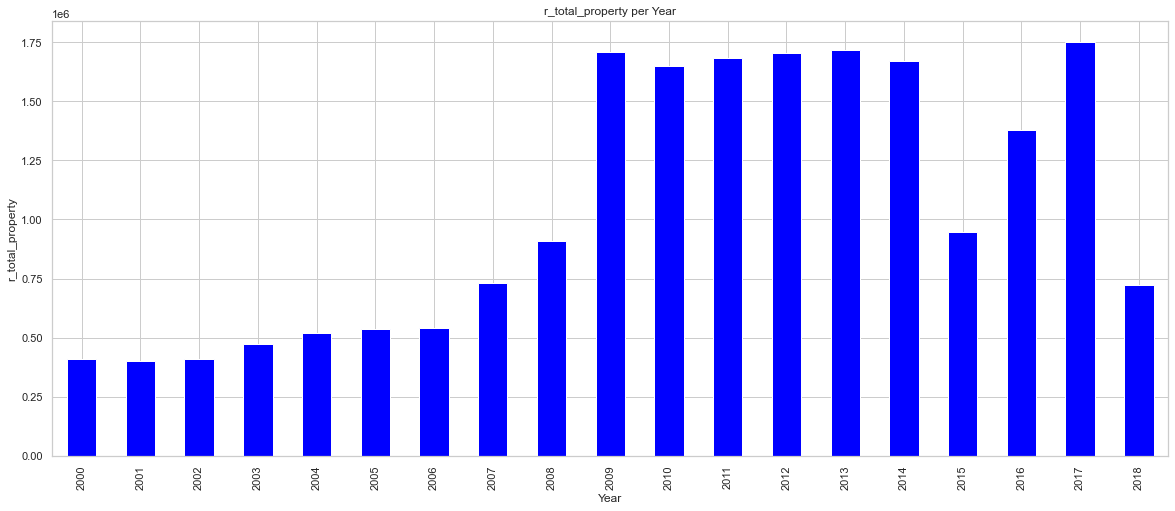

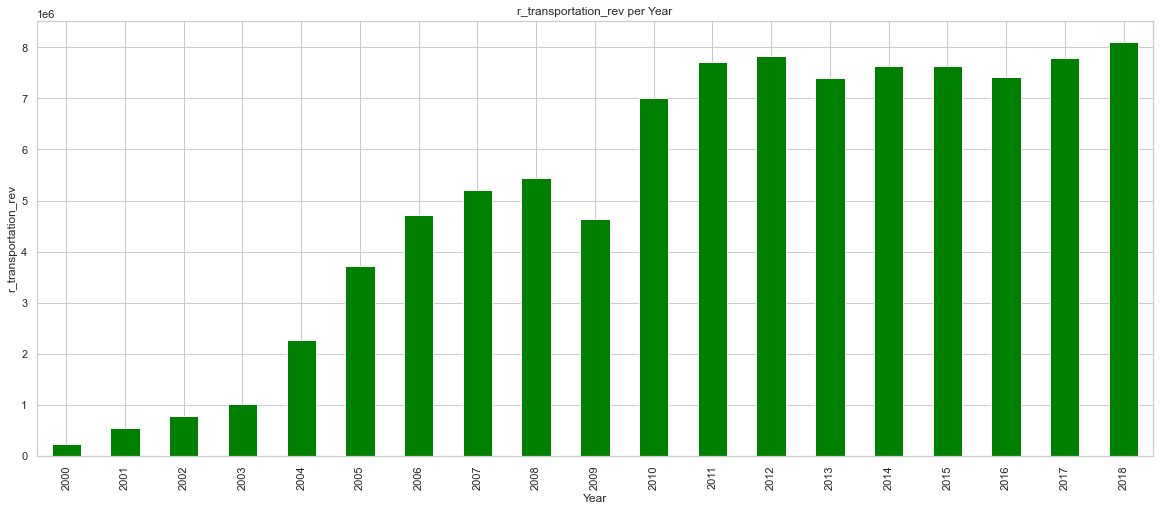

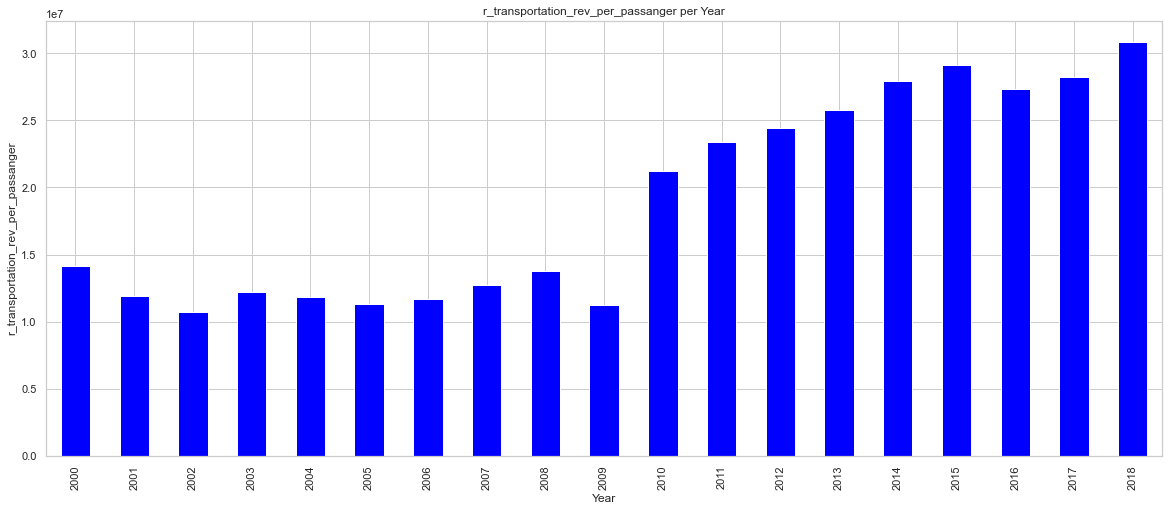

In [25]:
delta_rev_mod = delta_rev.copy()
delta_rev_mod['Date'] = pd.to_datetime(delta_rev_mod['Date'])
delta_rev_mod['Year'] = delta_rev_mod['Date'].dt.year
yearly_rev_data = delta_rev_mod.groupby('Year').sum()
yearly_rev_data.drop(columns=['Quarter'], inplace=True)
colors = ['blue', 'green']
for idx, column in enumerate(yearly_rev_data.columns):
    ax = yearly_rev_data[column].plot(kind='bar', figsize=(20, 8), title=f'{column} per Year', color=colors[idx % 2])
    plt.xlabel('Year')
    plt.ylabel(column)

    plt.show()


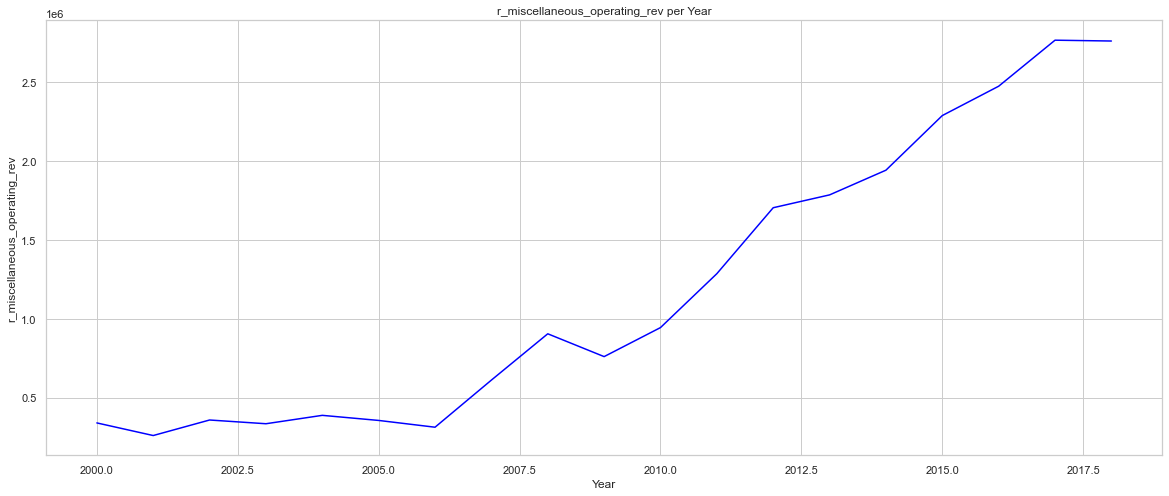

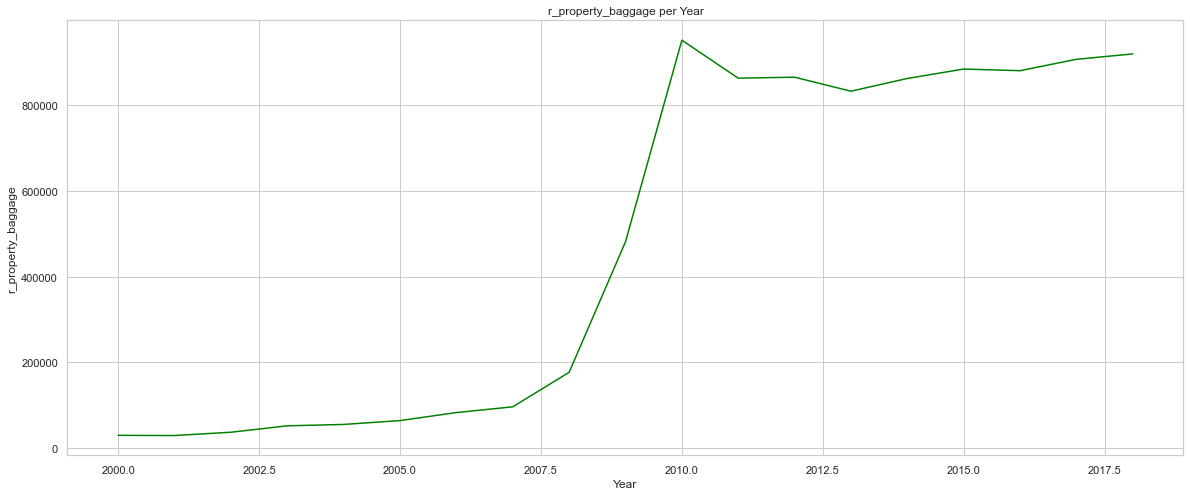

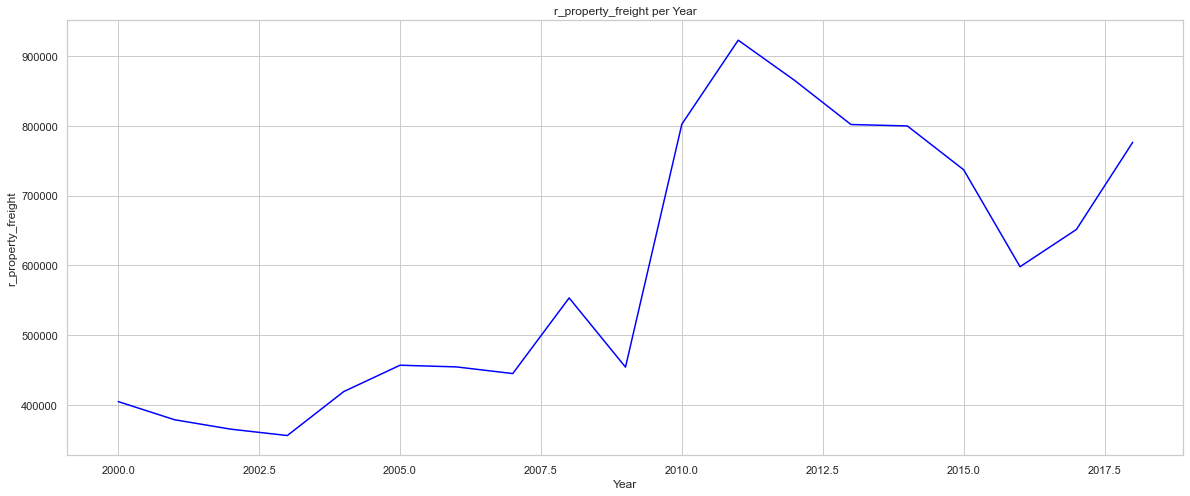

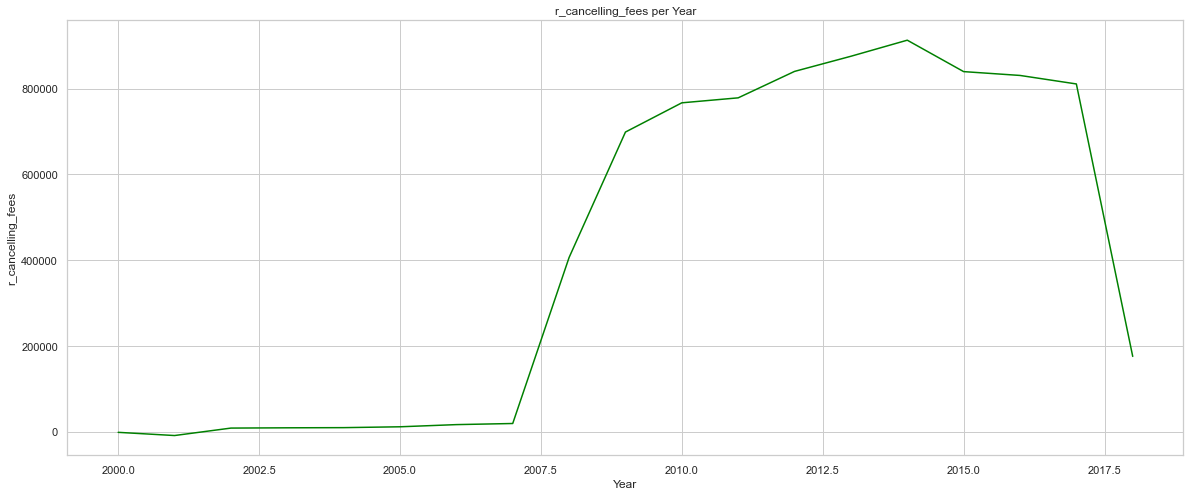

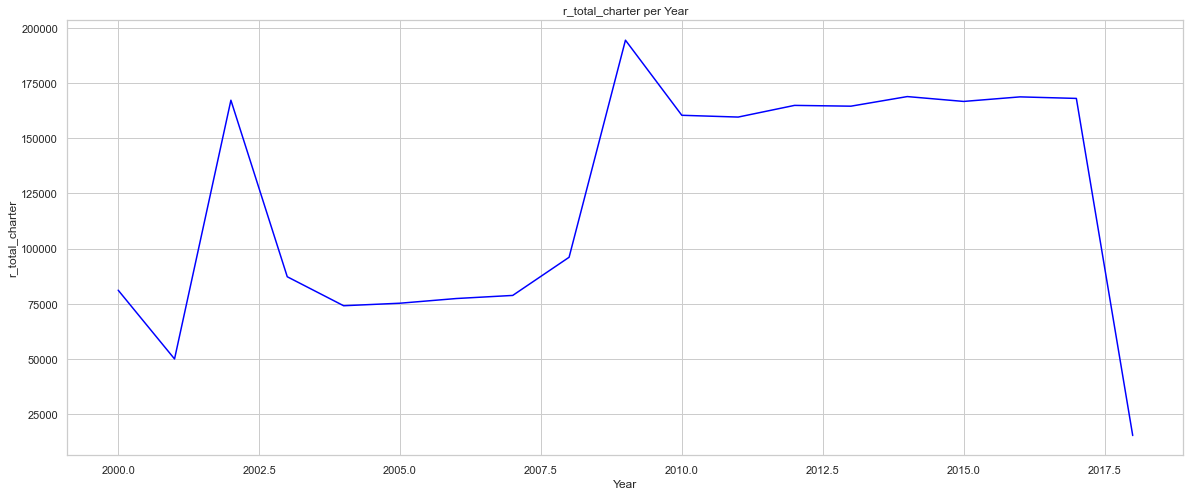

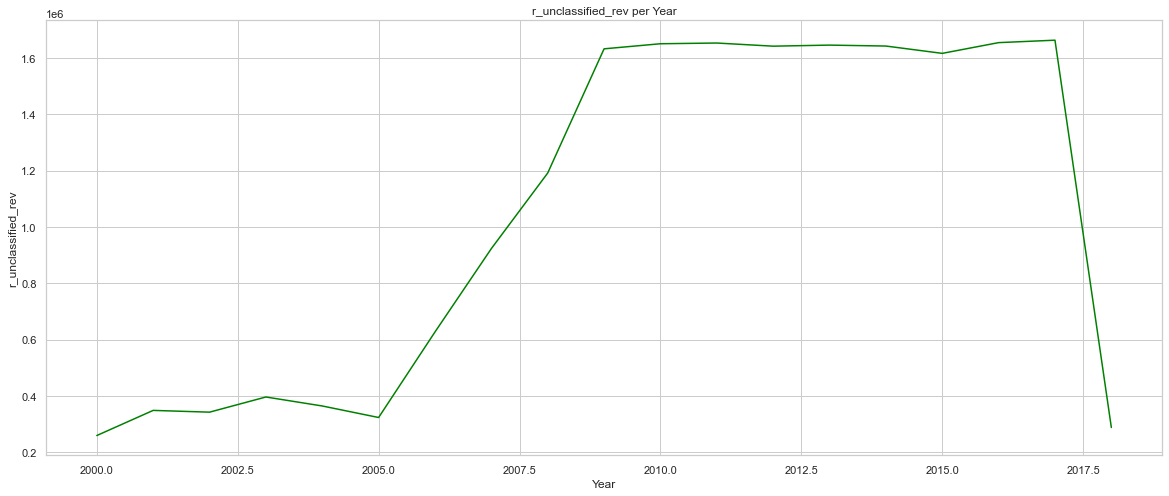

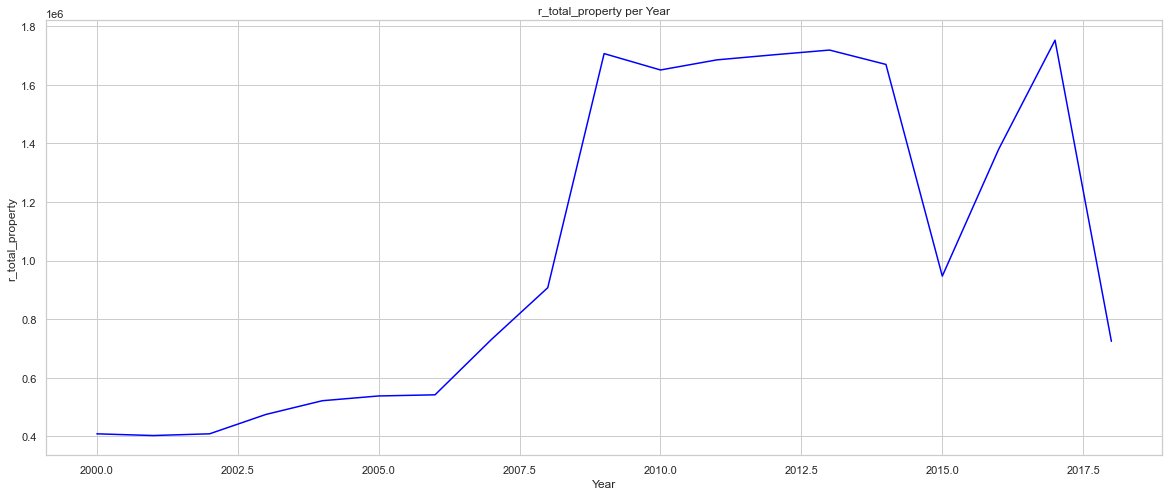

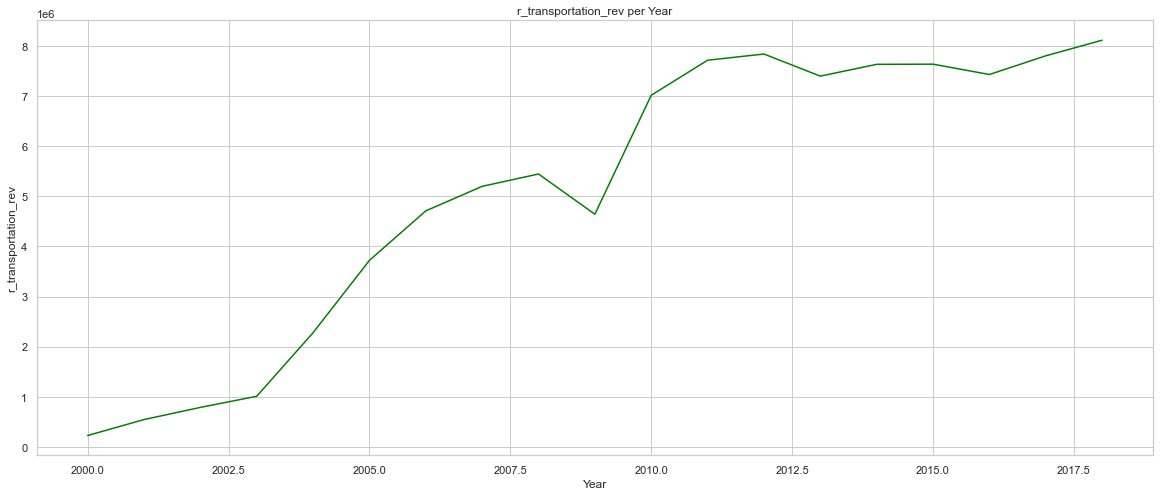

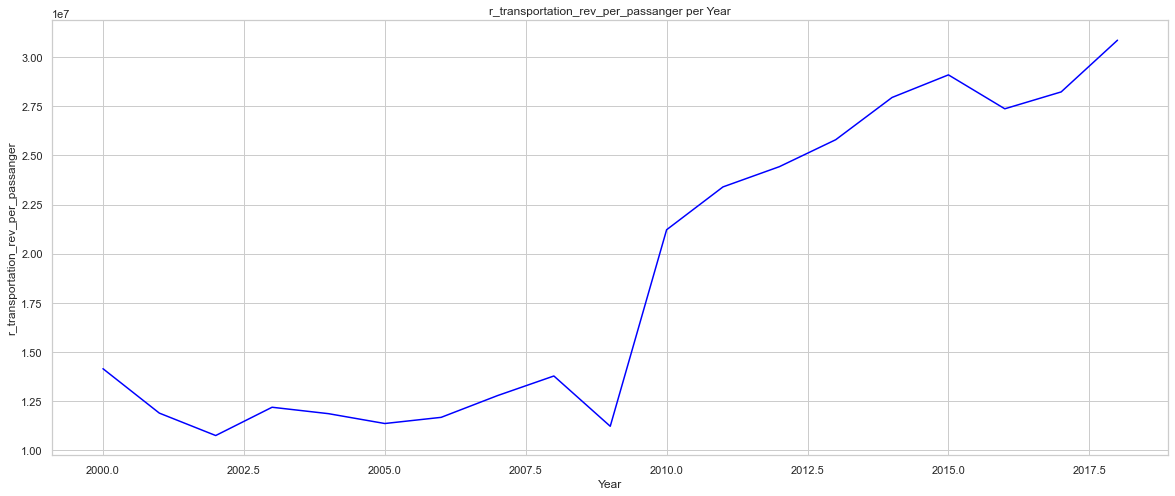

In [26]:
for idx, column in enumerate(yearly_rev_data.columns):
    ax = yearly_rev_data[column].plot(kind='line', figsize=(20, 8), title=f'{column} per Year', color=colors[idx % 2])
    plt.xlabel('Year')
    plt.ylabel(column)

    plt.show()

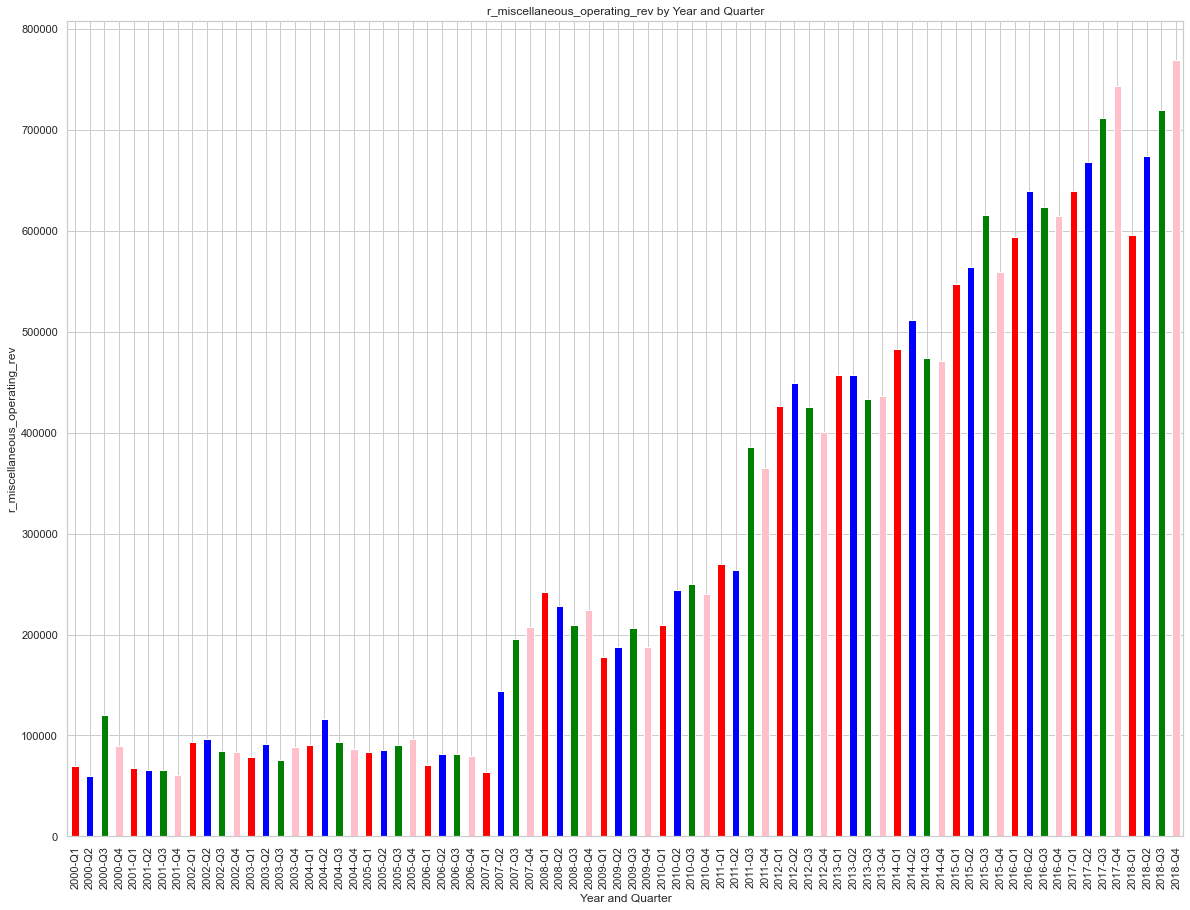

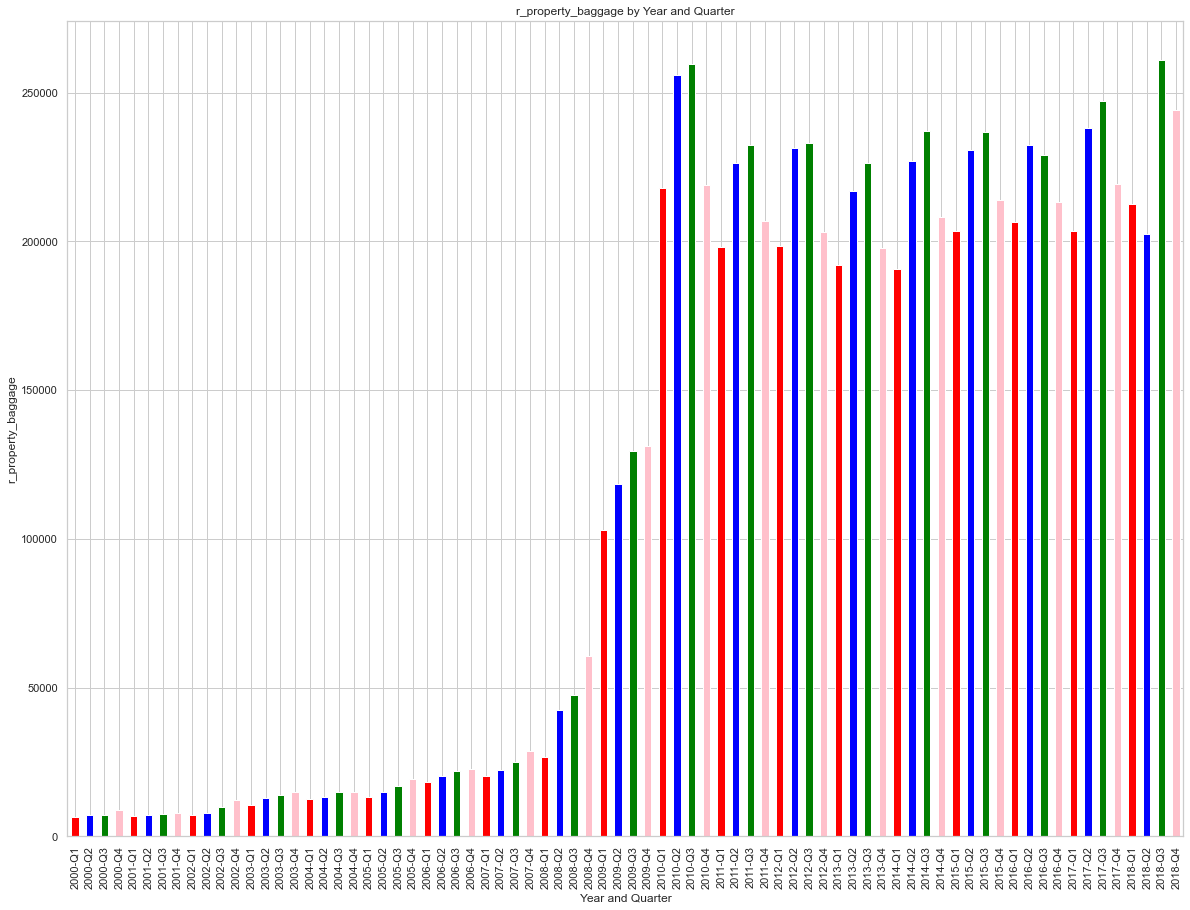

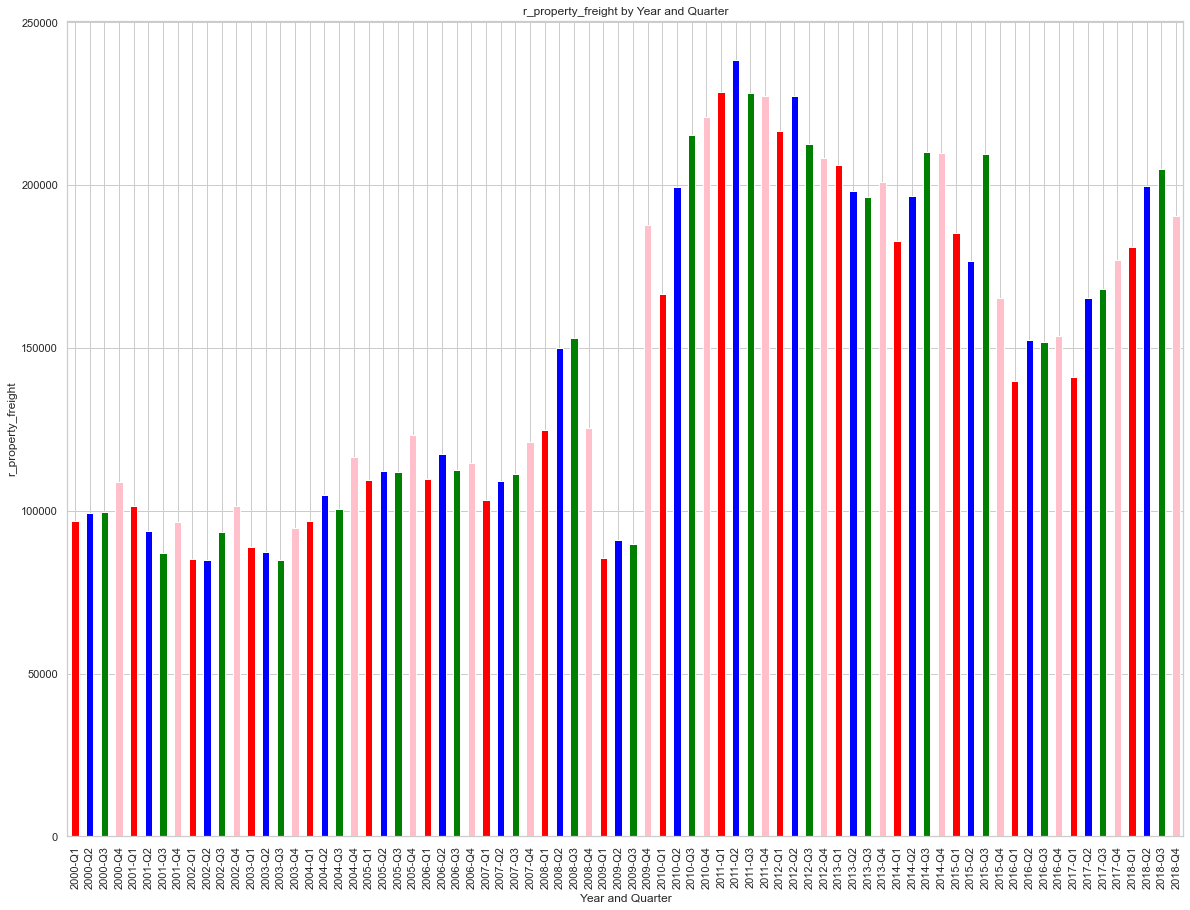

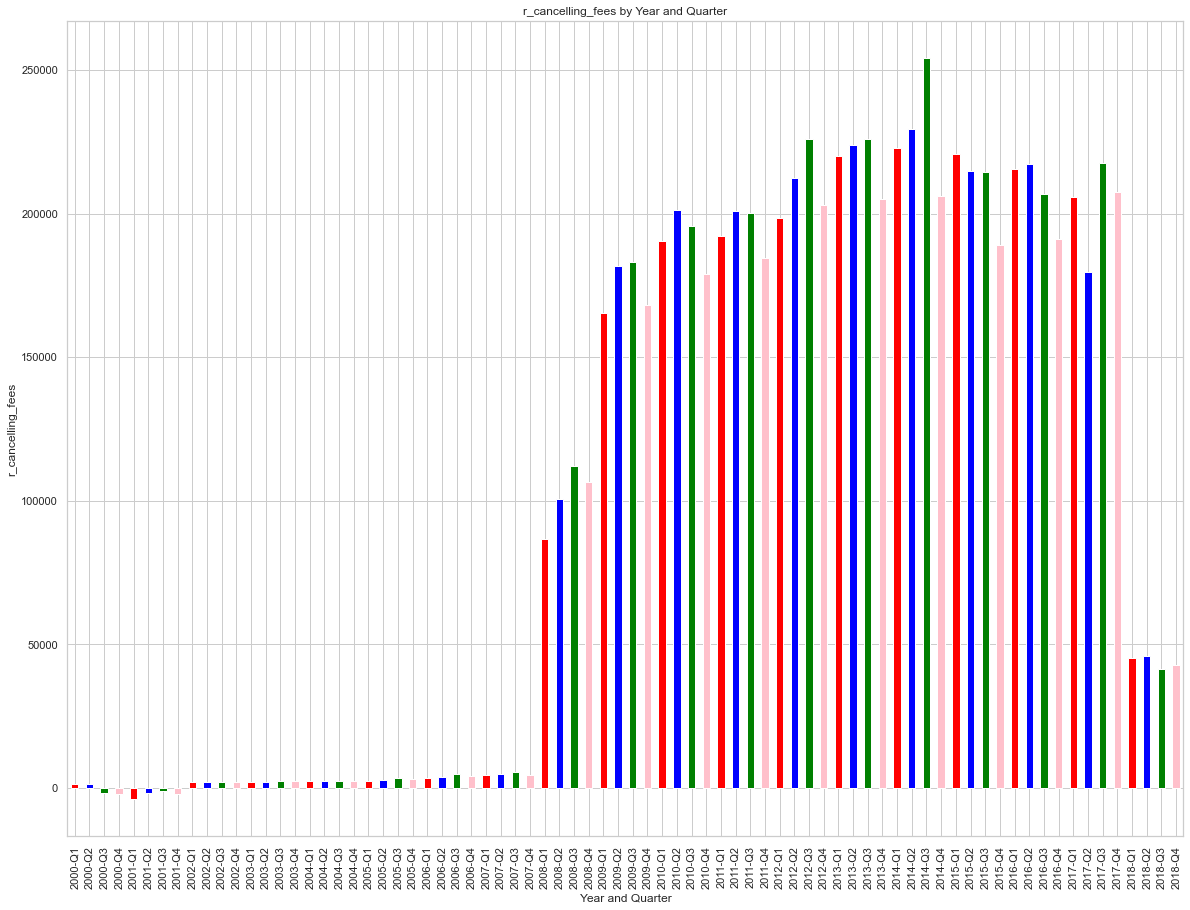

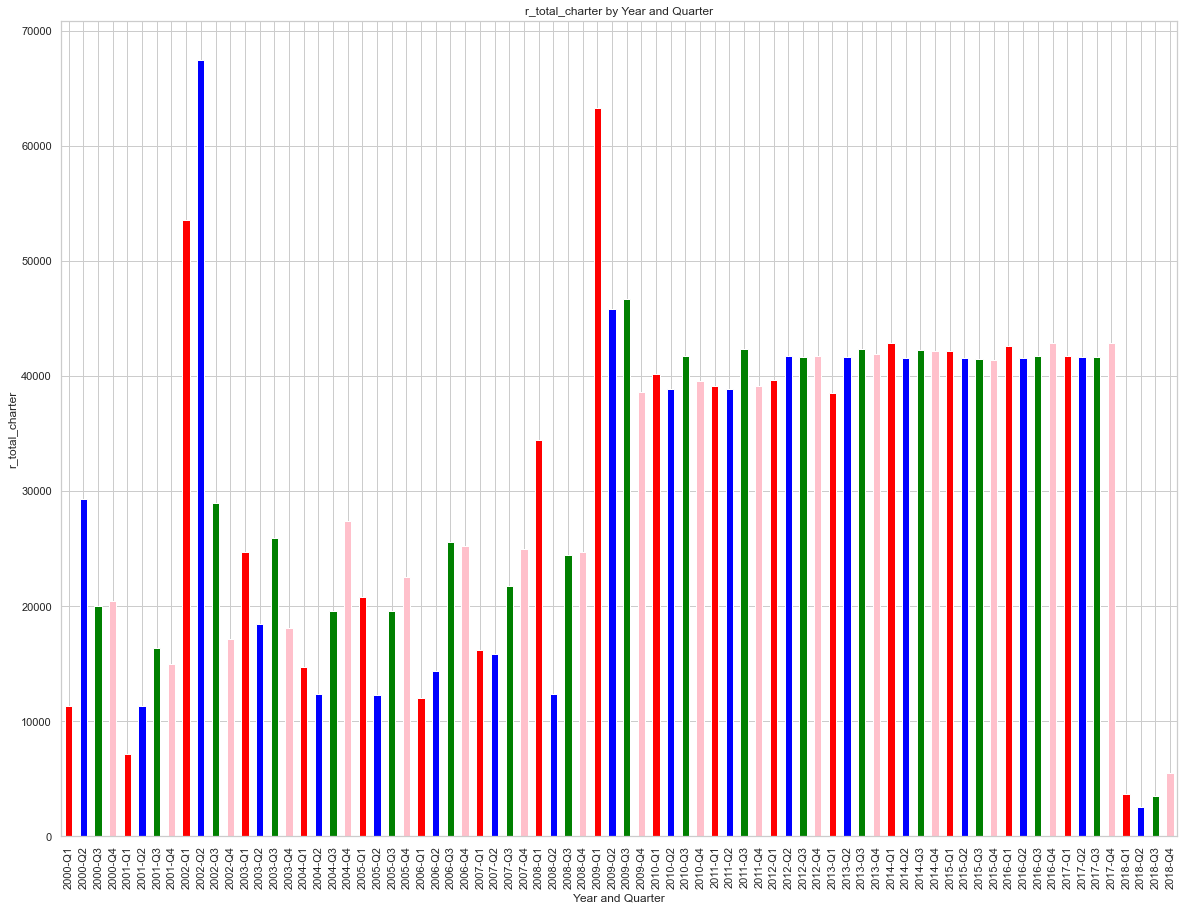

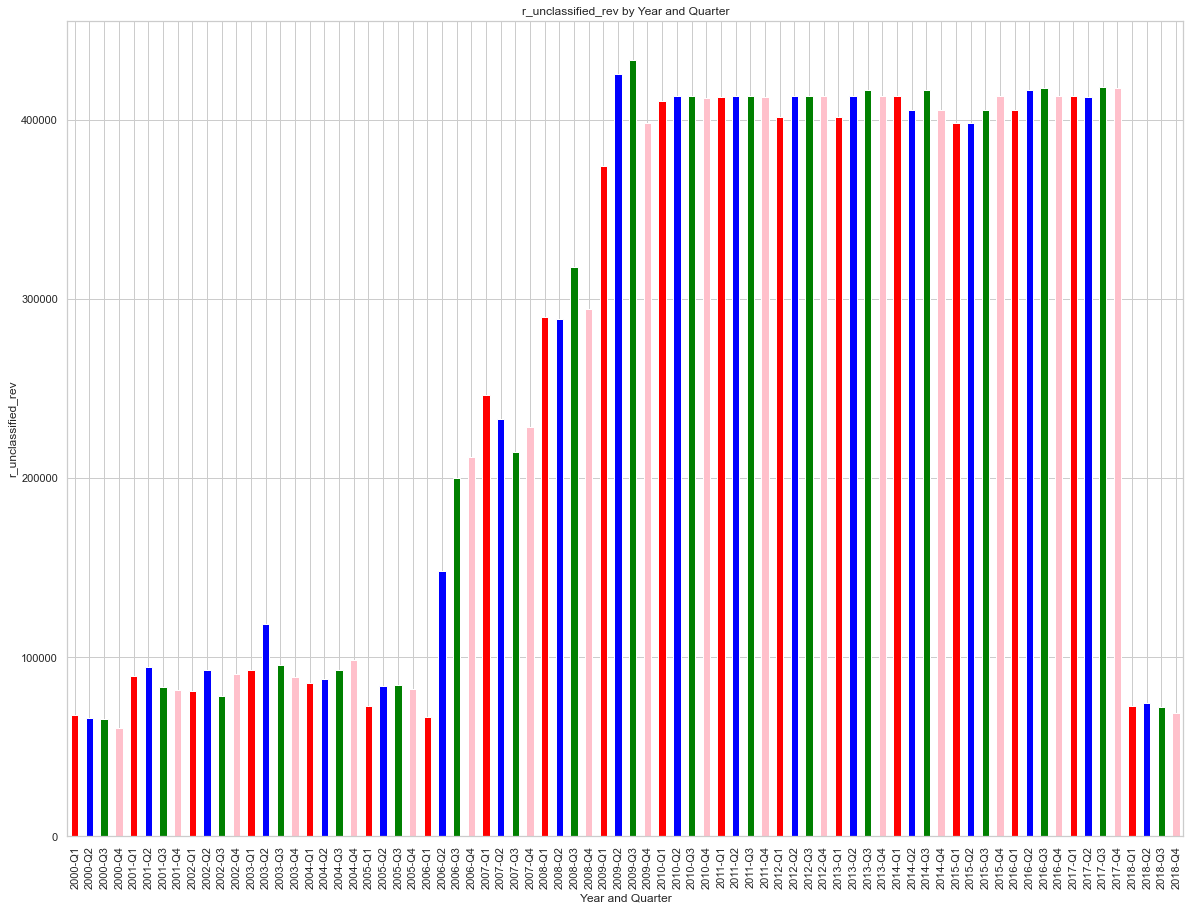

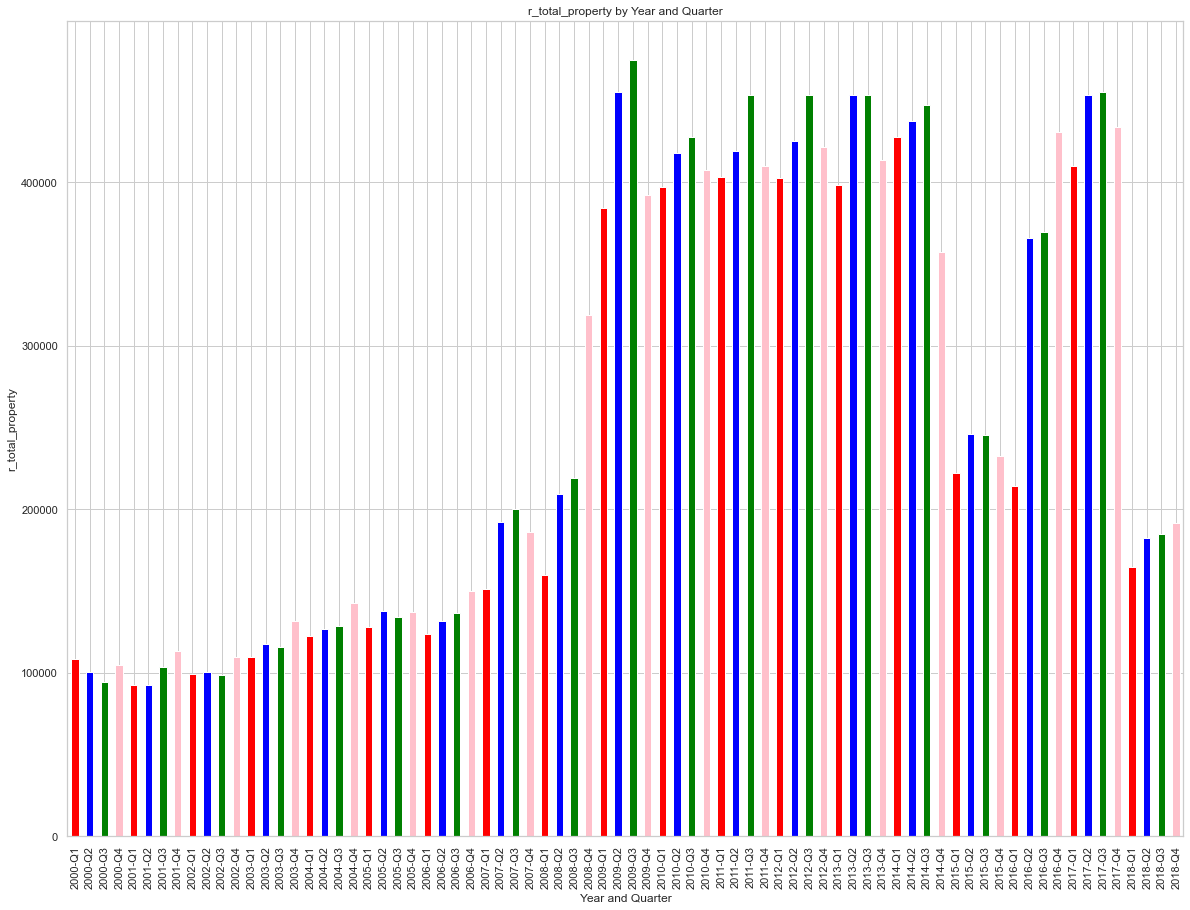

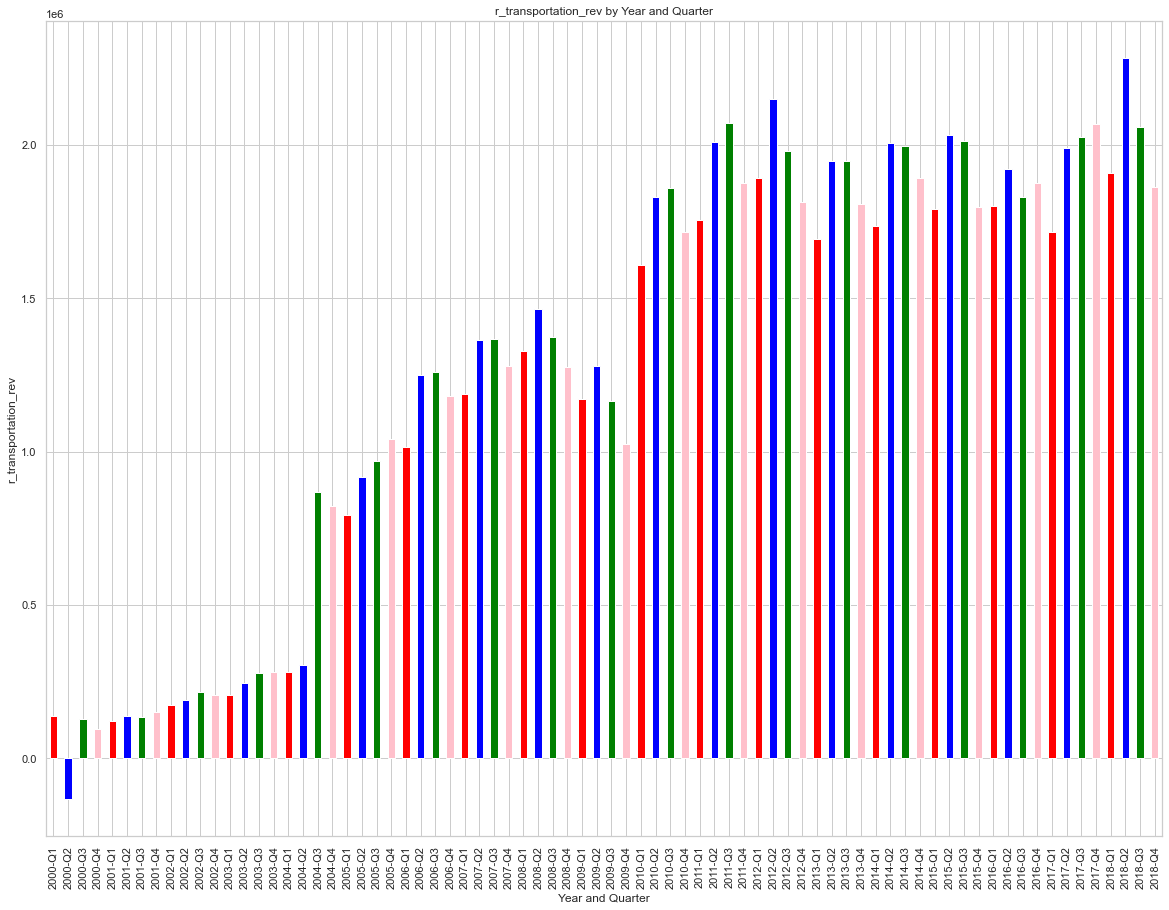

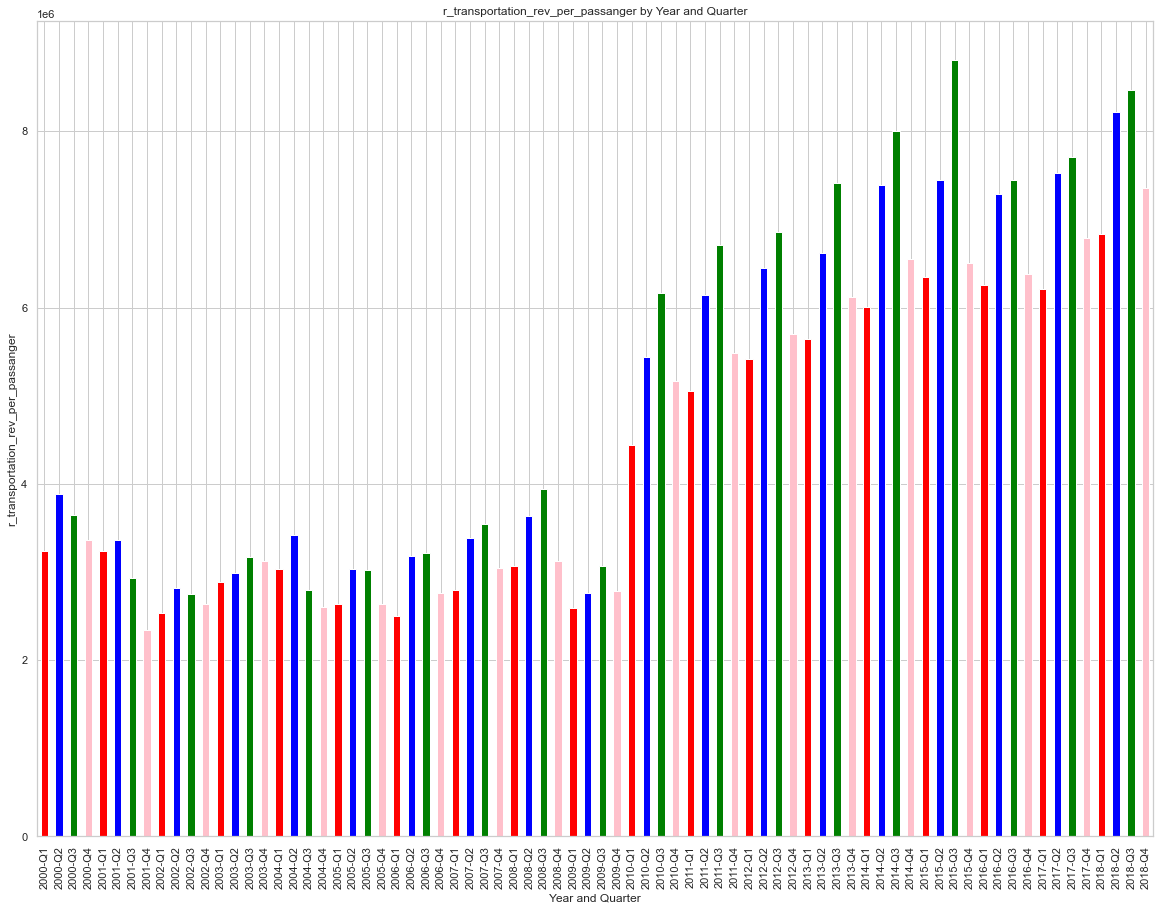

In [27]:
delta['Year'] = delta['Date'].dt.year
delta['YearQuarter'] = delta['Year'].astype(str) + '-Q' + delta['Quarter'].astype(str)

delta.set_index('YearQuarter', inplace=True)

quarter_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'pink'}

columns = ['r_miscellaneous_operating_rev', 'r_property_baggage', 'r_property_freight', 'r_cancelling_fees', 'r_total_charter', 'r_unclassified_rev', 'r_total_property', 'r_transportation_rev', 'r_transportation_rev_per_passanger']

for column in columns:
    bar_colors = [quarter_colors[q] for q in delta['Quarter']]

    plt.figure(figsize=(20, 15))
    delta[column].plot(kind='bar', title=f'{column} by Year and Quarter', color=bar_colors)
    plt.xlabel('Year and Quarter')
    plt.ylabel(column)

    plt.xticks(range(len(delta.index)), delta.index, rotation=90)

    plt.show()


Based on the available data, it can be observed that the revenues for Q1 and Q4 are generally lower when compared to Q2 and Q3, with the exception of the 'r_total_charter' variable. However, it is important to note that the 'r_total_charter' column was calculated using the Random Forest Regressor technique, and thus, the accuracy of the conclusions drawn from this variable alone may be limited. To obtain a more comprehensive understanding of the revenue trends, it is necessary to analyze the other revenue variables and evaluate their patterns and trends over time.

Furthermore, our analysis of expenses revealed that the costs for Q2 and Q3 are higher than those for Q1 and Q4, which suggests that these two quarters are typically the peak seasons for air travel. When we combine this information with our findings on revenue trends, it can be concluded that the business operates on a seasonal basis, with Q2 and Q3 being the most profitable periods due to increased air travel.

# Comparison (Profit/Loss, revenues and expenses)

In [28]:
grouped_data = delta.groupby('Year')[['overall_revenues', 'overall_expenses', 'profit_loss']].sum().reset_index()

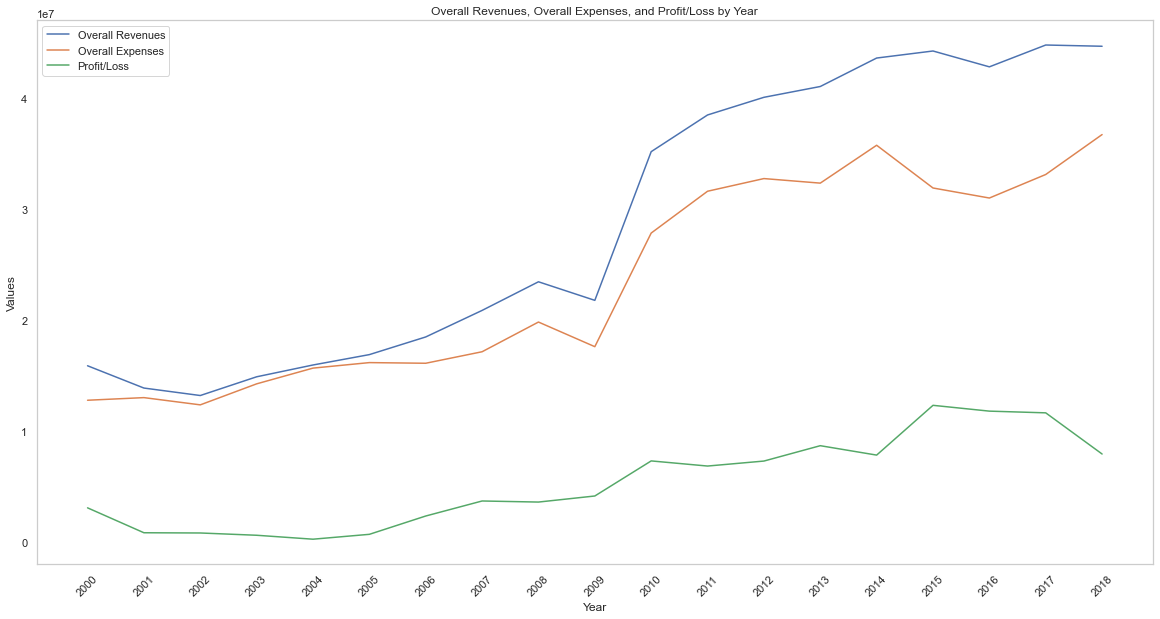

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(grouped_data['Year'], grouped_data['overall_revenues'], label='Overall Revenues')
plt.plot(grouped_data['Year'], grouped_data['overall_expenses'], label='Overall Expenses')
plt.plot(grouped_data['Year'], grouped_data['profit_loss'], label='Profit/Loss')
plt.xticks(grouped_data['Year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Overall Revenues, Overall Expenses, and Profit/Loss by Year')
plt.legend()
plt.grid()
plt.show()

As per the provided information, it appears that the Profit/Loss ratio has been declining due to a noticeable increase in expenses coupled with a slight decrease in revenues. In order to gain a deeper understanding of this trend, we will need to investigate which expenses are contributing the most to this increase and identify when this change occurred. By doing so, we can gain valuable insights into the factors driving this trend and formulate appropriate strategies to address this issue.

# Deep analysis 

## Revenue

## Expenses

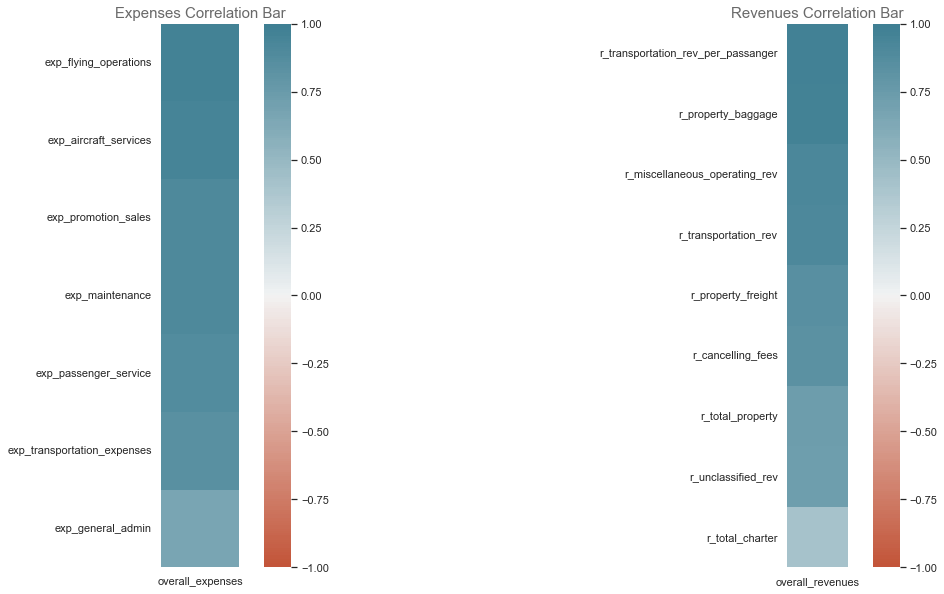

In [30]:
corr = delta.corr()

expenses_corr = corr[["overall_expenses"]]
expenses_corr = expenses_corr.sort_values(by=["overall_expenses"], ascending=False)

revenues_corr = corr[["overall_revenues"]]
revenues_corr = revenues_corr.sort_values(by=["overall_revenues"], ascending=False)

expenses_corr = expenses_corr[expenses_corr.index.str.startswith("exp_")]
revenues_corr = revenues_corr[revenues_corr.index.str.startswith("r_")]

plt.figure(figsize=(20, 10))

ax = plt.subplot(121)
ax = sns.heatmap(
    expenses_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_title("Expenses Correlation Bar", fontsize=15, color='dimgrey')

ax1 = plt.subplot(122)
ax1 = sns.heatmap(
    revenues_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax1.set_title("Revenues Correlation Bar", fontsize=15, color='dimgrey')

plt.show()


An analysis of the data has revealed the expense-related columns that exhibit the strongest correlation with the overall expenses and revenue. By identifying the most significant expense/revenue drivers, we can gain valuable insights that can help to optimize cost reduction strategies and forecast future expenses. Additionally, by analyzing the data from a revenue perspective, we can identify the areas that generate the highest revenues and focus on optimizing them further. This information can be used to formulate effective revenue and cost optimization strategies, enabling the company to maximize its financial performance.

Furthermore, this analysis highlights the categories that require additional attention. In terms of expenses, we need to find ways to reduce costs in categories such as:

* Flying operations
* Aircraft Services
* Promotion sales

In contrast, the following categories have been found to generate the highest revenue for the company, and therefore require further investment:

* Transportation revenue per passenger
* Property baggage
* Miscellaneous operating revenue
* Transportation


The next graph presents the percentage breakdown for each category, in terms of both expenses and revenue:

(-1.144363063083953,
 1.1053160647028817,
 -1.1122031929391438,
 1.2098595113301973)

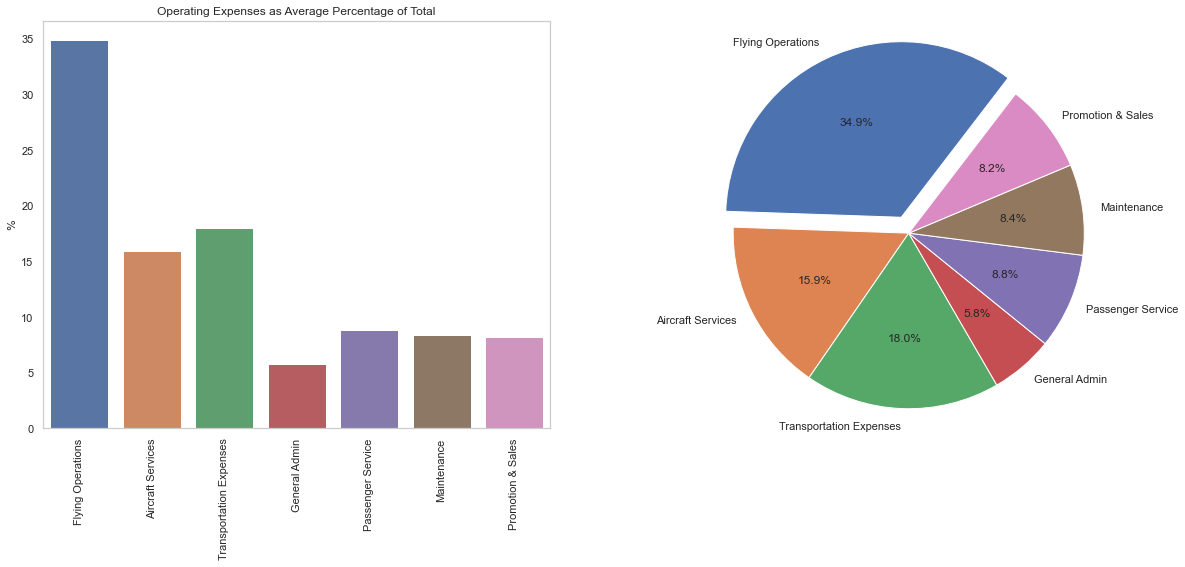

In [31]:
plt.figure(figsize=(20, 7.5))

ax1 = plt.subplot(121)

total = delta["overall_expenses"]

flying_operations_perc = np.mean((delta["exp_flying_operations"] / total) * 100)
aircraft_services_perc = np.mean((delta["exp_aircraft_services"] / total) * 100)
transportation_expenses_perc = np.mean((delta["exp_transportation_expenses"] / total) * 100)
general_admin_perc = np.mean((delta["exp_general_admin"] / total) * 100)
passenger_service_perc = np.mean((delta["exp_passenger_service"] / total) * 100)
maintenance_perc = np.mean((delta["exp_maintenance"] / total) * 100)
promotion_sales_perc = np.mean((delta["exp_promotion_sales"] / total) * 100)

expense_percentages = [flying_operations_perc, aircraft_services_perc, transportation_expenses_perc, general_admin_perc, passenger_service_perc, maintenance_perc, promotion_sales_perc]

labels = ["Flying Operations", "Aircraft Services", "Transportation Expenses", "General Admin", "Passenger Service", "Maintenance", "Promotion & Sales"]
ax1 = sns.barplot(x=labels, y=expense_percentages)

plt.grid(axis='y')
plt.title("Operating Expenses as Average Percentage of Total")
plt.ylabel("%")
plt.xticks(rotation=90)

ax2 = plt.subplot(122)

explode = (0.1, 0, 0, 0, 0, 0, 0)

wedges, texts, autotexts = plt.pie(expense_percentages, explode=explode, labels=labels, startangle=52.5, autopct='%1.1f%%')

plt.axis('equal')



(-1.106239990769655,
 1.102219497523291,
 -1.1143067474822308,
 1.2106516634486635)

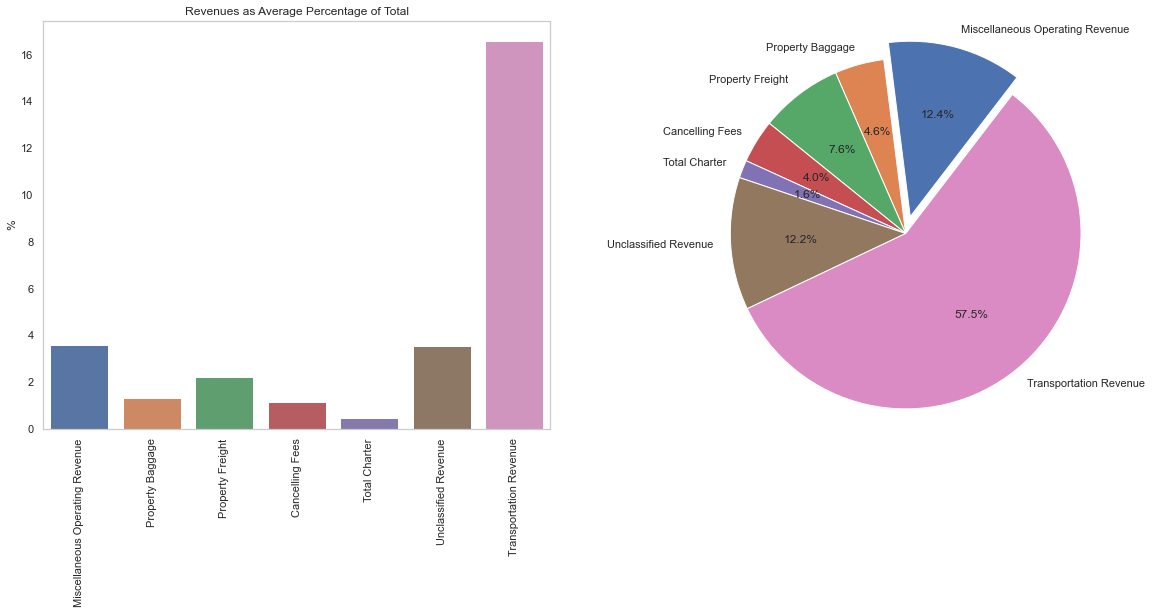

In [32]:
plt.figure(figsize=(20, 7.5))

ax1 = plt.subplot(121)

total = delta["overall_revenues"]

miscellaneous_operating_rev_perc = np.mean((delta["r_miscellaneous_operating_rev"] / total) * 100)
property_baggage_perc = np.mean((delta["r_property_baggage"] / total) * 100)
property_freight_perc = np.mean((delta["r_property_freight"] / total) * 100)
cancelling_fees_perc = np.mean((delta["r_cancelling_fees"] / total) * 100)
total_charter_perc = np.mean((delta["r_total_charter"] / total) * 100)
unclassified_rev_perc = np.mean((delta["r_unclassified_rev"] / total) * 100)
transportation_rev_perc = np.mean((delta["r_transportation_rev"] / total) * 100)

revenue_percentages = [miscellaneous_operating_rev_perc, property_baggage_perc, property_freight_perc, cancelling_fees_perc, total_charter_perc, unclassified_rev_perc, transportation_rev_perc]

labels = ["Miscellaneous Operating Revenue", "Property Baggage", "Property Freight", "Cancelling Fees", "Total Charter", "Unclassified Revenue", "Transportation Revenue"]
ax1 = sns.barplot(x=labels, y=revenue_percentages)

plt.grid(axis='y')
plt.title("Revenues as Average Percentage of Total")
plt.ylabel("%")
plt.xticks(rotation=90)

ax2 = plt.subplot(122)

explode = (0.1, 0, 0, 0, 0, 0, 0)

wedges, texts, autotexts = plt.pie(revenue_percentages, explode=explode, labels=labels, startangle=52.5, autopct='%1.1f%%')

plt.axis('equal')


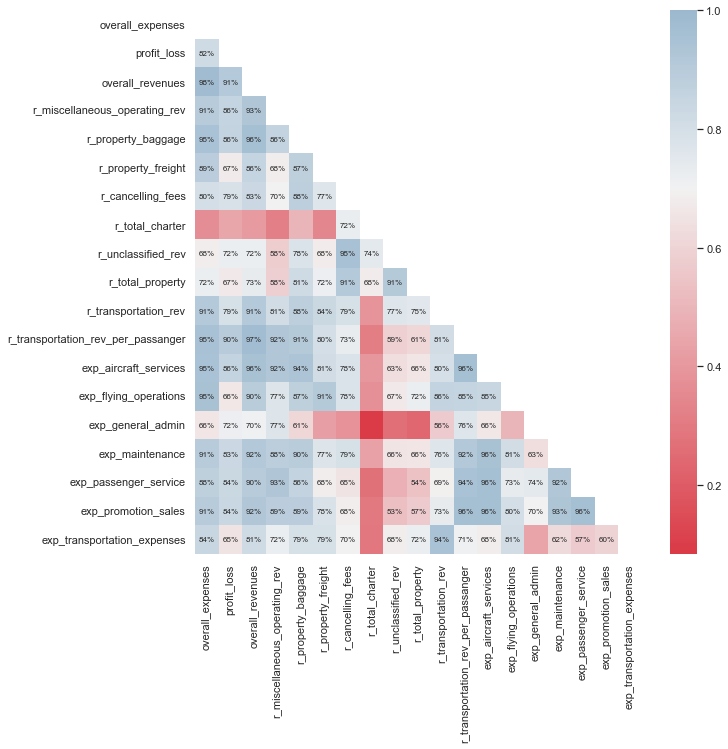

Top 10 strongest correlations:
overall_expenses and overall_revenues: 98.11%
r_transportation_rev_per_passanger and overall_revenues: 97.48%
exp_aircraft_services and exp_promotion_sales: 96.26%
r_transportation_rev_per_passanger and exp_aircraft_services: 96.24%
exp_passenger_service and exp_promotion_sales: 96.00%
overall_revenues and r_property_baggage: 95.84%
r_transportation_rev_per_passanger and exp_promotion_sales: 95.82%
exp_passenger_service and exp_aircraft_services: 95.74%
exp_aircraft_services and overall_revenues: 95.63%
exp_aircraft_services and exp_maintenance: 95.56%


In [33]:
column_names_selected = [col for col in delta.columns if col not in ['Airline', 'Date', 'Quarter', 'Year']]

corr = delta[column_names_selected].corr()

plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(10, 240, as_cmap=True, center='light')

ax = sns.heatmap(
    corr,
    mask=mask,
    vmax=1, center=0.7,
    cmap=cmap,
    annot=True, fmt=".2f", annot_kws={"size": 8},
)

for text in ax.texts:
    text.set_size(8)
    if float(text.get_text()) > 0.5:
        text.set_text(f"{float(text.get_text()) * 100:.0f}%")
    else:
        text.set_text("")

plt.show()

# Find the top 6 strongest correlations
corr_unstacked = corr.unstack().sort_values(ascending=False, key=lambda x: np.abs(x))
top_correlations = corr_unstacked[corr_unstacked != 1].drop_duplicates().head(10)

# Print the top 6 strongest correlations
print("Top 10 strongest correlations:")
for idx, value in top_correlations.iteritems():
    print(f"{idx[0]} and {idx[1]}: {value * 100:.2f}%")


After calculating the correlations between all variables, we identified the 10 strongest correlations in the dataset. By focusing on the categories with the highest correlation values, we can gain insights that can help to optimize cost reduction strategies and maximize the Profit/Loss ratio.

For example, based on our analysis, we could consider working on the following categories to improve profitability:

* exp_aircraft_service
* exp_promotion_sales
* exp_passenger_service

By targeting these areas and implementing effective cost optimization strategies, we can work towards achieving a higher Profit/Loss ratio for the company.


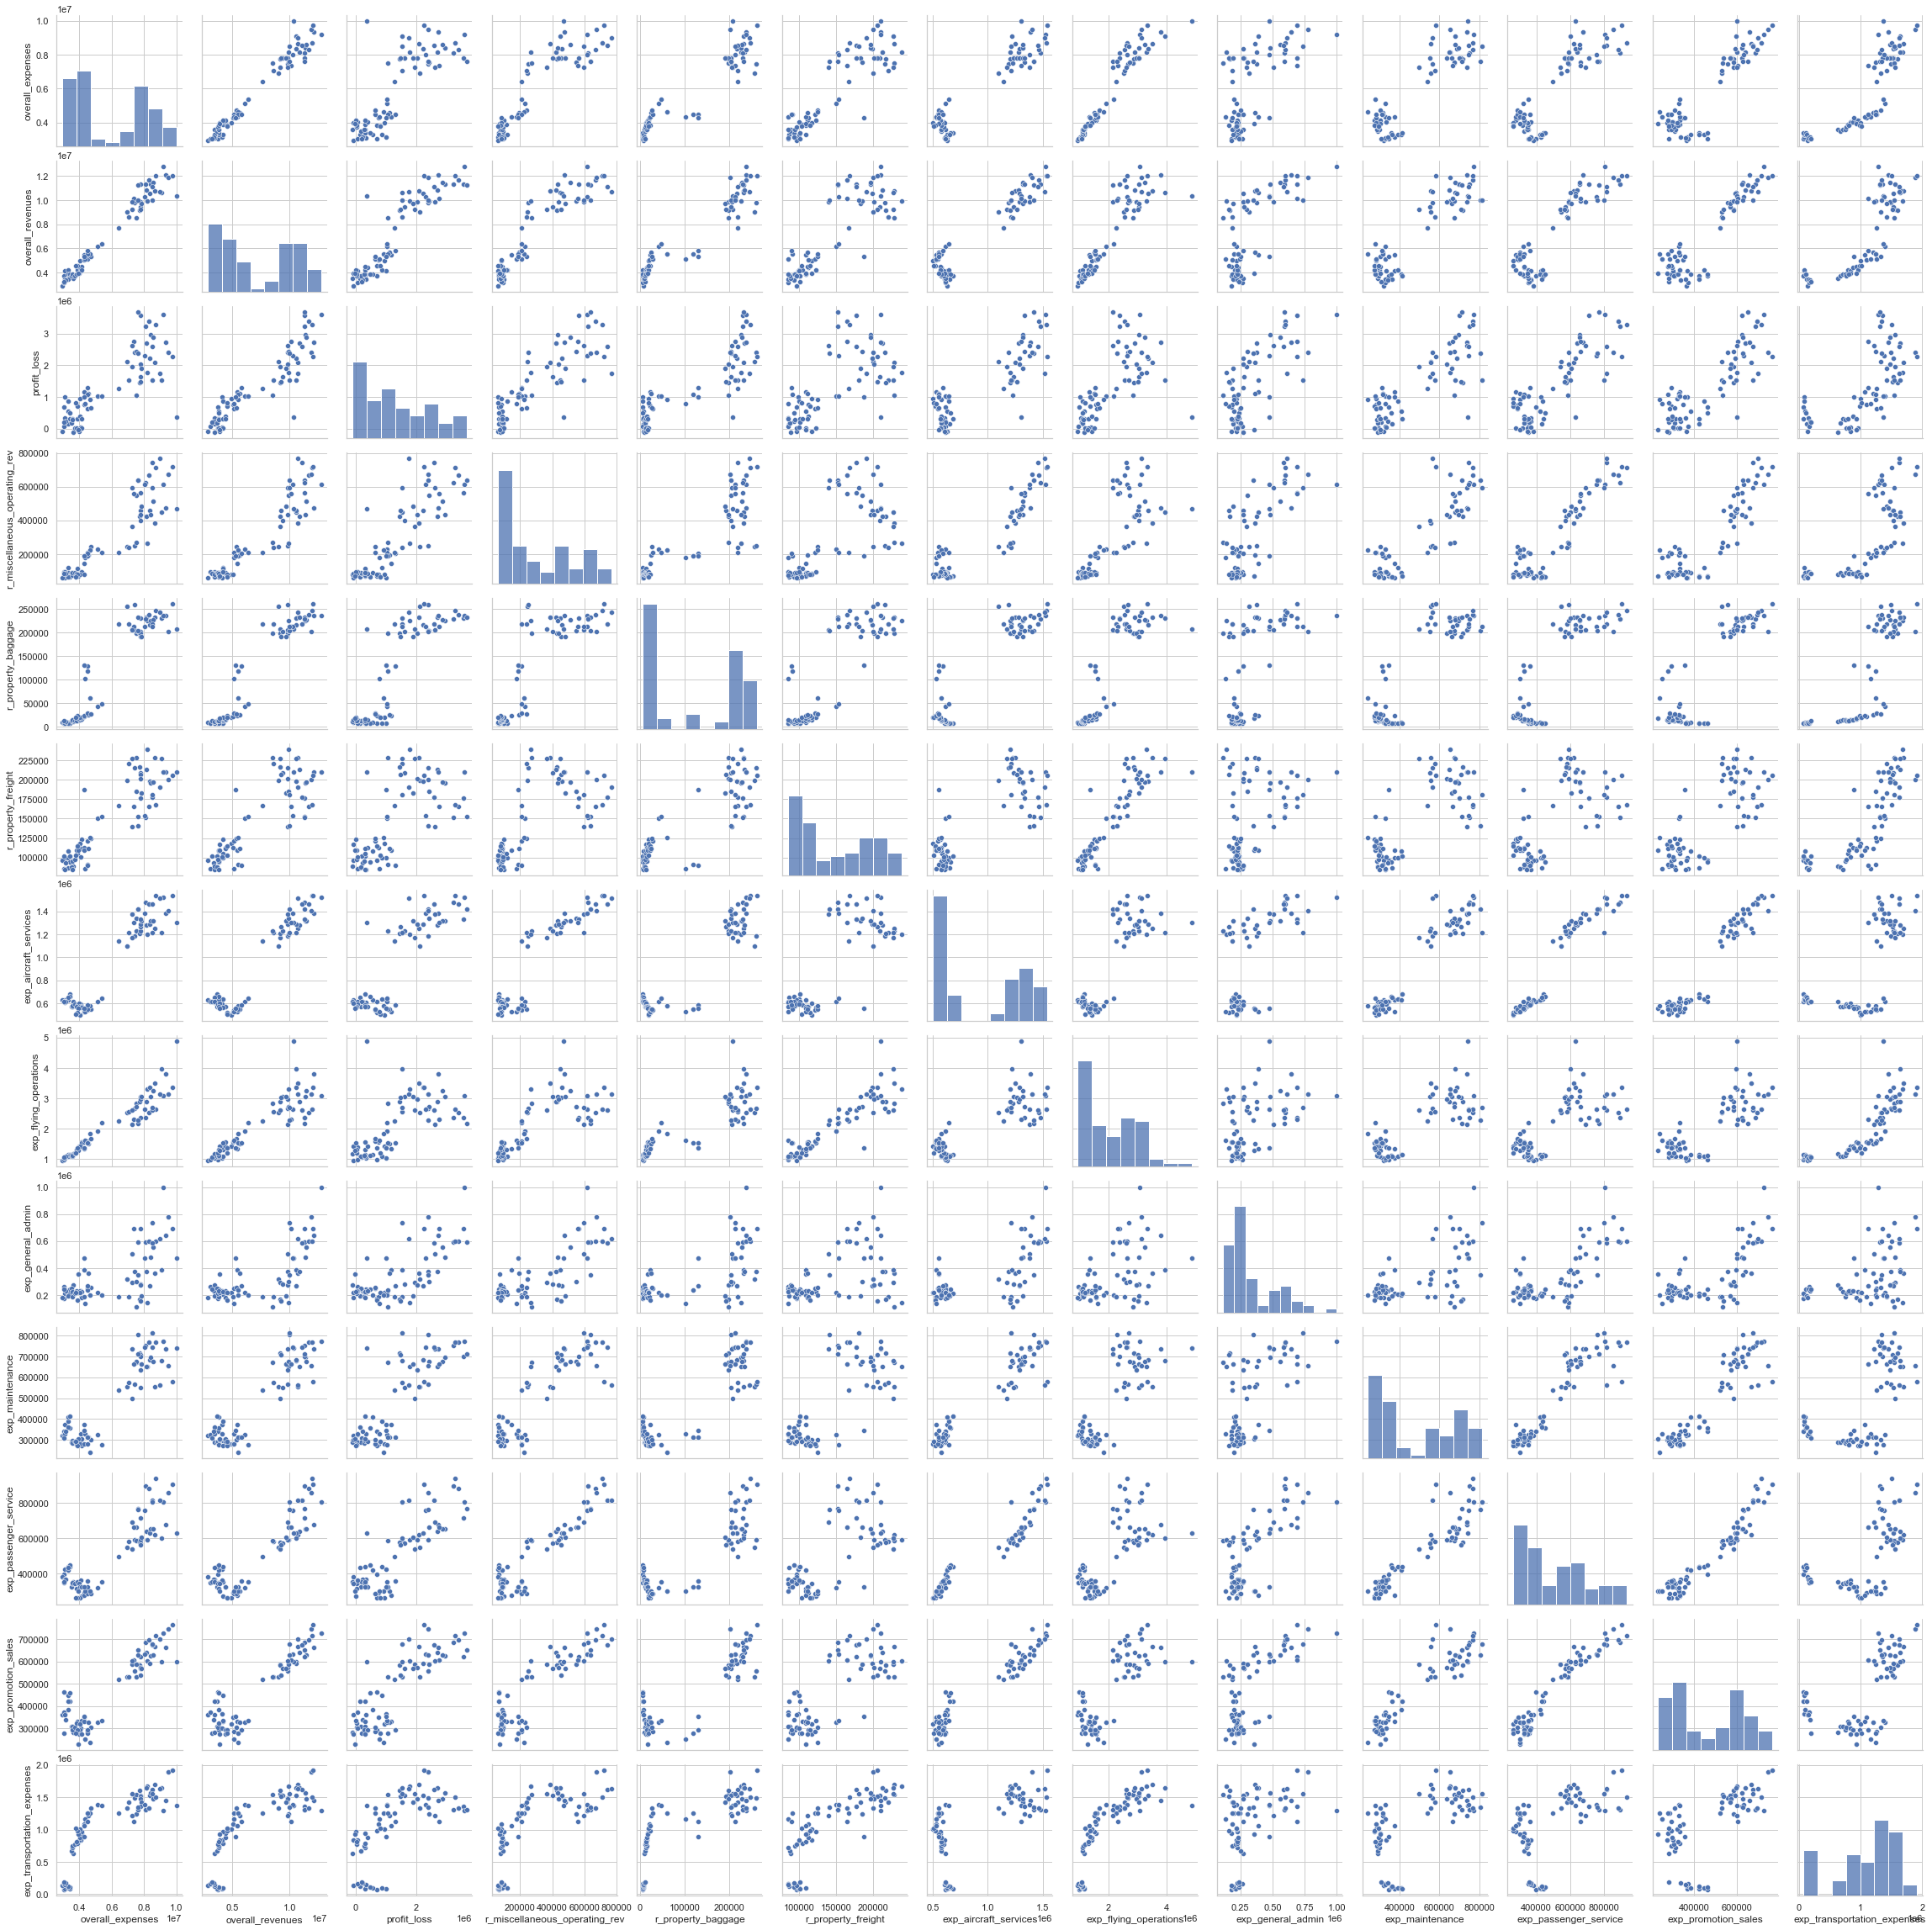

In [34]:
selected_columns = ['overall_expenses','overall_revenues','profit_loss','r_miscellaneous_operating_rev','r_property_baggage','r_property_freight','exp_aircraft_services','exp_flying_operations','exp_general_admin','exp_maintenance','exp_passenger_service','exp_promotion_sales','exp_transportation_expenses']

selected_data = delta[selected_columns]

sns.pairplot(selected_data)
plt.show()

## EDA

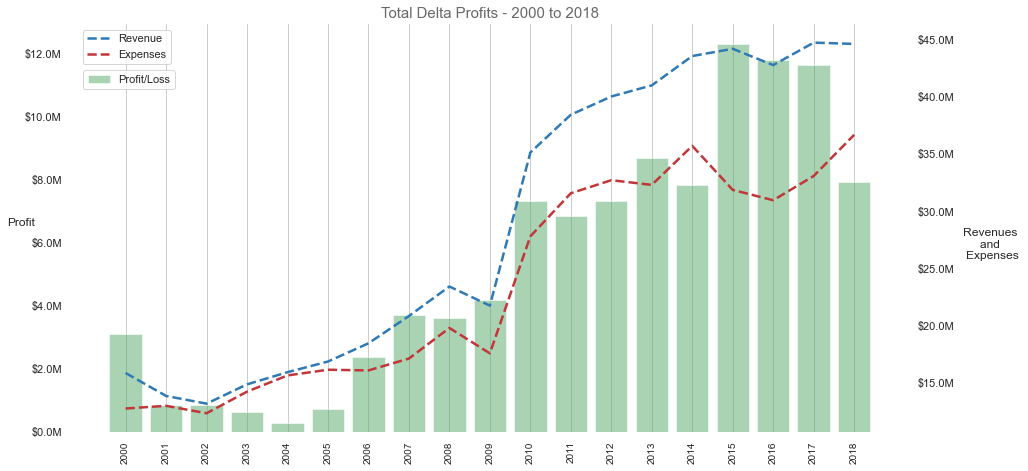

In [35]:
def millions(x, pos):
    return '$%1.1fM' % (x*1e-6)
formatter = FuncFormatter(millions)

plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot(111)

Year = delta['Year'].unique()

ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)

ax2 = ax1.twinx()

ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)

ax1.xaxis.set_tick_params(labelsize=10, rotation=90)
ax1.xaxis.set_ticks(Year)

ax1.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
ax2.tick_params(right=False)

ax1.set_ylabel("Profit", fontsize=12, rotation=0)
ax2.set_ylabel("Revenues \nand \nExpenses", fontsize=12, rotation=0)
ax2.yaxis.set_label_coords(1.1, 0.5)

yearly_data = delta.groupby('Year').sum()

ax1.bar(Year, yearly_data["profit_loss"], label="Profit/Loss", alpha=0.5, color=(yearly_data["profit_loss"] > 0).map({True: 'g', False: 'r'}))
ax2.plot(yearly_data["overall_revenues"], label="Revenue", color=sns.color_palette("RdBu")[-1], ls="--", lw=2.5)
ax2.plot(yearly_data["overall_expenses"], label="Expenses", color=sns.color_palette("RdBu")[0], ls="--", lw=2.5)

ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

ax1.legend(bbox_to_anchor=(0.13, 0.9))
ax2.legend(bbox_to_anchor=(0.125, 1))
ax1.grid(False)
ax2.grid(False)
ax1.xaxis.grid(which="major")

title_font = {'family': 'sans-serif', 'color': 'dimgrey', 'weight': 'normal', 'size': 15}
plt.title("Total Delta Profits - 2000 to 2018", loc='center', fontdict=title_font, fontsize=15)
plt.show()


Following our exploratory data analysis (EDA), we can confirm that cost reduction measures are necessary to improve the Profit/Loss ratio. Our analysis has identified areas where cost reduction efforts could be targeted, including categories such as overall expenses, flying operations, aircraft services, and miscellaneous operating revenue. By implementing effective cost optimization strategies in these areas, we can work towards achieving a higher Profit/Loss ratio for the company.

Moreover, our analysis has also revealed opportunities for new business ventures within the company's existing structure. For example, there may be potential for offering mailing or pet transportation services. Exploring these opportunities further could help to diversify the company's revenue streams and improve overall financial performance.

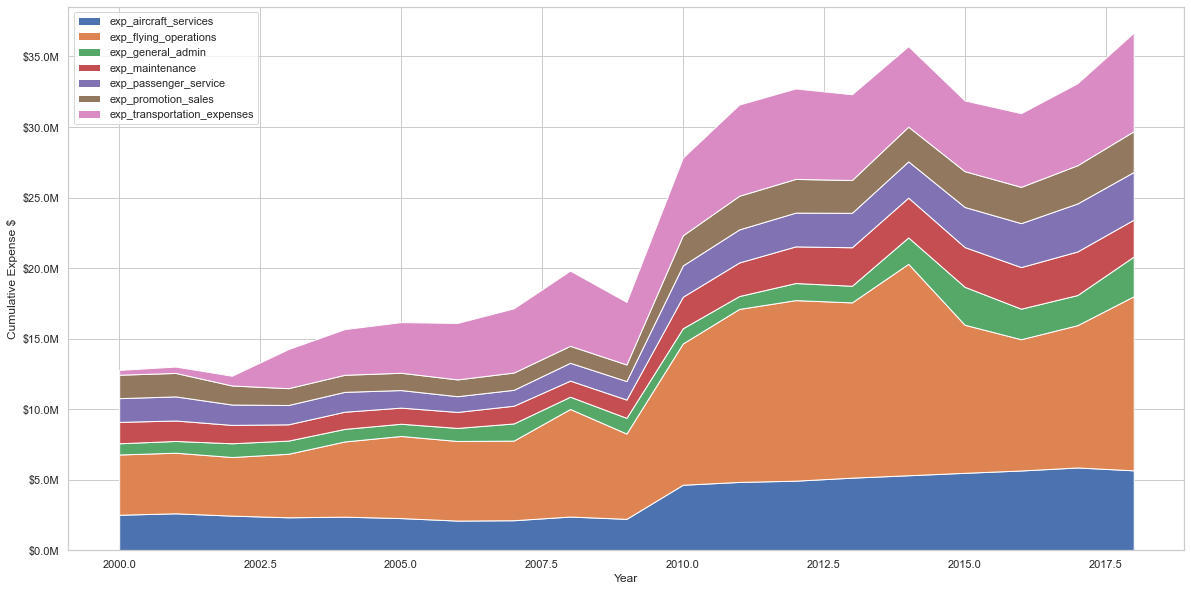

In [36]:
expenses_columns = [
    'exp_aircraft_services',
    'exp_flying_operations',
    'exp_general_admin',
    'exp_maintenance',
    'exp_passenger_service',
    'exp_promotion_sales',
    'exp_transportation_expenses'
]

grouped_expenses = delta.groupby('Year')[expenses_columns].sum().reset_index()
labels = expenses_columns

plt.figure(figsize=(20, 10))
ax = plt.subplot(111)

ax.stackplot(grouped_expenses['Year'], *grouped_expenses[expenses_columns].T.values, labels=labels)

ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel("Cumulative Expense $")
ax.set_xlabel("Year")

plt.legend(loc="upper left");


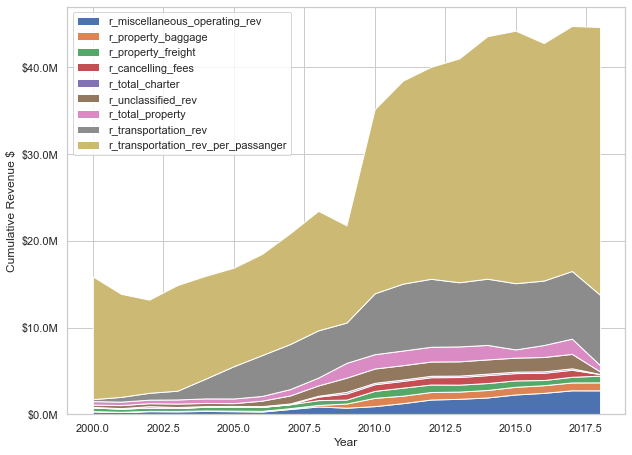

In [37]:
revenue_columns = [
    'r_miscellaneous_operating_rev',
    'r_property_baggage',
    'r_property_freight',
    'r_cancelling_fees',
    'r_total_charter',
    'r_unclassified_rev',
    'r_total_property',
    'r_transportation_rev',
    'r_transportation_rev_per_passanger'
]

grouped_revenues = delta.groupby('Year')[revenue_columns].sum().reset_index()
labels = revenue_columns

plt.figure(figsize=(10, 7.5))
ax = plt.subplot(111)

ax.stackplot(grouped_revenues['Year'], *grouped_revenues[revenue_columns].T.values, labels=labels)

ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel("Cumulative Revenue $")
ax.set_xlabel("Year")

plt.legend(loc="upper left");


# Operating Margin

As part of our analysis, we will calculate the operating margin for each airline and compare it to our Profit/Loss ratio. By calculating the operating margin, we can gain insights into how efficiently each airline is generating profit and identify potential areas for improvement.

To calculate the operating margin, we will divide the operating income by the revenue. We will then compare these values to our Profit/Loss ratio and analyze any discrepancies or trends that emerge. This information will be valuable in helping us identify the airlines that are performing well and those that may require additional attention in terms of cost optimization or revenue generation strategies.

In [38]:
df['operating_margin'] = ((df['overall_revenues'] - df['overall_expenses']) / df['overall_revenues']) * 100

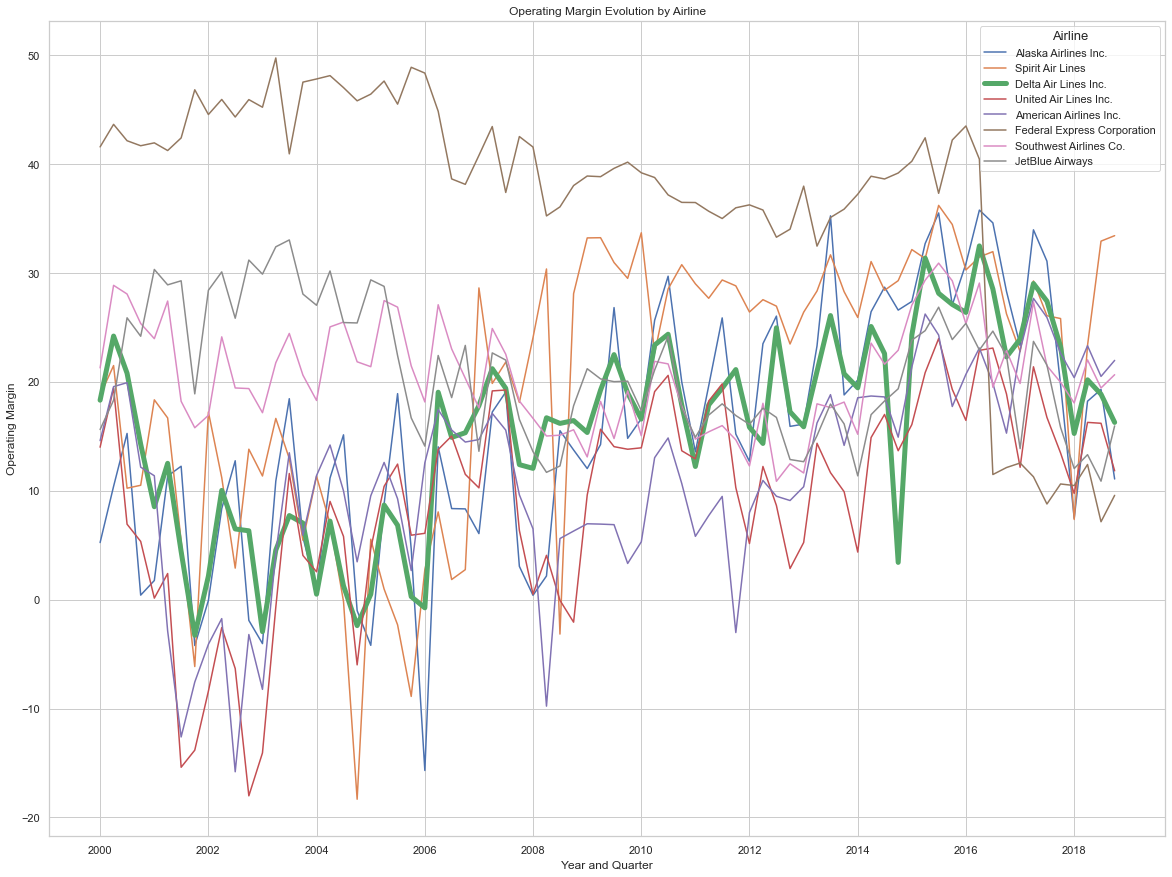

In [39]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(20, 15))

for airline in df['Airline'].unique():
    airline_df = df[df['Airline'] == airline]
    if airline == 'Delta Air Lines Inc.':
        sns.lineplot(x='Date', y='operating_margin', data=airline_df, label=airline, linewidth=5)
    else:
        sns.lineplot(x='Date', y='operating_margin', data=airline_df, label=airline)

plt.xlabel('Year and Quarter')
plt.ylabel('Operating Margin')
plt.title('Operating Margin Evolution by Airline')

plt.legend(title='Airline', title_fontsize='13', loc='upper right')

plt.show()


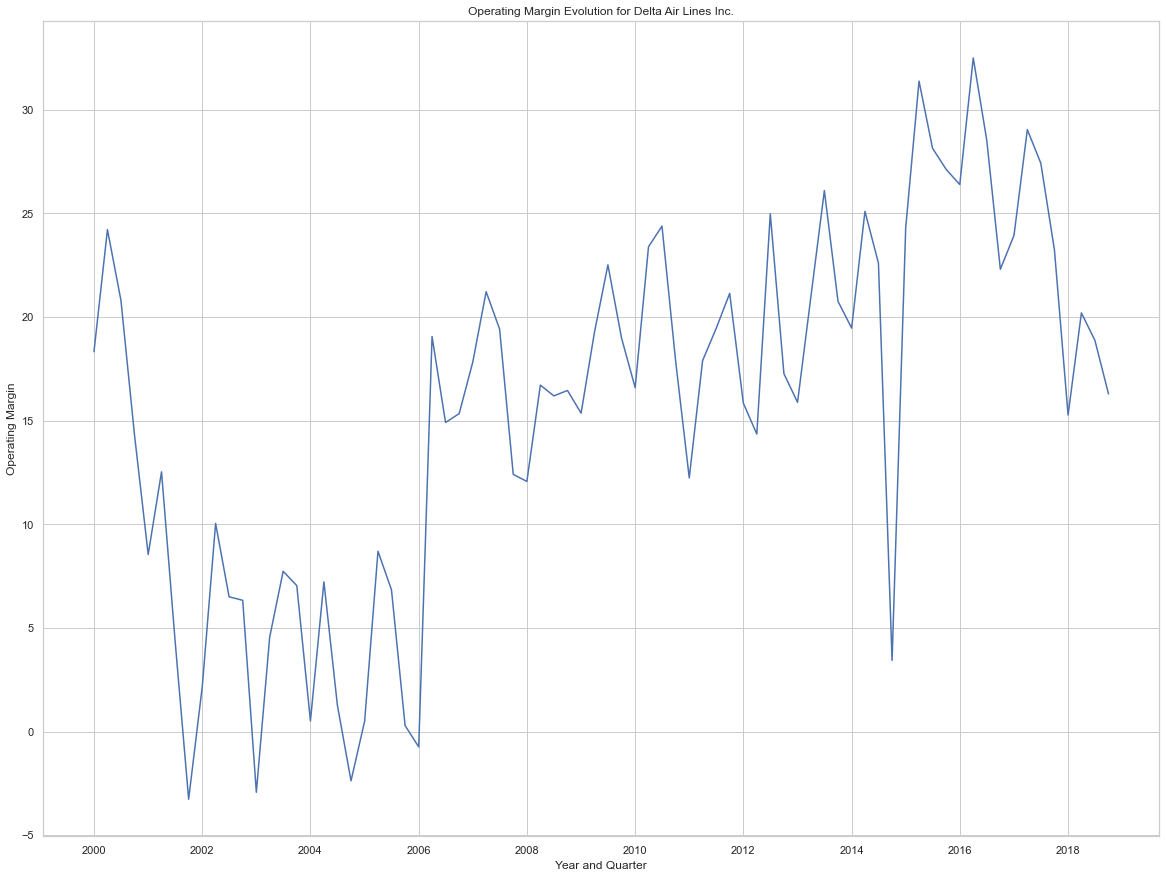

In [40]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataframe for Delta Air Lines Inc.
delta_df = df[df['Airline'] == 'Delta Air Lines Inc.']

plt.figure(figsize=(20, 15))
ax = sns.lineplot(x='Date', y='operating_margin', data=delta_df)

# Set axis labels and title
ax.set(xlabel='Year and Quarter', ylabel='Operating Margin', title='Operating Margin Evolution for Delta Air Lines Inc.')

plt.show()

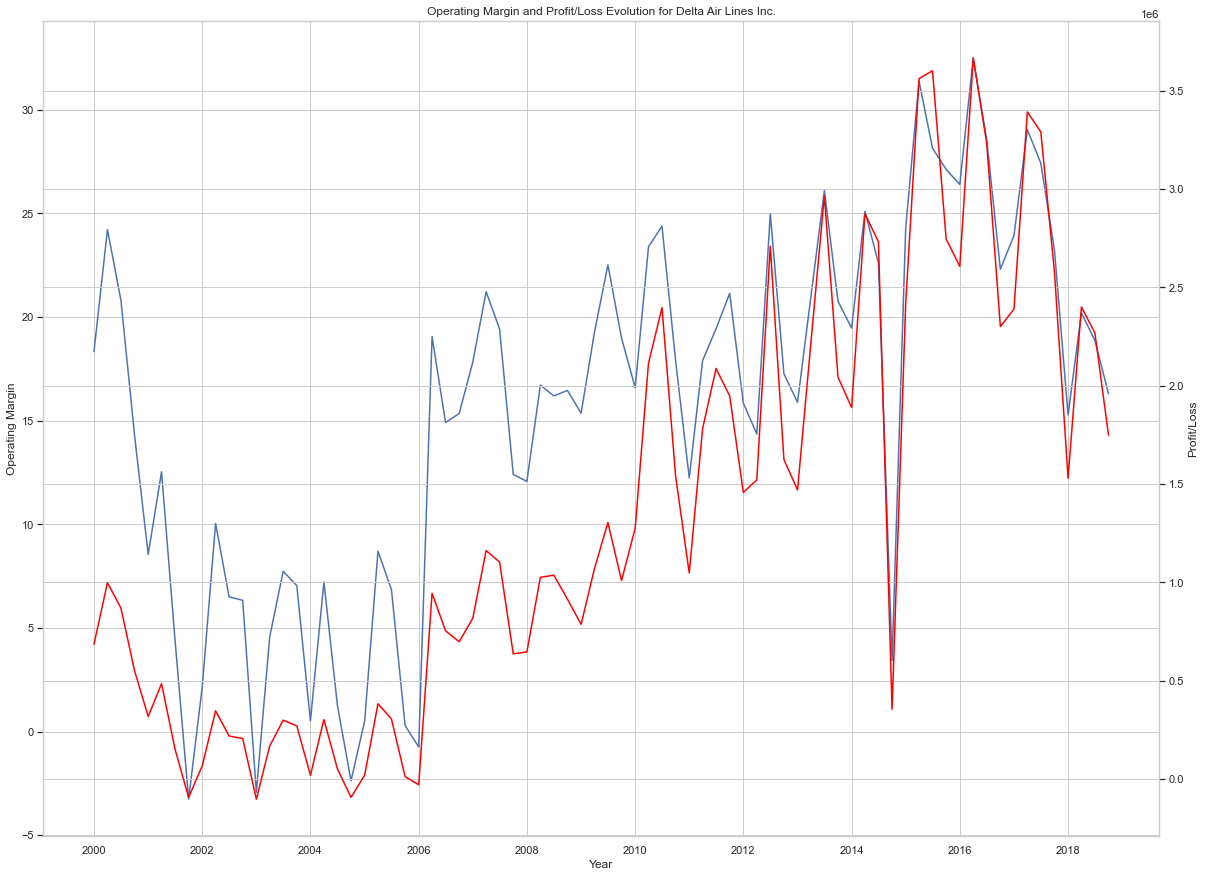

In [41]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataframe for Delta Air Lines Inc.
delta_df = df[df['Airline'] == 'Delta Air Lines Inc.']

plt.figure(figsize=(20, 15))

# Create the left-hand y-axis for the operating margin
ax = sns.lineplot(x='Date', y='operating_margin', data=delta_df)

# Set axis labels and title for the left-hand y-axis
ax.set(xlabel='Year', ylabel='Operating Margin', title='Operating Margin and Profit/Loss Evolution for Delta Air Lines Inc.')

# Create the right-hand y-axis for the profit_loss
ax2 = ax.twinx()
sns.lineplot(x='Date', y='profit_loss', data=delta_df, color='red', ax=ax2)

# Set axis labels and title for the right-hand y-axis
ax2.set(ylabel='Profit/Loss')

plt.show()


Our analysis of the operating margins has revealed a significant difference when compared to the Profit/Loss ratio. This disparity is particularly noticeable during the period from 2006 to 2010. Upon further investigation, we found that this period coincided with the global economic crisis, which was triggered by the collapse of the US real estate market.

This information highlights the importance of taking into account external factors that may impact financial performance when analyzing company data. It also underscores the value of conducting a comprehensive analysis that incorporates a variety of metrics and data points to gain a more complete understanding of the factors that influence financial performance.

Interestingly, during the same period from 2006 to 2010, we observed that Spirit Airlines was able to increase its operating margin from 20% to 30%. This finding suggests that there may be lessons that can be learned from Spirit's experience that could help Delta Airlines improve its financial performance.

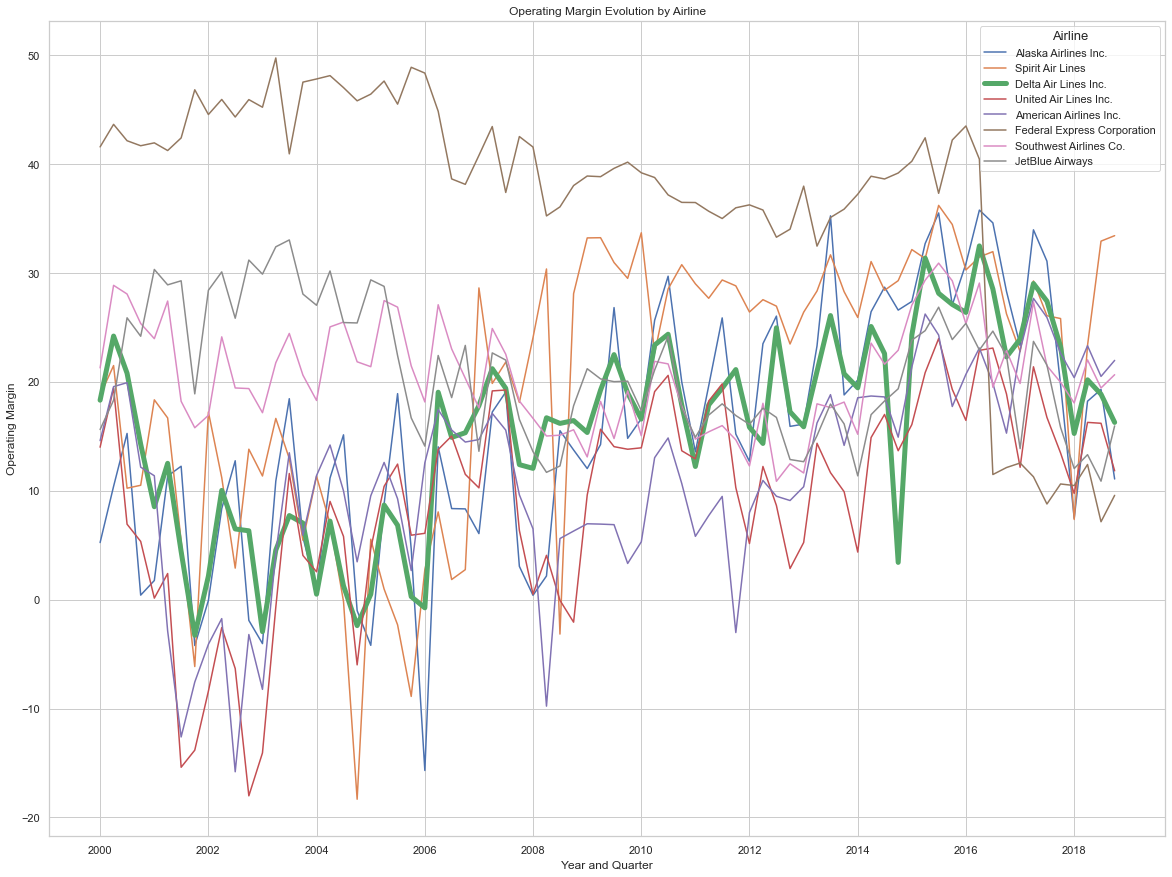

In [42]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(20, 15))

for airline in df['Airline'].unique():
    airline_df = df[df['Airline'] == airline]
    if airline == 'Delta Air Lines Inc.':
        sns.lineplot(x='Date', y='operating_margin', data=airline_df, label=airline, linewidth=5)
    else:
        sns.lineplot(x='Date', y='operating_margin', data=airline_df, label=airline)

plt.xlabel('Year and Quarter')
plt.ylabel('Operating Margin')
plt.title('Operating Margin Evolution by Airline')

plt.legend(title='Airline', title_fontsize='13', loc='upper right')

plt.show()


# Revenue per category

In [43]:
grouped_df = df.groupby(['Airline', 'Year']).sum().reset_index()

for col in grouped_df.columns:
    if col.startswith('r_'):
        new_col = col + '_ratio'
        grouped_df[new_col] = grouped_df[col] / grouped_df['overall_revenues'] * 100

columns_to_keep = ['Airline', 'Year']
for col in grouped_df.columns:
    if col.endswith('_ratio'):
        grouped_df[col] = grouped_df[col].apply(lambda x: f"{x:.3f}%")
        columns_to_keep.append(col)

df_revenue_ratio = grouped_df[columns_to_keep]


In [44]:
df_revenue_ratio

Airline  Year r_miscellaneous_operating_rev_ratio  \
0     Alaska Airlines Inc.  2000                              0.111%   
1     Alaska Airlines Inc.  2001                              0.089%   
2     Alaska Airlines Inc.  2002                             -0.049%   
3     Alaska Airlines Inc.  2003                             -0.024%   
4     Alaska Airlines Inc.  2004                              0.371%   
..                     ...   ...                                 ...   
147  United Air Lines Inc.  2014                              0.185%   
148  United Air Lines Inc.  2015                              0.159%   
149  United Air Lines Inc.  2016                              0.067%   
150  United Air Lines Inc.  2017                              0.046%   
151  United Air Lines Inc.  2018                              0.030%   

    r_property_baggage_ratio r_property_freight_ratio r_cancelling_fees_ratio  \
0                     0.245%                   3.211%                  1.728%   
1                     0.317%                   3.044%                  1.658%   
2                     0.368%                   2.809%                  1.681%   
3                     0.426%                   2.702%                  1.587%   
4                     0.576%                   2.448%                  1.529%   
..                       ...                      ...                     ...   
147                   1.629%                   1.920%                  2.016%   
148                   1.742%                   2.029%                  1.791%   
149                   1.837%                   1.915%                  1.746%   
150                   2.072%                   2.288%                  1.417%   
151                   2.139%                   2.604%                  1.096%   

    r_total_charter_ratio r_unclassified_rev_ratio r_total_property_ratio  \
0                  0.135%                   1.839%                 3.457%   
1                  0.315%                   1.748%                 3.361%   
2                  0.258%                   1.633%                 3.177%   
3                  0.235%                   1.562%                 3.128%   
4                  0.230%                   1.900%                 3.024%   
..                    ...                      ...                    ...   
147                0.156%                   1.033%                 2.397%   
148                0.156%                   1.028%                 2.373%   
149                0.167%                   1.122%                 2.547%   
150                0.095%                   0.721%                 1.995%   
151                0.035%                   0.276%                 1.428%   

    r_transportation_rev_ratio r_transportation_rev_per_passanger_ratio  
0                       3.482%                                  85.792%  
1                       4.105%                                  85.363%  
2                       4.665%                                  85.458%  
3                       4.984%                                  85.401%  
4                       5.323%                                  84.600%  
..                         ...                                      ...  
147                    24.138%                                  66.526%  
148                    22.869%                                  67.854%  
149                    23.440%                                  67.159%  
150                    22.505%                                  68.861%  
151                    23.188%                                  69.205%  

[152 rows x 11 columns]

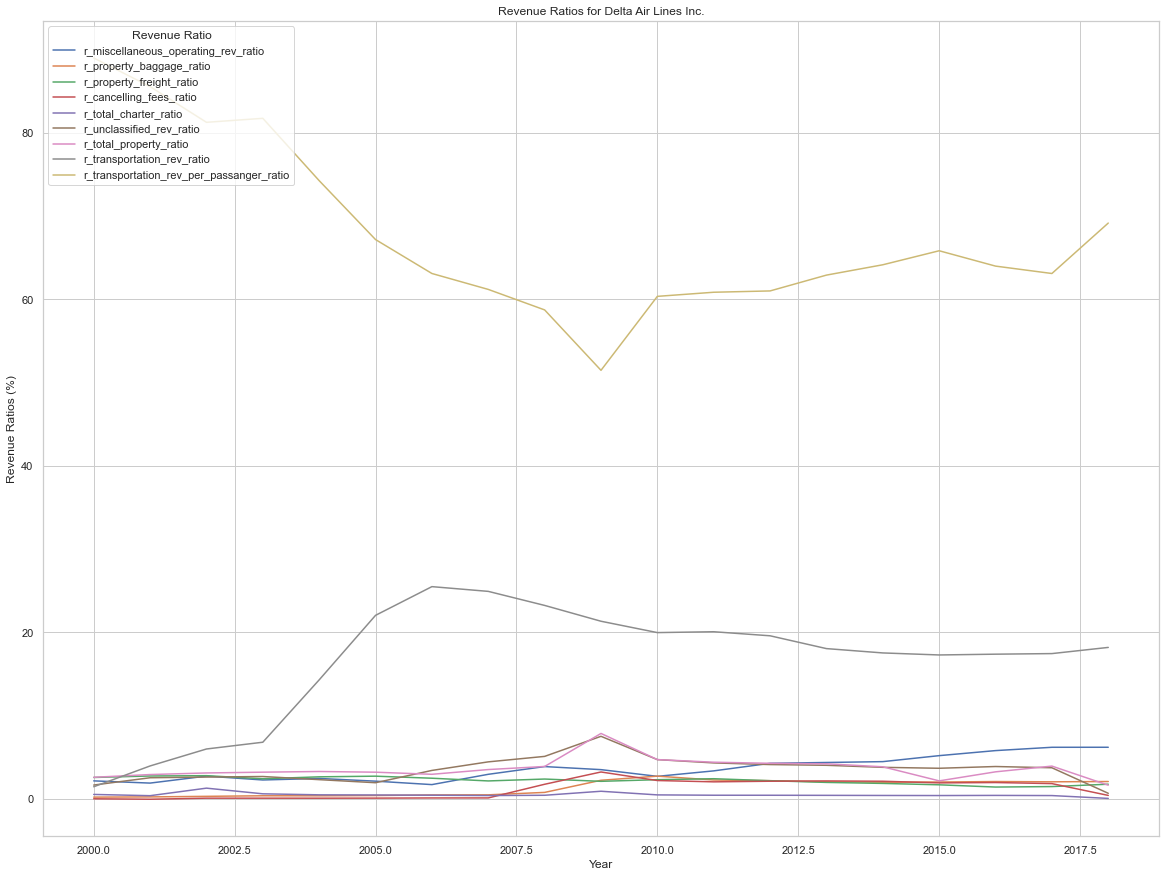

In [45]:
delta_df = df_revenue_ratio[df_revenue_ratio['Airline'] == 'Delta Air Lines Inc.']

r_columns = [col for col in delta_df.columns if col.startswith('r_')]
plot_df = delta_df[['Year'] + r_columns].set_index('Year')

plot_df = plot_df.applymap(lambda x: float(x.strip('%')))

ax = plot_df.plot(kind='line', figsize=(20, 15), title='Revenue Ratios for Delta Air Lines Inc.')

plt.xlabel('Year')
plt.ylabel('Revenue Ratios (%)')
plt.legend(title='Revenue Ratio', loc='upper left')

plt.show()

# Expense by category

In [46]:
grouped_df_exp = df.groupby(['Airline', 'Year']).sum().reset_index()

for col in grouped_df_exp.columns:
    if col.startswith('exp_'):
        new_col = col + '_ratio'
        grouped_df_exp[new_col] = grouped_df_exp[col] / grouped_df_exp['overall_expenses'] * 100

columns_to_keep_exp = ['Airline', 'Year']
for col in grouped_df_exp.columns:
    if col.endswith('_ratio'):
        grouped_df_exp[col] = grouped_df_exp[col].apply(lambda x: f"{x:.3f}%")
        columns_to_keep_exp.append(col)

df_expenses_ratio = grouped_df_exp[columns_to_keep_exp]


In [47]:
df_expenses_ratio

Airline  Year exp_aircraft_services_ratio  \
0     Alaska Airlines Inc.  2000                     17.876%   
1     Alaska Airlines Inc.  2001                     19.948%   
2     Alaska Airlines Inc.  2002                     21.010%   
3     Alaska Airlines Inc.  2003                     21.046%   
4     Alaska Airlines Inc.  2004                     20.685%   
..                     ...   ...                         ...   
147  United Air Lines Inc.  2014                     13.700%   
148  United Air Lines Inc.  2015                     15.893%   
149  United Air Lines Inc.  2016                     17.629%   
150  United Air Lines Inc.  2017                     18.284%   
151  United Air Lines Inc.  2018                     17.691%   

    exp_flying_operations_ratio exp_general_admin_ratio exp_maintenance_ratio  \
0                       39.245%                  6.210%               12.089%   
1                       37.563%                  6.368%               12.393%   
2                       36.317%                  5.521%               13.106%   
3                       38.437%                  5.383%               12.718%   
4                       42.122%                  6.047%               11.138%   
..                          ...                     ...                   ...   
147                     37.594%                  7.043%                8.636%   
148                     32.591%                  9.481%                8.992%   
149                     29.418%                  9.863%                9.752%   
150                     30.710%                  8.752%                9.962%   
151                     33.459%                  8.483%                8.760%   

    exp_passenger_service_ratio exp_promotion_sales_ratio  \
0                        9.217%                   14.718%   
1                        9.598%                   13.422%   
2                       11.340%                   12.192%   
3                       10.445%                   11.398%   
4                        9.314%                    9.524%   
..                          ...                       ...   
147                      7.322%                    4.747%   
148                      8.844%                    5.527%   
149                      9.428%                    6.029%   
150                      9.784%                    5.937%   
151                      9.320%                    6.007%   

    exp_transportation_expenses_ratio  
0                              0.644%  
1                              0.708%  
2                              0.515%  
3                              0.574%  
4                              1.170%  
..                                ...  
147                           20.958%  
148                           18.672%  
149                           17.881%  
150                           16.571%  
151                           16.280%  

[152 rows x 9 columns]

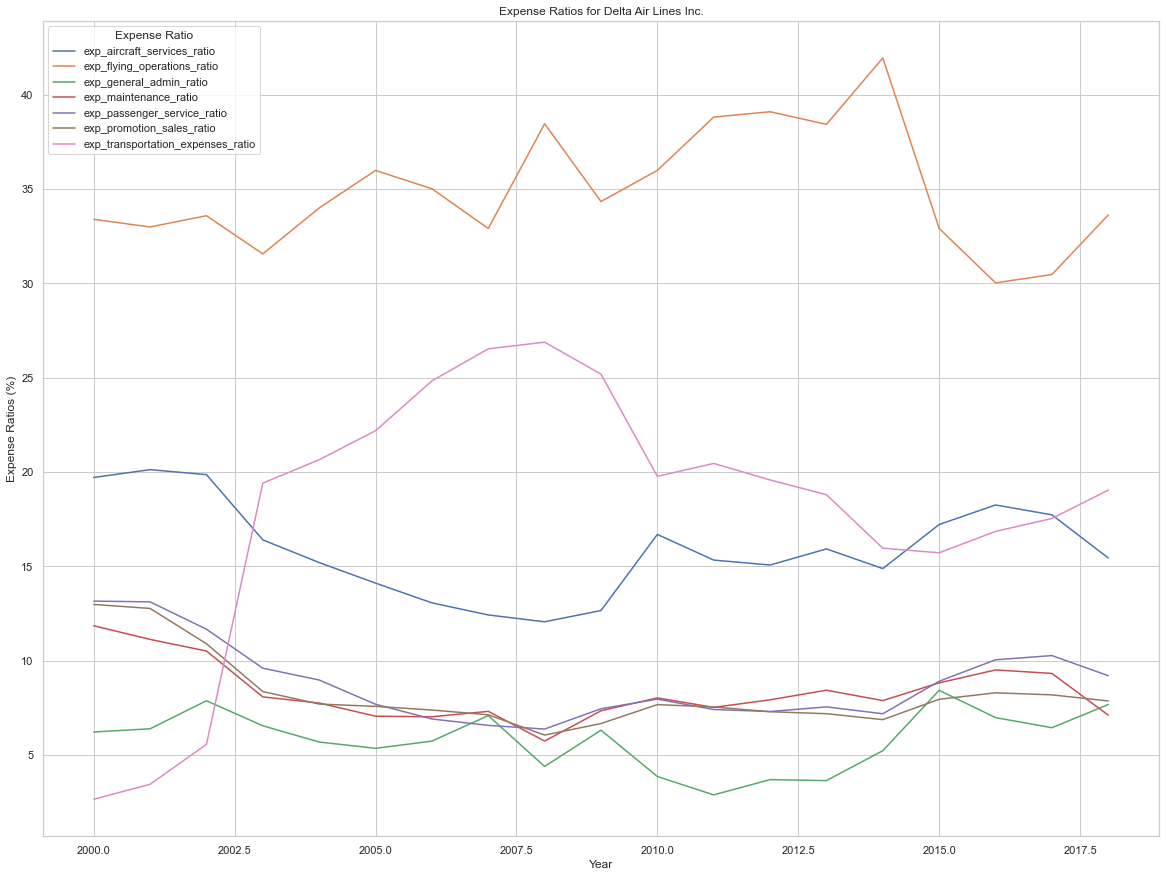

In [48]:
delta_exp_df = df_expenses_ratio[df_expenses_ratio['Airline'] == 'Delta Air Lines Inc.']

exp_columns = [col for col in delta_exp_df.columns if col.startswith('exp_')]
plot_exp_df = delta_exp_df[['Year'] + exp_columns].set_index('Year')

plot_exp_df = plot_exp_df.applymap(lambda x: float(x.strip('%')))

ax = plot_exp_df.plot(kind='line', figsize=(20, 15), title='Expense Ratios for Delta Air Lines Inc.')

plt.xlabel('Year')
plt.ylabel('Expense Ratios (%)')
plt.legend(title='Expense Ratio', loc='upper left')

plt.show()


In [49]:
df_expenses_ratio.to_csv('df_expenses_ratio.csv', index=False)

# Revenue growth rate

## General

In [50]:
df['previous_year_revenue'] = df.groupby(['Airline', 'Year'])['overall_revenues'].shift()
df['revenue_growth_rate'] = (df['overall_revenues'] - df['previous_year_revenue']) / df['previous_year_revenue'].where(df['Airline'] == df['Airline'].shift(), 1)

df.loc[df['Year'] == 2000, 'revenue_growth_rate'] = 0

df['revenue_growth_rate'].where(df.groupby('Airline')['revenue_growth_rate'].transform('idxmin') != df.index, np.nan, inplace=True)

revenue_growth_rate_df = df[['Airline', 'Year', 'revenue_growth_rate']].groupby(['Airline', 'Year']).sum()

df = df.drop(columns=['previous_year_revenue'])

revenue_growth_rate_df

revenue_growth_rate
Airline               Year                     
Alaska Airlines Inc.  2000                 0.00
                      2001                -0.06
                      2002                 0.07
                      2003                 0.20
                      2004                 0.11
...                                         ...
United Air Lines Inc. 2014                 0.08
                      2015                 0.10
                      2016                 0.11
                      2017                 0.10
                      2018                 0.16

[152 rows x 1 columns]

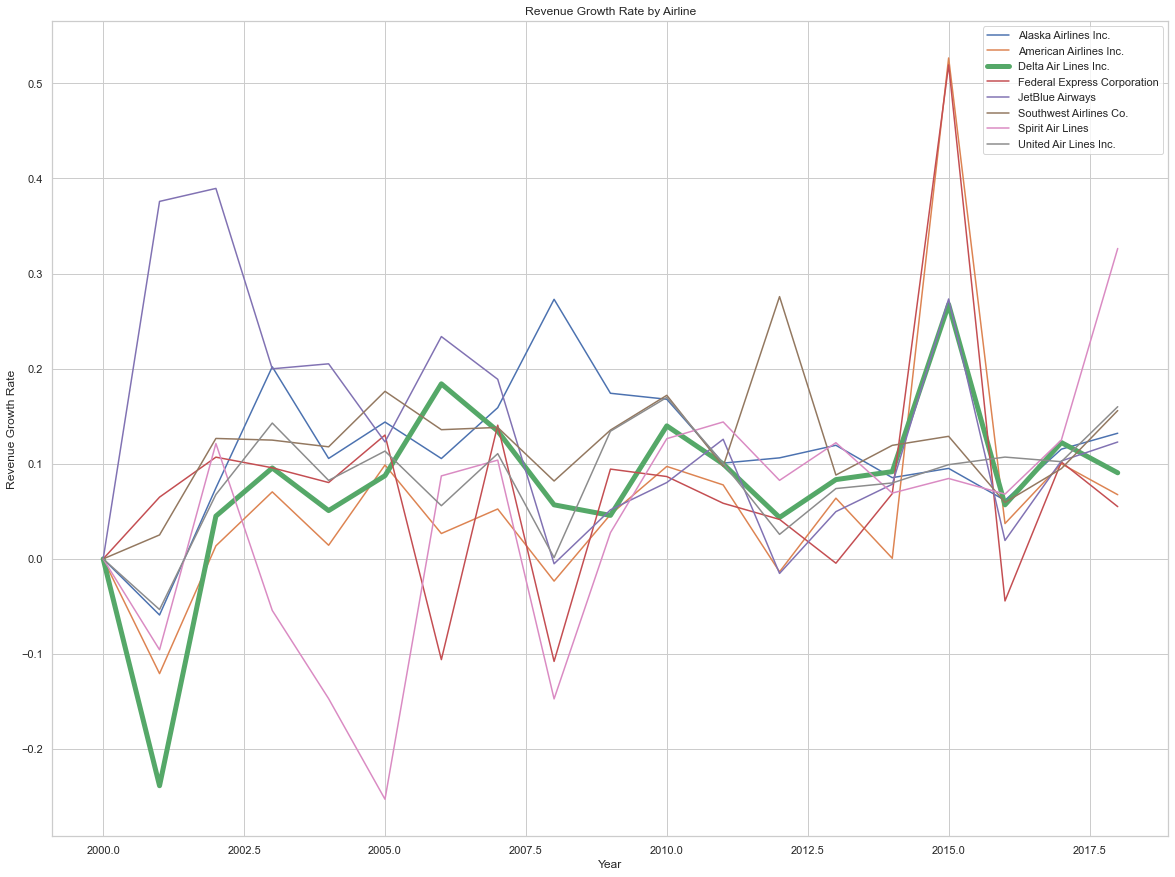

In [51]:
grouped_df = revenue_growth_rate_df.reset_index().groupby('Airline')

plt.figure(figsize=(20, 15))

for airline, data in grouped_df:
    if airline == 'Delta Air Lines Inc.':
        plt.plot(data['Year'], data['revenue_growth_rate'], label=airline, linewidth=5)
    else:
        plt.plot(data['Year'], data['revenue_growth_rate'], label=airline)

plt.xlabel('Year')
plt.ylabel('Revenue Growth Rate')
plt.title('Revenue Growth Rate by Airline')

plt.legend()

plt.show()




## Delta 

In [52]:
delta_revenue_growth_rate_df = revenue_growth_rate_df.reset_index()
delta_revenue_growth_rate_df = delta_revenue_growth_rate_df[delta_revenue_growth_rate_df['Airline'] == 'Delta Air Lines Inc.']
delta_revenue_growth_rate_df

Airline  Year  revenue_growth_rate
38  Delta Air Lines Inc.  2000                 0.00
39  Delta Air Lines Inc.  2001                -0.24
40  Delta Air Lines Inc.  2002                 0.05
41  Delta Air Lines Inc.  2003                 0.10
42  Delta Air Lines Inc.  2004                 0.05
43  Delta Air Lines Inc.  2005                 0.09
44  Delta Air Lines Inc.  2006                 0.18
45  Delta Air Lines Inc.  2007                 0.13
46  Delta Air Lines Inc.  2008                 0.06
47  Delta Air Lines Inc.  2009                 0.05
48  Delta Air Lines Inc.  2010                 0.14
49  Delta Air Lines Inc.  2011                 0.10
50  Delta Air Lines Inc.  2012                 0.04
51  Delta Air Lines Inc.  2013                 0.08
52  Delta Air Lines Inc.  2014                 0.09
53  Delta Air Lines Inc.  2015                 0.27
54  Delta Air Lines Inc.  2016                 0.06
55  Delta Air Lines Inc.  2017                 0.12
56  Delta Air Lines Inc.  2018                 0.09

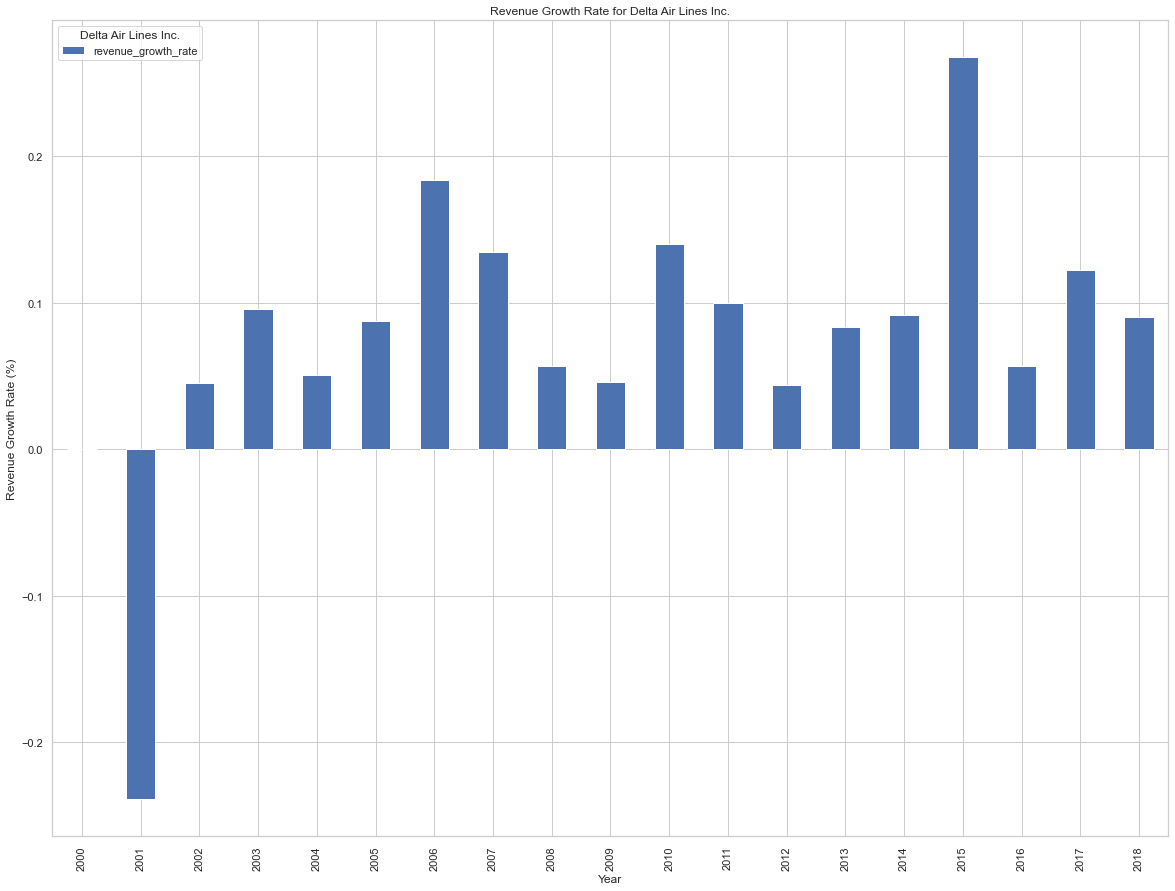

In [53]:
ax = delta_revenue_growth_rate_df.plot.bar(x='Year', y='revenue_growth_rate', figsize=(20, 15), title='Revenue Growth Rate for Delta Air Lines Inc.')

plt.xlabel('Year')
plt.ylabel('Revenue Growth Rate (%)')
plt.legend(title='Delta Air Lines Inc.', loc='upper left')

plt.show()


# Expenses growth rate

## General

In [54]:
df['previous_year_expenses'] = df.groupby(['Airline', 'Year'])['overall_expenses'].shift()
df['expenses_growth_rate'] = (df['overall_expenses'] - df['previous_year_expenses']) / df['previous_year_expenses'].where(df['Airline'] == df['Airline'].shift(), 1)

df.loc[df['Year'] == 2000, 'expenses_growth_rate'] = 0

df['expenses_growth_rate'].where(df.groupby('Airline')['expenses_growth_rate'].transform('idxmin') != df.index, np.nan, inplace=True)

expenses_growth_rate = df[['Airline', 'Year', 'expenses_growth_rate']].groupby(['Airline', 'Year']).sum()

df = df.drop(columns=['previous_year_expenses'])

expenses_growth_rate

expenses_growth_rate
Airline               Year                      
Alaska Airlines Inc.  2000                  0.00
                      2001                 -0.03
                      2002                  0.07
                      2003                  0.07
                      2004                  0.09
...                                          ...
United Air Lines Inc. 2014                 -0.04
                      2015                  0.03
                      2016                  0.07
                      2017                  0.07
                      2018                  0.12

[152 rows x 1 columns]

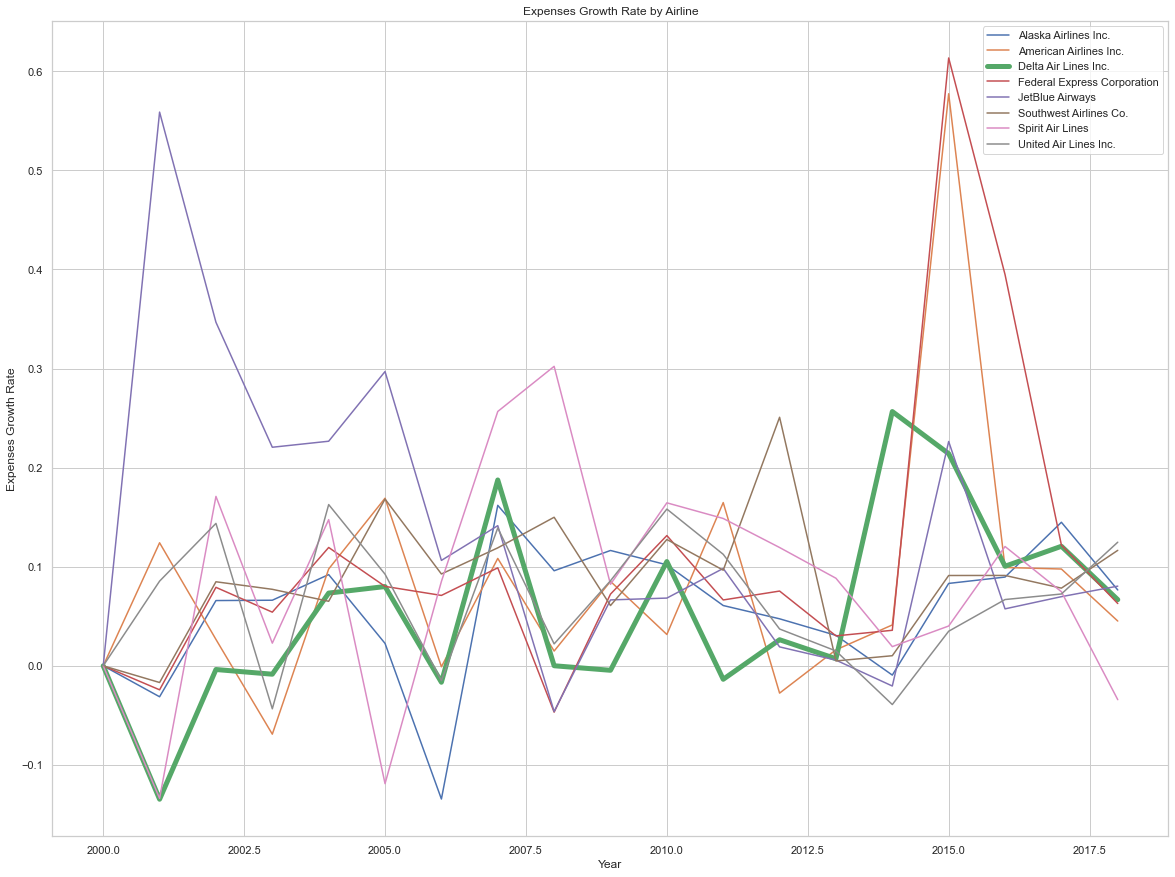

In [55]:
grouped_df = expenses_growth_rate.reset_index().groupby('Airline')

plt.figure(figsize=(20, 15))

for airline, data in grouped_df:
    if airline == 'Delta Air Lines Inc.':
        plt.plot(data['Year'], data['expenses_growth_rate'], label=airline, linewidth=5)
    else:
        plt.plot(data['Year'], data['expenses_growth_rate'], label=airline)

plt.xlabel('Year')
plt.ylabel('Expenses Growth Rate')
plt.title('Expenses Growth Rate by Airline')

plt.legend()

plt.show()


## Delta

In [56]:
delta_expenses_growth_rate_df = expenses_growth_rate.reset_index()
delta_expenses_growth_rate_df = delta_expenses_growth_rate_df[delta_expenses_growth_rate_df['Airline'] == 'Delta Air Lines Inc.']
delta_expenses_growth_rate_df



Airline  Year  expenses_growth_rate
38  Delta Air Lines Inc.  2000                  0.00
39  Delta Air Lines Inc.  2001                 -0.13
40  Delta Air Lines Inc.  2002                 -0.00
41  Delta Air Lines Inc.  2003                 -0.01
42  Delta Air Lines Inc.  2004                  0.07
43  Delta Air Lines Inc.  2005                  0.08
44  Delta Air Lines Inc.  2006                 -0.02
45  Delta Air Lines Inc.  2007                  0.19
46  Delta Air Lines Inc.  2008                  0.00
47  Delta Air Lines Inc.  2009                 -0.00
48  Delta Air Lines Inc.  2010                  0.11
49  Delta Air Lines Inc.  2011                 -0.01
50  Delta Air Lines Inc.  2012                  0.03
51  Delta Air Lines Inc.  2013                  0.01
52  Delta Air Lines Inc.  2014                  0.26
53  Delta Air Lines Inc.  2015                  0.21
54  Delta Air Lines Inc.  2016                  0.10
55  Delta Air Lines Inc.  2017                  0.12
56  Delta Air Lines Inc.  2018                  0.07

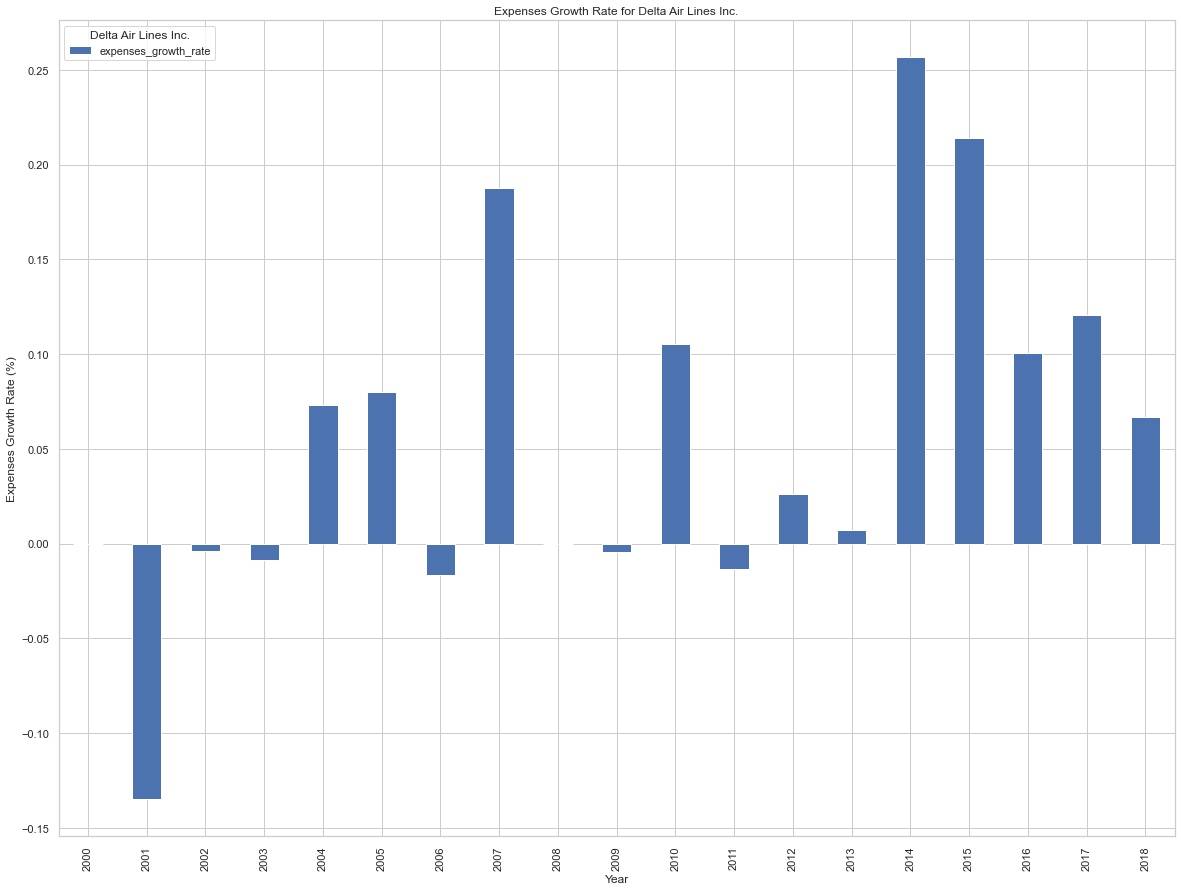

In [57]:
ax = delta_expenses_growth_rate_df.plot.bar(x='Year', y='expenses_growth_rate', figsize=(20, 15), title='Expenses Growth Rate for Delta Air Lines Inc.')

plt.xlabel('Year')
plt.ylabel('Expenses Growth Rate (%)')
plt.legend(title='Delta Air Lines Inc.', loc='upper left')

plt.show()

# Operating expenses as a percentage of revenue

## General

In [58]:
grouped_df = df.groupby(['Airline', 'Year'])

total_expenses = grouped_df['overall_expenses'].sum()
total_revenue = grouped_df['overall_revenues'].sum()

operating_expenses_percentage = (total_expenses / total_revenue) * 100

operating_expenses_percentage_of_revenue = operating_expenses_percentage.reset_index(name='operating_expenses_percentage_of_revenue')

operating_expenses_percentage_of_revenue

Airline  Year  operating_expenses_percentage_of_revenue
0     Alaska Airlines Inc.  2000                                     91.84
1     Alaska Airlines Inc.  2001                                     94.06
2     Alaska Airlines Inc.  2002                                     94.70
3     Alaska Airlines Inc.  2003                                     91.33
4     Alaska Airlines Inc.  2004                                     92.82
..                     ...   ...                                       ...
147  United Air Lines Inc.  2014                                     87.19
148  United Air Lines Inc.  2015                                     79.61
149  United Air Lines Inc.  2016                                     79.48
150  United Air Lines Inc.  2017                                     83.85
151  United Air Lines Inc.  2018                                     86.29

[152 rows x 3 columns]

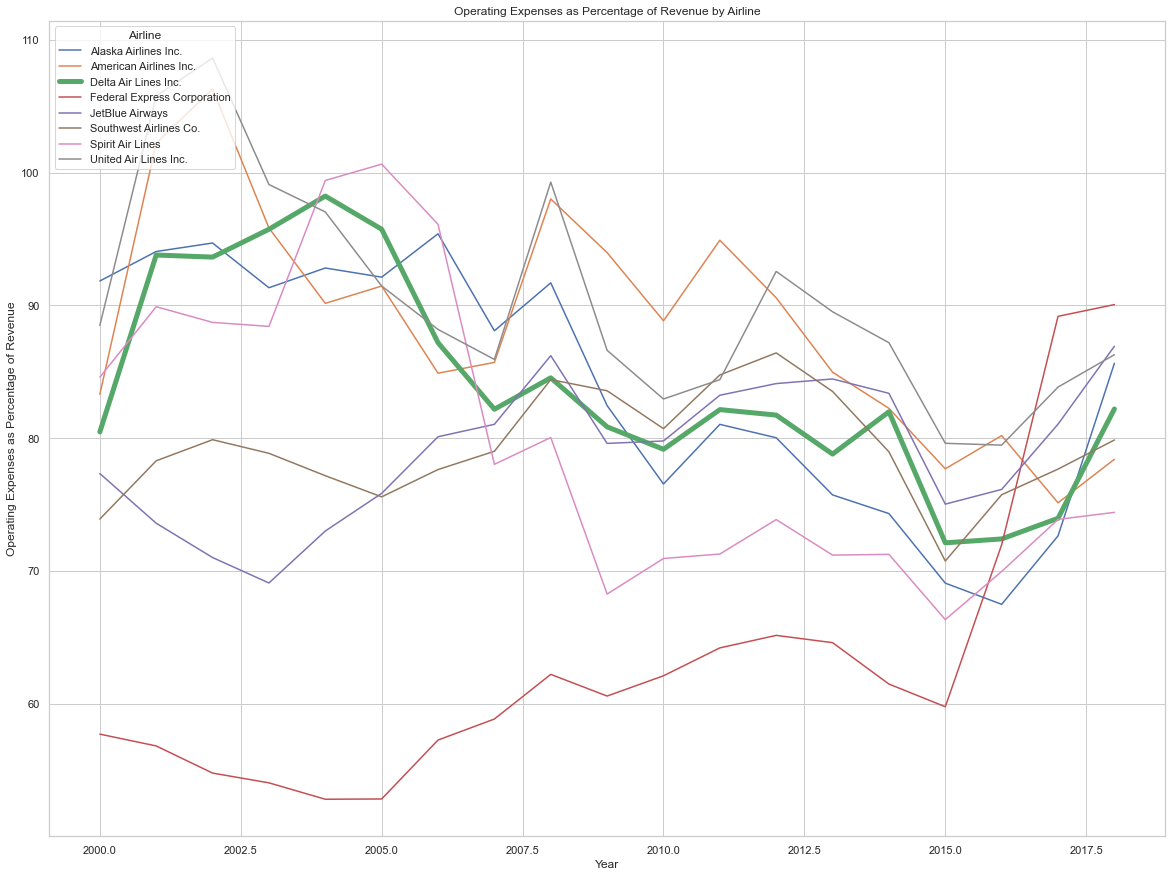

In [59]:
plt.figure(figsize=(20, 15))

for airline in operating_expenses_percentage_of_revenue['Airline'].unique():
    airline_df = operating_expenses_percentage_of_revenue[operating_expenses_percentage_of_revenue['Airline'] == airline]
    if airline == 'Delta Air Lines Inc.':
        plt.plot(airline_df['Year'], airline_df['operating_expenses_percentage_of_revenue'], label=airline, linewidth=5)
    else:
        plt.plot(airline_df['Year'], airline_df['operating_expenses_percentage_of_revenue'], label=airline)

plt.xlabel('Year')
plt.ylabel('Operating Expenses as Percentage of Revenue')
plt.title('Operating Expenses as Percentage of Revenue by Airline')

plt.legend(title='Airline', loc='upper left')

plt.show()


Here we can analyze the percentage of revenue that each airline spent on operating expenses for each year in the dataset. This metric provides insight into how effectively each airline is managing its expenses relative to its revenue. A lower percentage suggests that the airline is operating more efficiently, while a higher percentage indicates that the airline may be less efficient in managing its expenses. By comparing this metric across different airlines and over time, we can gain insights into the financial performance and cost management of each airline.

In Delta's case, we can analyze their trend over time and compare it to other airlines in the dataset. This analysis will help us to identify areas where Delta can improve its cost management practices and become more efficient in its operations.

In [60]:
df = df.merge(operating_expenses_percentage_of_revenue, on=['Airline', 'Year'], how='left')

## Delta

In [61]:
delta_operating_expenses_percentage_of_revenue = operating_expenses_percentage_of_revenue[operating_expenses_percentage_of_revenue['Airline'] == 'Delta Air Lines Inc.']
delta_operating_expenses_percentage_of_revenue



Airline  Year  operating_expenses_percentage_of_revenue
38  Delta Air Lines Inc.  2000                                     80.47
39  Delta Air Lines Inc.  2001                                     93.80
40  Delta Air Lines Inc.  2002                                     93.64
41  Delta Air Lines Inc.  2003                                     95.74
42  Delta Air Lines Inc.  2004                                     98.24
43  Delta Air Lines Inc.  2005                                     95.74
44  Delta Air Lines Inc.  2006                                     87.19
45  Delta Air Lines Inc.  2007                                     82.18
46  Delta Air Lines Inc.  2008                                     84.55
47  Delta Air Lines Inc.  2009                                     80.85
48  Delta Air Lines Inc.  2010                                     79.16
49  Delta Air Lines Inc.  2011                                     82.15
50  Delta Air Lines Inc.  2012                                     81.74
51  Delta Air Lines Inc.  2013                                     78.80
52  Delta Air Lines Inc.  2014                                     81.99
53  Delta Air Lines Inc.  2015                                     72.12
54  Delta Air Lines Inc.  2016                                     72.41
55  Delta Air Lines Inc.  2017                                     73.97
56  Delta Air Lines Inc.  2018                                     82.20

# Net income margin per quarter

## General

In [62]:
grouped_df = df.groupby(['Airline', 'Year']).agg({'profit_loss': 'sum', 'overall_revenues': 'sum'})

df['net_income_margin_per_quarter'] = (df['profit_loss'] / df['overall_revenues']) * 100

grouped_quarter_df = df.groupby(['Airline', 'Year', 'Quarter']).agg({'net_income_margin_per_quarter': 'mean'})

grouped_quarter_df = grouped_quarter_df.reset_index()

grouped_quarter_df = grouped_quarter_df.rename(columns={'net_income_margin_per_quarter': 'net_income_margin'})

grouped_quarter_df.head()



Airline  Year  Quarter  net_income_margin
0  Alaska Airlines Inc.  2000        1               5.25
1  Alaska Airlines Inc.  2000        2              10.41
2  Alaska Airlines Inc.  2000        3              15.28
3  Alaska Airlines Inc.  2000        4               0.42
4  Alaska Airlines Inc.  2001        1               1.77

## Delta

In [63]:
delta_df = df.loc[df['Airline'] == 'Delta Air Lines Inc.'].copy()
delta_df['net_income_margin_per_quarter'] = delta_df['profit_loss'] / delta_df['overall_revenues'] * 100
delta_grouped = delta_df.groupby(['Year', 'Quarter'])['net_income_margin_per_quarter'].sum().reset_index()
delta_grouped.rename(columns={'net_income_margin_per_quarter': 'delta_net_income_margin_per_quarter'}, inplace=True)
delta_net_income_margin_per_quarter = delta_grouped[['Year', 'Quarter', 'delta_net_income_margin_per_quarter']]
delta_net_income_margin_per_quarter.head(10)


Year  Quarter  delta_net_income_margin_per_quarter
0  2000        1                                18.33
1  2000        2                                24.22
2  2000        3                                20.81
3  2000        4                                14.29
4  2001        1                                 8.54
5  2001        2                                12.53
6  2001        3                                 4.43
7  2001        4                                -3.27
8  2002        1                                 2.17
9  2002        2                                10.04

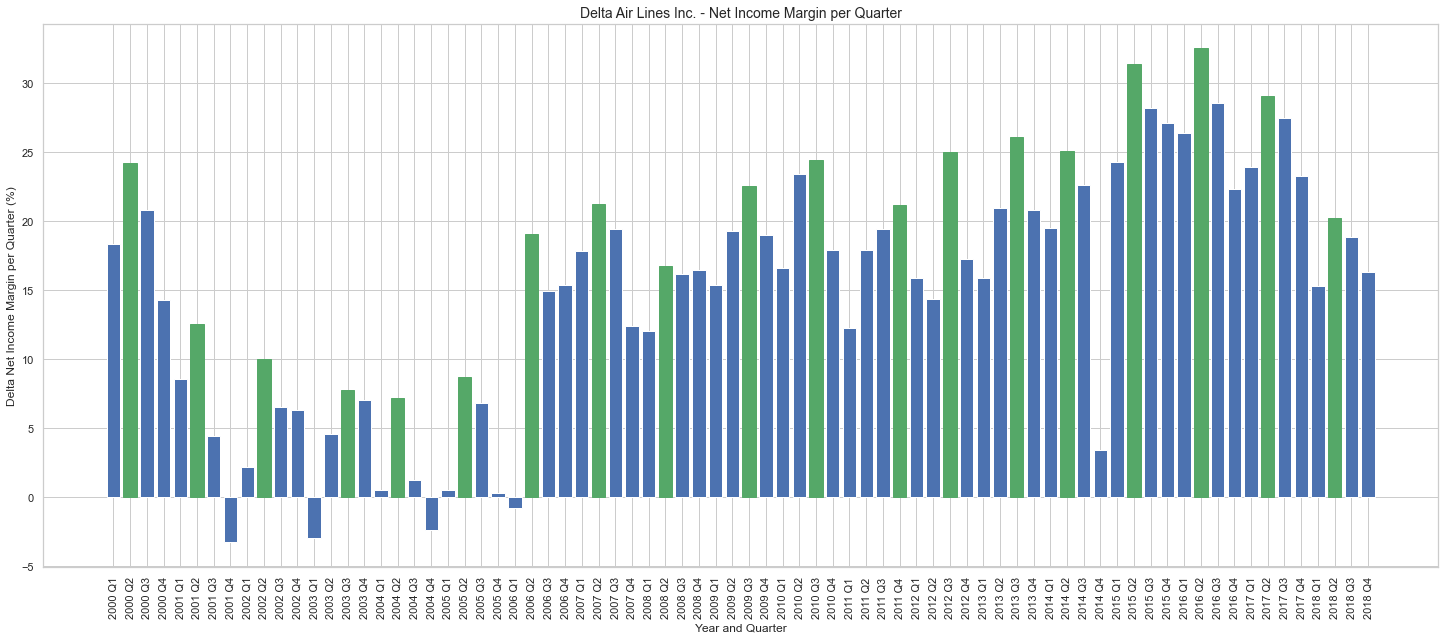

In [64]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

bars = ax.bar(delta_net_income_margin_per_quarter['Year'].astype(str) + ' Q' + delta_net_income_margin_per_quarter['Quarter'].astype(str), delta_net_income_margin_per_quarter['delta_net_income_margin_per_quarter'], color='b')

for year in delta_net_income_margin_per_quarter['Year'].unique():
    year_data = delta_net_income_margin_per_quarter[delta_net_income_margin_per_quarter['Year'] == year]
    max_value = year_data['delta_net_income_margin_per_quarter'].max()
    for index, row in year_data.iterrows():
        if row['delta_net_income_margin_per_quarter'] == max_value:
            bars[index].set_color('g')

ax.set_title('Delta Air Lines Inc. - Net Income Margin per Quarter', fontsize=14)
ax.set_xlabel('Year and Quarter', fontsize=12)
ax.set_ylabel('Delta Net Income Margin per Quarter (%)', fontsize=12)

plt.xticks(rotation=90)

plt.show()



In [65]:
highest_quarter_counts = {'1': 0, '2': 0, '3': 0, '4': 0}

for year in delta_net_income_margin_per_quarter['Year'].unique():
    year_data = delta_net_income_margin_per_quarter[delta_net_income_margin_per_quarter['Year'] == year]
    highest_index = year_data['delta_net_income_margin_per_quarter'].idxmax()
    highest_quarter = year_data.loc[highest_index, 'Quarter']
    highest_quarter_counts[str(highest_quarter)] += 1

for quarter, count in highest_quarter_counts.items():
    print(f"Q{quarter} was the highest quarter {count} times")


Q1 was the highest quarter 0 times
Q2 was the highest quarter 13 times
Q3 was the highest quarter 5 times
Q4 was the highest quarter 1 times


# KPI presentation

* Revenue
* Expenses
* Operating profit/loss
* Operating expenses
* Operating margin
* Revenue growth rate
* Expenses growth rate
* Operating expenses as a percentage of revenue
* Revenue per category
* Expense by category
* Net income margin per quarter


This order starts with an overview of the airline's revenue and expenses, followed by profitability measures such as operating profit/loss and operating margin. Then, it includes growth rates to provide insight into the trend of the airline's financial performance over time. Gross profit margin and operating expenses as a percentage of revenue are then included to provide further detail into the airline's profitability and efficiency. Finally, revenue and expenses are broken down by category to provide a more detailed view of the airline's financial performance, and the presentation ends with net income margin per quarter to summarize the overall profitability of the airline.

# Conclusion

To improve the Profit/Loss ratio, cost reduction techniques should be applied to specific expense categories such as **aircraft service**, **promotion sales**, and **passenger service**. 

It's crucial to focus on reducing costs in Q3 since expenses are higher during this period 73.68% of the time, compared to other quarters.  


## Other conclusions

From a business perspective, it would be recommended for the company to explore potential business opportunities leveraging their existing infrastructure, such as offering **mailing** or **pet** transportation services. This would enable the company to diversify their revenue streams and potentially increase their overall profitability.



In [66]:
df.to_csv('df_tableau.csv', index=False)

# Future without changes

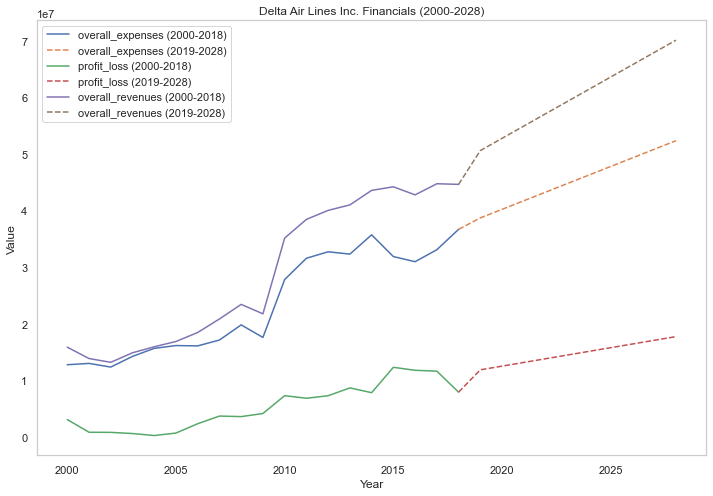

In [67]:
df_filtered = df[df['Airline'] == 'Delta Air Lines Inc.']

df_grouped = df_filtered.groupby('Year').sum().reset_index()

columns_to_predict = ['overall_expenses', 'profit_loss', 'overall_revenues']
models = {}

for col in columns_to_predict:
    X = df_grouped['Year'].values.reshape(-1, 1)
    y = df_grouped[col].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    models[col] = model

years_to_predict = np.arange(2019, 2029).reshape(-1, 1)
predicted_data = {}

for col, model in models.items():
    predictions = model.predict(years_to_predict)
    predicted_data[col] = predictions.flatten()

df_predicted = pd.DataFrame(predicted_data)
df_predicted['Year'] = years_to_predict
df_combined = pd.concat([df_grouped, df_predicted], ignore_index=True)

plt.figure(figsize=(12, 8))

for col in columns_to_predict:
    plt.plot(df_combined['Year'][:19], df_combined[col][:19], label=col + ' (2000-2018)')
    plt.plot(df_combined['Year'][18:], df_combined[col][18:], linestyle='--', label=col + ' (2019-2028)')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Delta Air Lines Inc. Financials (2000-2028)')
plt.legend()
plt.grid()
plt.show()


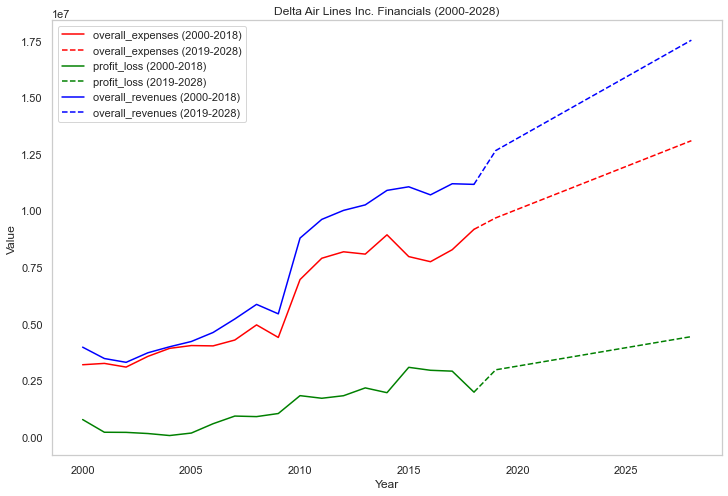

In [68]:
# Filter the dataframe
df_filtered = df[df['Airline'] == 'Delta Air Lines Inc.']

# Group by Year
df_grouped = df_filtered.groupby('Year').mean().reset_index()

# Linear regression for each column
columns_to_predict = ['overall_expenses', 'profit_loss', 'overall_revenues']
models = {}

for col in columns_to_predict:
    X = df_grouped['Year'].values.reshape(-1, 1)
    y = df_grouped[col].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    models[col] = model

# Predict the next 10 years
years_to_predict = np.arange(2019, 2029).reshape(-1, 1)
predicted_data = {}

for col, model in models.items():
    predictions = model.predict(years_to_predict)
    predicted_data[col] = predictions.flatten()

# Combine actual and predicted data
df_predicted = pd.DataFrame(predicted_data)
df_predicted['Year'] = years_to_predict
df_combined = pd.concat([df_grouped, df_predicted], ignore_index=True)

# Define colors and figsize
colors = {'overall_expenses': 'red', 'profit_loss': 'green', 'overall_revenues': 'blue'}
figsize = (12, 8)

# Plot the graph
plt.figure(figsize=figsize)

for col in columns_to_predict:
    plt.plot(df_combined['Year'][:19], df_combined[col][:19], color=colors[col], label=col + ' (2000-2018)')
    plt.plot(df_combined['Year'][18:], df_combined[col][18:], linestyle='--', color=colors[col], label=col + ' (2019-2028)')
    
   
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Delta Air Lines Inc. Financials (2000-2028)')
plt.legend()
plt.grid()
plt.show()